In [1]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
from selenium import webdriver
from bs4 import BeautifulSoup
import edgar
import time
from pathlib import Path
import pandas as pd
import os
import re
from datetime import datetime
from datetime import date
import json
import requests
import sys

In [2]:
key='8NBLCOTKI465W93V'
secKey = "d76154d8c11c709dbdaaa8cdf25c2b69424847ba85f2a569742d588d0d53c8b0"

In [3]:
ts = TimeSeries(key=key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
pprint(data.head(2))

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2022-01-18 20:00:00   302.07   302.09  301.85    301.85     1538.0
2022-01-18 19:59:00   302.20   302.20  302.01    302.01      290.0


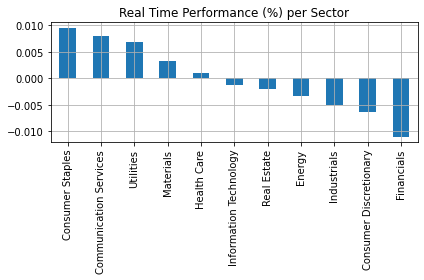

In [4]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key=key, output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

In [5]:
import requests
url = 'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol=IBM&apikey=demo'
print(url)

https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol=IBM&apikey=demo


In [6]:
r = requests.get(url)
output = r.json()

In [7]:
print(output["Global Quote"]["05. price"])

132.9400


In [8]:
import pandas as pd
from io import StringIO
url = 'https://www.alphavantage.co/query?function=EARNINGS_CALENDAR&symbol=MSFT&horizon=3month&apikey=8NBLCOTKI465W93V'
r = requests.get(url)
content = r.text
print(str(content))

symbol,name,reportDate,fiscalDateEnding,estimate,currency
MSFT,Microsoft Corporation,2022-01-25,2021-12-31,2.31,USD



In [9]:
content = str(content)
f = StringIO(content)
#col_list = ["symbol"]
tbl = pd.read_csv(f, nrows=1)
#print(tbl)
#print(tbl["reportDate"][0])
print (len(tbl["reportDate"]))
if len(tbl["reportDate"]) > 0:
    dateStr = tbl["reportDate"][0]
    print(dateStr)

1
2022-01-25


In [10]:
import datetime
date = datetime.datetime.strptime(dateStr, "%Y-%m-%d").date()
d = date.strftime("%b %d")
print("Output 3:", d)

Output 3: Jan 25


In [11]:
#qtrs = [[1,3],[4,6],[7,9],[10,12]]
months = 12
qtr_len = 3
qtr_no = int(months/qtr_len)
qtrs = list()
start = 0
for i in range(qtr_no):
    qtr = list()
    start = 1 + start
    end = start + 2
    qtr.append(start)
    qtr.append(end)
    qtrs.append(qtr)
    start = end

print(qtrs)
month = 10
for o in qtrs:
    #print (o)
    if month >= o[0] and month <= o[1]:
        print(o)
        break

[[1, 3], [4, 6], [7, 9], [10, 12]]
[10, 12]


In [12]:
def get_qtrs():
    months = 12
    qtr_len = 3
    qtr_no = int(months/qtr_len)
    qtrs = list()
    start = 0
    for i in range(qtr_no):
        qtr = list()
        start = 1 + start
        end = start + 2
        qtr.append(start)
        qtr.append(end)
        qtrs.append(qtr)
        start = end
    return qtrs

In [13]:
def get_qtr_range(month, qtrs):
    #print(month)
    for o in qtrs:
        if month >= o[0] and month <= o[1]:
            return o

In [14]:
def get_stock_earningDate_detail(stock):
    url = 'https://www.alphavantage.co/query?function=EARNINGS_CALENDAR&symbol=' + stock + '&horizon=3month&apikey=8NBLCOTKI465W93V'
    try:
        r = requests.get(url)
        content = r.text
        return content
    except e:
        print(e)
        return None
    return None

In [15]:
import sys
from colorama import Fore, init, Back, Style
import openpyxl
import re

path = "../../Summary/stocks.xlsx"
wb_obj = openpyxl.load_workbook(path.strip())
# from the active attribute 
sheet_obj = wb_obj.active
sheet_obj

<Worksheet "12-Sep-2020">

In [16]:
max_column=sheet_obj.max_column
max_row=sheet_obj.max_row
max_column, max_row

(12, 58)

In [17]:
data = sheet_obj.cell(1,2)
print(data.value)

Quantity


In [18]:
path = "../../Summary/stocks_csv.csv"
d = pd.read_csv(path)
d["Ticker"]

0        NIO
1        BTI
2       ABBV
3        EPD
4        ENB
       ...  
132     DGRO
133     TD6C
134     TDG0
135    PTTRX
136      NaN
Name: Ticker, Length: 137, dtype: object

In [19]:
from datetime import datetime
qtrs = get_qtrs()
print(qtrs)
month = datetime.now().month
year = datetime.now().year
print(month, year)
qtr = get_qtr_range(month, qtrs)
qtr

[[1, 3], [4, 6], [7, 9], [10, 12]]
1 2022


[1, 3]

In [20]:
import math
months = ["0", "JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
print(months[qtr[0]], months[qtr[1]])
cell = months[qtr[0]]+"-"+months[qtr[1]]+" "+ str(year)
#cell = months[7]+"-"+months[9]+" "+ str(year)
print(cell)
if cell not in d:
    d[cell] = None
    d.to_csv(path, index=False)
print(d[cell][3])
#if math.isnan(d[cell][3]):
#    print("Hello")

for index, value in enumerate(d[cell]):
    #print(index, value)
    #print(type(value))
    if type(value) is str:
        print(value)

JAN MAR
JAN-MAR 2022
01-Feb
28-Feb
02-Feb
01-Feb
11-Feb
27-Jan
25-Jan
16-Feb
16-Mar
04-Feb
16-Feb
27-Jan
09-Feb
14-Mar
09-Mar
16-Feb
02-Mar
23-Feb
01-Feb
02-Feb
14-Feb
07-Mar
09-Mar
26-Jan
16-Feb
22-Feb
15-Feb
09-Feb
28-Feb
23-Feb
15-Feb
15-Feb
31-Jan
15-Feb
21-Feb
28-Feb
03-Feb
07-Feb
22-Feb
14-Feb
08-Feb
28-Feb
08-Feb
02-Feb
02-Feb
08-Feb
08-Mar
28-Mar
07-Mar
09-Mar
23-Feb
21-Mar
08-Mar
02-Mar
22-Feb
09-Feb
22-Feb
01-Feb
26-Jan
01-Feb
23-Feb
14-Feb
22-Feb
15-Mar
23-Feb
17-Feb
01-Mar
28-Feb
23-Feb
16-Feb
09-Feb
21-Feb
31-Jan
24-Feb
23-Feb
02-Feb
21-Feb
01-Mar
22-Mar
14-Feb
22-Feb
23-Feb
23-Feb
08-Feb
09-Feb
22-Feb
23-Feb
02-Feb
09-Feb
16-Feb
27-Jan
26-Jan
21-Mar
17-Mar
23-Feb
31-Jan
27-Jan
31-Jan
10-Feb
23-Feb
08-Feb
28-Mar
10-Feb
22-Feb
02-Feb
14-Jan - DN (157.8900)
10-Feb
25-Jan
28-Feb
21-Feb
16-Feb
20-Jan
18-Jan - DN (103.3400)


In [21]:
def get_dateStr(dateStr):
    date = datetime.strptime(dateStr, "%Y-%m-%d").date()
    month = date.month
    dStr = date.strftime("%d-%b")
    return month, dStr

In [22]:
def get_month(dateStr):
    date = datetime.strptime(dateStr, "%Y-%m-%d").date()
    month = date.month
    #print(month)
    return month

In [23]:
def is_currentQtr(month):
    qtrs = get_qtrs()
    currMonth = datetime.now().month
    qtr = get_qtr_range(currMonth, qtrs)
    earningQtr = get_qtr_range(month, qtrs)
    if qtr == earningQtr:
        return True
    return False

In [24]:
status = is_currentQtr(7)
print(status)

False


In [25]:
from datetime import timedelta
print(d[cell][0])
content = d[cell][0]
if "(" not in content:
    print(True)
    #data = content.split(" ")
    #dateStr = (data[0].strip() + "-" + str(year))
    dateStr = (content.strip() + "-" + str(year))
    print(dateStr)
    date = datetime.strptime(dateStr, "%d-%b-%Y").date()
    nextDate = date + timedelta(days=1)
    print(str(date), str(nextDate))
    date = str(date)
    nextDate = str(nextDate)
    #month = date.month
    #dStr = date.strftime("%Y-%m-%d")
    #nStr = nextDate.strftime("%Y-%m-%d")
    #print(dStr)
    #return month, dStr



28-Feb
True
28-Feb-2022
2022-02-28 2022-03-01


In [26]:
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=NIO&apikey=8NBLCOTKI465W93V"
r = requests.get(url)
output = r.json()

#curr = output.get("Time Series (Daily)").get('2021-04-30').get("5. adjusted close")
#prev = output.get("Time Series (Daily)").get('2021-04-29').get("5. adjusted close")
if(output):
    curr = output.get("Time Series (Daily)").get(nextDate).get("5. adjusted close")
    prev = output.get("Time Series (Daily)").get(date).get("5. adjusted close")
    print(curr, prev)
    diff = float(curr) - float(prev)
    print(diff)
    if (diff > 0):
        print("UP")
    elif (diff < 0):
        print(" - DN" + " (" + curr + ")")
    else:
        print("NC")

AttributeError: 'NoneType' object has no attribute 'get'

In [27]:
from datetime import datetime
from datetime import timedelta
import dateutil

def is_earningReport(title, earningDate, newsDate):
    #print(earningDate, newsDate)
    temp = earningDate
    if newsDate != temp:
        temp = temp + timedelta(days=1)
        if newsDate != temp:
            temp = earningDate
            temp = temp + timedelta(days=-1)
            if newsDate != temp:
                return False
    
    words1 = ["Announces", "Reports", "Releases", "Increase", "Raises"]
    words2 = ["Earnings", "Results", "Billable", "Revenue", "Revenues", "Income", "Letter"]
    if any(word in title for word in words1) and any(word in title for word in words2):
        #print(True)
        return True
    return False

In [28]:
def get_newsMarketTime(hour):
    if (hour > 12):
        return "AH"
    else:
        return "PM"

In [29]:
def get_newsDate(l):
    #print(l)
    interval = l.split(" ")
    num = interval[0]
    date = datetime.now()
    newsDate = None
    #print(date)
    if num == "yesterday":
        newsDate = date + timedelta(days=-1)
        newsDate = newsDate + timedelta(hours=-12.30) #For US time
    elif interval[1] == "days":
        newsDate = date + timedelta(days=-int(interval[0]))
        newsDate = newsDate + timedelta(hours=-12.30) #For US time
        #print(newsDate)
    elif interval[1] == "hours":
        newsDate = date + timedelta(hours=-int(interval[0]))
        newsDate = newsDate + timedelta(hours=-12.30) #For US time
        #print(newsDate)
    elif interval[1] == "months":
        a_month = dateutil.relativedelta.relativedelta(months=int(interval[0]))
        newsDate = date - a_month
    else:
        newsDate = date
        newsDate = newsDate + timedelta(hours=-9.30) #For US Eastern time
        #print(newsDate)
    return newsDate

In [30]:
def get_cell(d):
    qtrs = get_qtrs()
    #print(qtrs)
    month = datetime.now().month
    year = datetime.now().year
    #print(month, year)
    qtr = get_qtr_range(month, qtrs)
    #print(qtr)

    months = ["0", "JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
    #print(months[qtr[0]], months[qtr[1]])
    cell = months[qtr[0]]+"-"+months[qtr[1]]+" "+ str(year)
    
    if cell not in d:
        d[cell] = None
        d.to_csv(path, index=False)
    return cell

In [31]:
import traceback
def getElement(element, source):
    try:
        elem = list()
        soup = BeautifulSoup(source, "html.parser")
        
        if(element == "PREVELEM"):
            cnt = -1
            for t in soup.find_all("div", class_="caas-table"):
                cnt = cnt + 1
                if t and t.previous_element:
                    #print("PREVIOUS ELEMENT "+str(cnt), t.previous_element)
                    #print("\n")
                    elem.append(str(t.previous_element).upper())
                else:
                    elem.append("NONE")
            return(elem)
    except Exception as e:
        print(e)
        print(traceback.format_exc())
        return None
    return None

In [32]:
import numpy as np
def findHeaders(table, match):
    hj = -1
    hstart = -1
    hend = -1
    #match = [str(cyr), str(pyr), str(nyr), nbr1, nbr2, nbr3]
    headers = list()
    
    for i in range(0,len(table)):
        for j in range(1,len(table.columns)):
            cell = table.iloc[i,j]
            #print(len(str(cell).split(" ")), cell)
            if(len(str(cell).split(" ")) < 10 and any(qtr in str(cell) for qtr in match)):
                #print("HEADER CELL CENTER", i, j)
                hj = i
                k = i
                hstart = -1
                hend = -1
                metric = table.iloc[k,0]
                # Multiple Headers may present inside single table
                if(len(headers) > 0):
                    #print(metric, k)
                    #hstart = i
                    while((str(metric) == "nan" or str(metric) == cell) and k>=0):
                        hstart = k 
                        k = k - 1
                        #print(metric, k)
                        if(k>=0):
                            metric = table.iloc[k,0]
                        else:
                            break
                # Header always start from 0 index
                else:
                    hstart = 0
                if(i+1 < len(table)):
                    k = i+1
                    hend = i
                    metric = table.iloc[k,0]
                    while(str(metric) == "nan" or "thousands" in str(metric) or "millions" in str(metric)):
                        hend = k 
                        #print("HEND", hend)
                        k = k + 1
                        if(k < len(table)):
                            metric = table.iloc[k,0]
                        else:
                            break
                else:
                    hend = i
                #print("HEADER BOUNDARY", hstart, hend)
                if(hstart > -1 and hend > -1):
                    hstr = str(hstart) + ":" + str(hend)
                    headers.append(hstr)
                    break
    
    for i in range(0,len(table)):
        for j in range(1,len(table.columns)):
            cell = table.iloc[i,j]
            if(table.iloc[i,0] == cell):
                #print(cell)
                table.iloc[i,j] = np.nan
                
    return headers,table

In [33]:
def dedupHeaderColumns(header, report):
    mstr = None
    mindex = -1
    lvalidx = -1
    lvalsum = -1
    mdict = dict()
    
    # Check for columns where special character like $ present, need to preserve these columns in header
    rd = report.where(report=="$")
    rd = rd.dropna(axis=1, how="all")
    #print("SPECIAL COLUMNS NEED TO BE PRESERVED")
    #print(rd.columns)
    
    for i,v in enumerate(header.columns):
        #print(i,v)
        #print(header[v].astype(str).values)
        l = " ".join((header[v].astype(str).values))
        #print(l)
        # Find out which consecutive duplicate columns need to be removed
        if not mstr:
            mstr = l
            mindex = i
        else:
            if(l == mstr):
                if(lvalsum == -1):
                    lvalsum = report[v].isna().sum()
                    lvalidx = v
                if mindex not in mdict:
                    mdict[mindex] = list()
                    if(header.columns[i-1] not in rd.columns and v not in rd.columns):
                        if(report[header.columns[i-1]].isna().sum() > lvalsum):
                            mdict[mindex].append(header.columns[i-1])
                        else:
                            mdict[mindex].append(v)
                            lvalsum = report[v].isna().sum()
                            lvalidx = v
                    elif v in rd.columns and header.columns[i-1] in rd.columns:
                        mdict[mindex].append(v)
                        lvalsum = -2
                        lvalidx = header.columns[i-1]
                    elif v in rd.columns and header.columns[i-1] not in rd.columns:
                        mdict[mindex].append(header.columns[i-1])
                        lvalsum = -2
                        lvalidx = v
                    else:
                        mdict[mindex].append(v)
                        lvalsum = -2
                        lvalidx = header.columns[i-1]
                else:
                    if(report[v].isna().sum() >= lvalsum):
                        mdict[mindex].append(v)
                    else:
                        mdict[mindex].append(lvalidx)
                        lvalsum = report[v].isna().sum()
                        lvalidx = v
            else:
                mstr = l
                mindex = i
                lvalsum = -1
                lvalidx = -1
    #print("DUPLICATE HEADER COLUMNS TO BE DELETED")
    print(mdict)
    for item in mdict:
        header = header.drop(mdict[item], axis=1)
    return header

In [34]:
tableRules = [
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["NON-GAAP FINANCIAL", "NON-GAAP OPERATING EXPENSES"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["KEY FINANCIAL RESULT"],
        "ACTIONS":["HIGHLIGHT"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["NON-GAAP NET INCOME"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["NON-GAAP GROSS PROFIT"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["STATEMENTS OF INCOME"],
        "ACTIONS":["STMTOP"] # Statement of Operation/Income
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"EXACT",
        "CONDITIONS":["ASSETS"],
        "ACTIONS":["BALANCESHEET"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["BALANCE SHEETS"],
        "ACTIONS":["BALANCESHEET"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["SEGMENTED ADJUSTED GROSS MARGIN"],
        "ACTIONS":["SEGNGGM"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["ADJUSTED GROSS MARGIN"],
        "ACTIONS":["NGGM"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["SEGMENTED GROSS MARGIN"],
        "ACTIONS":["SEGGM"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["ADJUSTED EBITDA"],
        "ACTIONS":["NGEBITDA"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["EARNINGS BEFORE INTEREST AND TAXES"],
        "ACTIONS":["NGEBIT"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["DIVISIONAL REVENUES"],
        "ACTIONS":["REVENUECHN"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["ADJUSTED EBITDA MARGIN"],
        "ACTIONS":["HIGHLIGHT"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["TOTAL CURRENT ASSETS"],
        "ACTIONS":["BALANCESHEET"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["FREE CASH FLOW"],
        "ACTIONS":["FCF"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["COST OF REVENUE"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["COST OF SALES"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"ANY",
        "CONDITIONS":["PER SHARE DATA"],
        "ACTIONS":["PERSHARE"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"ANY",
        "CONDITIONS":["NET INVESTMENT INCOME"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["COST OF GOODS SOLD"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["OPERATING ACTIVITIES"],
        "ACTIONS":["STMTCASHFLOW"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["CASH, ENDING"],
        "ACTIONS":["STMTCASHFLOW"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["CASH FLOWS FROM OPERATING ACTIVITIES"],
        "ACTIONS":["STMTCASHFLOW"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["CASH FLOWS FROM OPERATING ACTIVITIES:"],
        "ACTIONS":["STMTCASHFLOW"]
    },
    {
        "SOURCE":["COLUMN:METRIC"], # Search data only from "METRIC" column
        "MATCH":"ANY",
        "CONDITIONS":["ARPU", "DELIVERIES", "MAUS", "LOSS RATIO", "GROSS WRITTEN PREMIUMS", "ACTIVE BUYERS", "ACTIVE CLIENTS", "ASSETS AT FLOATING RATES", "NUMBER OF PORTFOLIO COMPANIES", "TOTAL ORIGINATIONS", "# OF INVESTMENTS"],
        "ACTIONS":["OPMETRIC"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["GAAP INCOME FROM OPERATIONS"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["COLUMN:ANY"], # No specific column name, search any column name
        "MATCH":"ANY", # Match any condition
        "CONDITIONS":["GUIDANCE"],
        "ACTIONS":["GUIDANCE"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["GUIDANCE", "OUTLOOK"],
        "ACTIONS":["GUIDANCE"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["ADJUSTED EBITDA"],
        "ACTIONS":["NGEBITDA"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["GAAP FINANCIAL METRICS", "EARNINGS PER SHARE RECONCILE"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"EXACT",
        "CONDITIONS":["NET REVENUE"],
        "ACTIONS":["REVENUE"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"EXACT",
        "CONDITIONS":["REVENUE BY CHANNEL"],
        "ACTIONS":["REVENUECHN"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"EXACT",
        "CONDITIONS":["REVENUE BY FORM"],
        "ACTIONS":["REVENUEFORM"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"],
        "MATCH":"EXACT",
        "CONDITIONS":["FINANCIAL RESULTS"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"EXACT",
        "CONDITIONS":["ADJUSTED GROSS MARGIN"],
        "ACTIONS":["NGGM"] # Non-GAAP Gross Margin
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["OPERATING METRIC"],
        "ACTIONS":["OPMETRIC"]
    }
]
print(tableRules)

[{'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['NON-GAAP FINANCIAL', 'NON-GAAP OPERATING EXPENSES'], 'ACTIONS': ['ACCOUNTING']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['KEY FINANCIAL RESULT'], 'ACTIONS': ['HIGHLIGHT']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['NON-GAAP NET INCOME'], 'ACTIONS': ['ACCOUNTING']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['NON-GAAP GROSS PROFIT'], 'ACTIONS': ['ACCOUNTING']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['STATEMENTS OF INCOME'], 'ACTIONS': ['STMTOP']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'EXACT', 'CONDITIONS': ['ASSETS'], 'ACTIONS': ['BALANCESHEET']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['BALANCE SHEETS'], 'ACTIONS': ['BALANCESHEET']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['SEGMENTED ADJUSTED GROSS MARGIN'], 'ACTIONS': ['SEGNGGM']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['ADJUSTED GROSS M

In [35]:
import traceback
def getOneTable(tables, tableNum, tblDesc):
    if not tables:
        print("TABLES CORRUPTED")
        return None
    if(tableNum >= len(tables)):
        print("INVALID TABLE INDEX")
        return None
    try:
        
        todays_date = date.today()
        cyr = todays_date.year
        pyr = cyr - 1
        ppyr = cyr - 2
        nyr = cyr + 1
        nbr = str(nyr)[2:4]
        nbr1 = "FY’"+nbr
        nbr2 = "FY"+nbr
        nbr3 = "’"+nbr
        
        hdmatch = [str(cyr), str(pyr), str(ppyr), str(nyr), nbr1, nbr2, nbr3, "2016", "2017", "2018", "FY16", "FY17", "FY18"]
        
        mn = ["MILLIONS", "MILLION", "millions", "million"]
        bn = ["BILLIONS", "BILLION", "billions", "billion"]
        t = ["THOUSANDS", "THOUSAND", "thousands", "thousand", "$000"]
        
        stmt = tables[tableNum]
        print("ORIGINAL TABLE ", tableNum)
        print(stmt)
    
        #stmt=stmt.T.drop_duplicates().T
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].astype(str)
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].str.encode("ascii", "ignore")
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].str.decode(encoding="utf8")
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].replace(r'^\s*$', np.nan, regex=True)
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].replace(r'nan', np.nan)
        stmt = stmt.dropna(axis=1, how="all")
        stmt = stmt.dropna(axis=0, how="all")
        columns = [i for i, x in enumerate(list(stmt.columns))]
        #print(columns)
        stmt.columns = columns
        #print("TABLE AFTER REMOVING DUPLICATE ROWS AND COLUMNS")
        #print(stmt)
    
        headers,stmt = findHeaders(stmt, hdmatch)
        #print(headers)
    
        if(len(headers) == 0):
            print("INVALID TABLE, HEADER NOT FOUND")
            return None
    
        #print("TABLE AFTER REMOVING DUPLICATES")
        #print(stmt)
    
        #Itereate through headers
        cnt = 0
        ft = dict()
        for i in list(headers):
            #print(i)
            tblName = None
            tblType = None
            cnt = cnt + 1
            hstart = int(i.split(":")[0])
            hend = int(i.split(":")[1])
            if(len(headers) > cnt):
                rend = int(headers[cnt].split(":")[0])
            else:
                rend = len(stmt)
            #print("\nHEADER START", hstart, "HEADER END", hend, "REPORT END", rend)
            header = stmt.iloc[hstart:hend+1,0:]
            #header = header.dropna(axis=1, how="all")
            report = stmt.iloc[hend+1:rend,0:]
            #report = report.dropna(axis=1, how="all")
            #print("\nHEADER "+str(cnt))
            #print(header)
            #print("\nREPORT "+str(cnt))
            #print(report)
            
            header = dedupHeaderColumns(header, report)
            
            #print("\nAFTER DELETING DUPLICATE COLUMN HEADER")
            #print("\nHEADER "+str(cnt))
            #print(header)
            
            if(len(header) == 0):
                print("NO HEADER FOUND")
                return None
            
            header1 = header[0]
            #print("HEADER BATCH 1")
            #print(header1)
            
            header2 = header[header.columns[1:]]
            header2 = header2.dropna(axis=1, how="all")
            
            hddrop = list()
            newmatch = hdmatch + ["CHANGE", "QOQ", "YOY"]
            for hd in list(header2.columns):
                header2[hd] = (header2[hd]).astype(str).str.upper()
                if(header2[hd].str.contains("|".join(list(map(str.upper,newmatch)))).sum() == 0):
                    hddrop.append(hd)
            
            #print("\nINVALID HEADER")
            #print(hddrop)
            header2 = header2.drop(hddrop, axis=1)
            #print("HEADER BATCH 2")
            #print(header2)
            
            header = pd.concat([header1, header2], axis=1, join='inner')
            header[header.columns[0:]] = header[header.columns[0:]].astype(str)
            #print(header)
            header[header.columns[0:]] = header[header.columns[0:]].applymap(lambda x: re.sub(r'\(\d+\)|\(\d+[a-zA-Z]\)*|\*', r'', x))
            #print("FINAL HEADER")
            #print(header)
            
            #report = report.T.drop_duplicates().T
            report = report.dropna(axis=1, how="all")
            
            #print("\nAFTER DELETING DUPLICATE ROWS")
            #print("\nREPORT "+str(cnt))
            #print(report)
            
            if(len(report) > 0):
            
                # Merge REPORT columns present with special characters - e.g. $/% etc...
                rd = report.where(report=="$")
                rd = rd.dropna(axis=1, how="all")
                #print("\nSPECIAL COLUMNS")
                #print(rd.columns)
                dropList = list()
                #print(rd.columns)
                for i in list(rd.columns):
                    #print(report[i])
                    report[i] = report[i].map(lambda x: "" if str(x) != "$" else x)
                    k = i + 1
                    while(k in list(rd.columns)):
                        dropList.append(k)
                        #rd.columns = list(rd.columns).remove(k)
                        k = k + 1
                    report[i] = report[i] + report[k]
                    dropList.append(k)
                report = report.drop(dropList, axis=1)
                report[report.columns[1:]] = report[report.columns[1:]].astype(str)
                report[report.columns[1:]] = report[report.columns[1:]].applymap(lambda x: x.replace('$(','-$'))
                report[report.columns[1:]] = report[report.columns[1:]].applymap(lambda x: x.replace('(','-'))
                report[report.columns[1:]] = report[report.columns[1:]].applymap(lambda x: x.replace(')',''))
                report[report.columns[1:]] = report[report.columns[1:]].applymap(lambda x: x.replace(',',''))
                report[0] = report[0].str.replace(":","")
                report[0] = report[0].str.replace(r'\d+|\(\d+\)|\(\d+[a-zA-Z]\)*|\*', r'')
                report[0] = report[0].str.upper()
                #report[report.columns[1:]] = report[report.columns[1:]].astype(float)
            
                rd = report.where(report=="%")
                rd = rd.dropna(axis=1, how="all")
                #print(rd)
                dropList = list()
                mgclmn = -1
                #print(rd.columns)
                for i in list(rd.columns):
                    #print(report[i])
                    report[i] = report[i].map(lambda x: "" if str(x) != "%" else x)
                    mgclmn = i - 1
                    while(mgclmn>=0):
                        if mgclmn not in header.columns:
                            mgclmn = mgclmn - 1
                        else:
                            #print(mgclmn,i)              
                            report[mgclmn] = report[mgclmn] + report[i]
                            dropList.append(i)
                            break
                report = report.drop(dropList, axis=1)
                #print("\nREPORT AFTER MERGING SPECIAL COLUMNS")
                #print(report)
            
                hdclmn = header.columns
                rclmn = report.columns
                #print("\nHEADER COLUMNS", hdclmn)
                #print("REPORT COLUMNS", rclmn)
            
                if(len(hdclmn) == 1 and len(header) == 1):
                    #print("SINGLE COLUMN")
                    if(str(header.iloc[0,0]) == "nan"):
                        #print("INVALID HEADER CONTENT FOR SINGLE COLUMN, BAILING OUT")
                        return None
                    s = header.iloc[0,0]
                    #Remove special characters
                    s = re.sub('[^a-zA-Z0-9 \n\.]', '', s)
                    #print(s)
                    data = list()
                    data = [str(s)+"***"+str(item) for item in list(rclmn)]
                    header = pd.DataFrame(np.array([data]),columns=rclmn)
                    hdclmn = header.columns
                    #print("NEW HEADER COLUMNS", hdclmn)
            
            
                finalClmns = hdclmn.intersection(rclmn)
                #print("INTERSECTION COLUMNS",finalClmns)
                header = header[finalClmns]
                #print("FINAL HEADER")
                #print(header)
            
                hstr = list()
            
                count = -1
                for i in list(header.columns):
                    count = count + 1
                    l = header[i].astype(str).values
                    l = ' '.join(dict.fromkeys(l))
                    l = l.replace("-nan","-")
                    l = l.replace("nan-","")
                    l = l.replace("nan ","")
                    l = l.replace(" nan","")
                    l = l.replace(" nan ","")
                    l = l.strip()
                    #print(hstr)
                    if l.upper() in hstr:
                        l = l+"***"+str(count)
                    hstr.append(l.upper())
                    #print(l)
            
                tblType = hstr[0]
                #print("\nORIGINAL FIRST COLUMN NAME")
                #print(tblType)
            
                #print("\nTABLE DESCRIPTION")
                #print(tblDesc)
            
                hstr[0] = "METRIC"
                #print("\nFINAL HEADER STRING")
                #print(hstr)
            
                report = report[finalClmns]
                report.columns = hstr
                print("\nFINAL REPORT")
                print(report)
            
                #print("\nREPORT COLUMNS")
                #print(report.columns)
            else:
                # When entire report rows are detected as header of table
                #print("EMPTY REPORT, ASSIGN HEADER TO REPORT")
                hstr = list(header.columns)
                #print(hclmn)
                hstr[0] = "METRIC"
                report = header
                hstr = map(lambda x: str(x), hstr)
                report.columns = (hstr)
                print("\nFINAL REPORT")
                print(report)
                #report.columns[0] = "METRIC"
            
            # Select unit of the table numbers
            unit = "T"
            for word in (mn+bn+t):
                if((hstr and any(word in clmn for clmn in hstr)) or (tblType and word in tblType) or (tblDesc and word in tblDesc) or report["METRIC"].str.contains(word).sum() > 0):
                    if word in mn:
                        unit = "M"
                        break
                    elif word in bn:
                        unit = "B"
                        break
                    else:
                        unit = "T"
                        break
            
            # Select table type
            for item in list(tableRules):
                source = (item["SOURCE"][0])
                stype = item["SOURCE"][0].split(":")[0]
                sval = item["SOURCE"][0].split(":")[1]
                condition = item["CONDITIONS"][0]
                match = item["MATCH"]
                action = item["ACTIONS"][0]
                #print(match, condition, sval)
                #print(condition)
                
                if(stype == "COLUMN"):
                    if(sval == "FIRST"):
                        if match == "EXACT" and tblType and tblType == condition:
                            tblName = action
                            break
                        elif match == "ANY" and tblType and any(word in tblType for word in item["CONDITIONS"]):
                            tblName = action
                            break
                    elif(sval != "ANY"):
                        if match == "EXACT" and report[sval].eq(condition).sum()> 0:
                            #print("TABLE NAME BALANCESHEET")
                            tblName = action
                            break
                        elif match == "ANY" and report[sval].str.contains("|".join(item["CONDITIONS"])).sum()> 0:
                            tblName = action
                            break
                    else:
                        if(match == "ANY" and any(s in " ".join(report.columns) for s in item["CONDITIONS"])):
                            tblName = action
                            break
                        elif(match == "EXACT" and any(s in (report.columns) for s in item["CONDITIONS"])):
                            tblName = action
                            break
                elif(stype == "DESCRIPTION"):
                    if(sval == "ANY"):
                        #print(match)
                        #print("|".join(item["CONDITIONS"]))
                        if match == "EXACT" and tblDesc and tblDesc == condition:
                            tblName = action
                            break
                        elif match == "ANY" and tblDesc and any(word in tblDesc for word in item["CONDITIONS"]):
                            tblName = action
                            break
                
            if not tblName:
                key = str(tableNum)+":"+unit+":"+"OTHER"+":"+str(cnt)
                #ft[str(tableNum)+":"+unit+":"+"OTHER"+":"+str(cnt)] = report.to_json(orient="records")
            else:
                key = str(tableNum)+":"+unit+":"+tblName+":"+str(cnt)
                #ft[str(tableNum)+":"+unit+":"+tblName+":"+str(cnt)] = report.to_json(orient="records")
            ft[key] = dict()
            ft[key]["FIRSTCOLUMN"] = tblType
            ft[key]["TABLEDESC"] = tblDesc
            ft[key]["TABLENAME"] = tblName
            ft[key]["SUBTABLE"] = cnt
            ft[key]["UNIT"] = unit
            ft[key]["TABLENUM"] = tableNum
            ft[key]["COLUMNS"] = list(report.columns)
            ft[key]["METRICS"] = report["METRIC"].values.tolist()
            ft[key]["TABLE"] = report.to_json(orient="records")
            #print(ft)
        return(ft)
    except Exception as e:
        print("EXCEPTION:", e)
        print(traceback.format_exc())
        return None

In [36]:
def getPgSource(url):
    driver = webdriver.Chrome()

    driver.get(url)
    time.sleep(2)

    source = driver.page_source
    #print(driver.page_source)
    driver.close()
    return(source)

In [37]:
def getAllTables(url):
    allTables = dict()
    source = getPgSource(url)
    tables = None
    try:
        tables = pd.read_html(source)
    except:
        tables = None
        return None
    
    print("NUMBER OF TABLES", len(tables))
    allTables["TOTAL"] = len(tables)
    allTables["PARSESUCCESS"] = list()
    allTables["PARSEFAIL"] = list()
    
    tableDesc = getElement("PREVELEM", source)
    #print("ALL TABLE DESCRIPTIONS")
    #print(tableDesc)
    
    for i in range(0, len(tables)):
        tableNum = i
        print("\nFOR TABLE", tableNum)
        desc = "NONE"
        if tableDesc and tableNum < len(tableDesc):
            desc = tableDesc[tableNum]
        print("\nTABLE DESCRIPTION:", desc)

        ft = getOneTable(tables, tableNum, desc)
        #print("\n")
        #print(ft)
        if i not in allTables:
            allTables[i] = dict()
        allTables[i]["ORIGINAL"] = tables[tableNum].to_json(orient="records")
        if ft:
            allTables["PARSESUCCESS"].append(i)
            for key in ft:
                tblName = key.split(":")[2]
                #print(tblName)
                if tblName not in allTables:
                    allTables[tblName] = list()
                if "PARSE" not in allTables[i]:
                    allTables[i]["PARSE"] = list()
                if "TYPE" not in allTables[i]:
                    allTables[i]["TYPE"] = list()
                allTables[tblName].append(ft[key])
                allTables[i]["PARSE"].append(ft[key])
                allTables[i]["TYPE"].append(tblName)
        else:
            allTables["PARSEFAIL"].append(i)
        
    return (allTables)

In [66]:
import json
url = "https://finance.yahoo.com/news/facebook-reports-third-quarter-2021-200500200.html"
#org = "JPM"
dest = "../../Summary/report/"
filename = "FB-REPORT-2021-10-25_13-01-24.640332.txt"
allTables = getAllTables(url)
print("\nALL TABLES")
print(allTables)
if(allTables):
    #print(data)
    json_object = json.dumps(allTables, indent = 4)
    file = dest+filename
  
    # Writing to sample.json
    with open(file, "w") as outfile:
        outfile.write(json_object)

NUMBER OF TABLES 9

FOR TABLE 0

TABLE DESCRIPTION: THIRD QUARTER 2021 FINANCIAL HIGHLIGHTS
ORIGINAL TABLE  0
     0                                                  1  \
0  NaN                                                NaN   
1  NaN  In millions, except percentages and per share ...   
2  NaN                                           Revenue:   
3  NaN                                        Advertising   
4  NaN                                              Other   
5  NaN                                      Total revenue   
6  NaN                           Total costs and expenses   
7  NaN                             Income from operations   
8  NaN                                   Operating margin   
9  NaN                         Provision for income taxes   
10 NaN                                 Effective tax rate   
11 NaN                                         Net income   
12 NaN                   Diluted earnings per share (EPS)   

                                   

50                                              NaN  
{1: [2, 3], 5: [6, 7], 9: [10, 11], 13: [14, 15]}

FINAL REPORT
                                               METRIC  \
7                CASH FLOWS FROM OPERATING ACTIVITIES   
8                                          NET INCOME   
9   ADJUSTMENTS TO RECONCILE NET INCOME TO NET CAS...   
10                      DEPRECIATION AND AMORTIZATION   
11                           SHARE-BASED COMPENSATION   
12                              DEFERRED INCOME TAXES   
13                                              OTHER   
14                  CHANGES IN ASSETS AND LIABILITIES   
15                                ACCOUNTS RECEIVABLE   
16          PREPAID EXPENSES AND OTHER CURRENT ASSETS   
17                                       OTHER ASSETS   
18                                   ACCOUNTS PAYABLE   
19                                   PARTNERS PAYABLE   
20     ACCRUED EXPENSES AND OTHER CURRENT LIABILITIES   
21                      DEF

In [38]:
def storeRefinedContent(source, url, file):
    soup = BeautifulSoup(source, 'lxml')
    title = soup.find("title")
    title = (title.text)
    with open(file, 'w', encoding = 'utf-8') as f:
        f.write("url="+url)
        f.write("\n")
        f.write(title)
        f.write(".\n")
        list_of_forms = soup.find_all('div', class_="caas-body")
        for item in (list_of_forms):
            children = item.findChildren("p", recursive=True)
            for ctag in children:
                if(len(ctag.text.strip().split(" ")) < 2):
                    continue
                ctext = (" ".join(ctag.strings))
                ctext = ctext.strip()
                ctext = ctext.replace(u'\xa0', ' ')
                ctext = ("PG*** "+ctext)
                if (ctext[len(ctext)-1]) != ".":
                    ctext = ctext + ".\n"
                else:
                    ctext = ctext + "\n"
                if("Forward-Looking Statements" in ctext or "Forward Looking Statements" in ctext):
                    break
                else:
                    f.write(ctext)

In [39]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import json

def store_earning_news(earningDateStr, stock):
    # Web scrapper for infinite scrolling page 
    url = "https://finance.yahoo.com/quote/" + stock + "/press-releases?p=" + stock
    
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(2)  # Allow 2 seconds for the web page to open
    scroll_pause_time = 2 
    screen_height = driver.execute_script("return window.screen.height;")   # get the screen height of the web

    i = 1
   
    SCROLL_PAUSE_TIME = 0.5
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    ##### Extract Article Titles #####

    earningDate = datetime.strptime(earningDateStr, '%Y-%m-%d')
    
    news_list = list()
    soup = BeautifulSoup(driver.page_source, "html.parser")

    for t in soup.find_all(class_="Cf"):
        #print(t)
        news = dict()
        a_tag = t.find("a", class_="Fw(b)", href=True)
        #a_tag = t.find("u", class_="StretchedBox")
        if a_tag:
            #print(a_tag)
            text = a_tag.text
            news["Title"] = text
            news["Link"] = "https://finance.yahoo.com" + a_tag["href"]
            news["Provider"] = None
            news["Date"] = None
            news["Content"] = None
        
            provider = t.find("div", class_="C(#959595)")
            if provider:
                c = provider.text
                ctx = (c.encode("ascii", "replace").decode())
                l = ctx.split("?")
                news["Provider"] = l[0]
                news["Date"] = str(get_newsDate(l[1]))
            else:
                continue
        
            p_content = t.find("p", class_="Fz(14px)")
            if p_content:
                c = p_content.text
                news["Content"] = c
        
            newsDateArr = news["Date"].split(" ")
            newsDateStr = newsDateArr[0]
            newsDate = datetime.strptime(newsDateStr, '%Y-%m-%d')
            if not is_earningReport(news["Title"], earningDate, newsDate):
                continue
            else:
                news_list.append(news)
                break
    if(len(news_list) == 0):
        driver.quit()
        return False, None, None

    filename = None
    newsDateStr = None
    try:
        for news in news_list:
            print(news["Link"])
            newsDateArr = news["Date"].split(" ")
            newsTime = newsDateArr[1].replace(":", "-")
            newsDateStr = newsDateArr[0]
            #filename = stock + "-" + earningDateStr + "_" + newsTime + ".txt"
            filename = stock + "-" + newsDateStr + "_" + newsTime + ".txt"
            rptname = stock + "-" + "REPORT" + "-" + newsDateStr + "_" + newsTime + ".txt"
            path = "../../Summary/unsup/"+filename
            rptpath = "../../Summary/report/"+rptname
            rfnpath = "../../Summary/Refined/"+filename
            url = news["Link"]
            driver.get(url)
            time.sleep(5)
    
            soup = BeautifulSoup(driver.page_source, "html.parser")
    
            content = soup.find("div", class_="caas-body")
    
            with open(path, 'x', encoding = 'utf-8') as f:
                newStr = "url="+url
                f.write(newStr)
                f.write("\n")
                if content:
                    #text = content.text
                    text = (" ".join(content.strings))
    
                    text = re.sub(r'Forward-Looking Statements.*|Forward Looking Statements.*',"",text)
                    #print(text)
                    if "Title" in news:
                        f.write(news["Title"])
                        f.write("\n")
                    f.write(text)
                else:
                    if "Title" in news:
                        f.write(news["Title"])
                        f.write("\n")
                    f.write(news["Content"])
            
            print("TRYING TO STORE REFINED CONTENT IN FILE {}".format(rfnpath))
            storeRefinedContent(driver.page_source, url, rfnpath)
            
            print("TRYING TO STORE TABLES IN FILE {}".format(rptpath))
            allTables = getAllTables(url)
            if allTables:
                with open(rptpath, 'x', encoding = 'utf-8') as outfile:
                    json_object = json.dumps(allTables, indent = 4)
                    outfile.write(json_object)
            break
    except Exception as e:
        print(e)
        print(traceback.format_exc())
        driver.quit()
        return False, None, None
                
    driver.quit()
    return True, filename, newsDateStr

In [40]:
from datetime import date
import glob
import holidays

def get_earningDate_quote(content, stock):
    #print(content,stock)
    if type(content) is not str:
        return None
    
    if content and "(" not in content:
        year = datetime.now().year
        dateStr = (content.strip() + "-" + str(year))
        #print(dateStr)
        try:
            ed = datetime.strptime(dateStr, "%d-%b-%Y").date()
        except:
            ed = datetime.strptime(dateStr, "%d %b-%Y").date()
        
        #print(str(ed))
        
        currDate = date.today()
        #print(currDate)
        
        if(ed>currDate):
            print("Earning for stock {} will be released later on {}".format(stock, str(ed)))
            return None
        
        #filename = "./unsup/EPD-2021-05-03*"
        filename = "../../Summary/unsup/" + stock + "-" + str(ed) + "*"

        names = glob.glob(filename)
        #print(len(names))
        quote = None
        if(len(names) > 0):
            print("Earning report for stock {} on date {} exists".format(stock, str(ed)))

            for name in glob.glob(filename):
                #print(name)
                nArr = name.split("_")
                hour = (int(nArr[1].split("-")[0]))
                break
        else:
            print("Earning report for stock {} on date {} does not exist, trying to fetch it".format(stock, str(ed)))
            res, name, newsDateStr = store_earning_news(str(ed), stock)
            print("Earning report for stock {} fetching status {}, filename {}".format(stock, res, name))
            if not res or not name:
                cd = currDate + timedelta(hours=-9.30)
                #print(str(cd))
                if(ed < cd):
                    month, quote = get_dateStr(str(cd))
                    print("Updating new earning date {} for stock {}".format(quote, stock))
                    return quote
                return None
            print("Earning report for stock {} on date {} fetched, filename {}".format(stock, newsDateStr, name))
            nArr = name.split("_")
            hour = (int(nArr[1].split("-")[0]))
        
            newsDate = datetime.strptime(newsDateStr, "%Y-%m-%d").date()
            
            if (newsDate != ed):
                ed = newsDate
                print("New Earning Date {}".format(str(ed)))
        
        month, quote = get_dateStr(str(ed))
        
        newsHour = get_newsMarketTime(hour)
        print("Earning released for stock {} {}".format(stock, newsHour))
        
        us_holidays = holidays.UnitedStates(years=year)
        if newsHour == "AH":
            nextDate = ed + timedelta(days=1)
        else:
            nextDate = ed + timedelta(days=-1)
            
        while True:
            weekno = nextDate.weekday()         
            if str(nextDate) in us_holidays:
                if newsHour == "AH":
                    nextDate = nextDate + timedelta(days=1)
                else:
                    nextDate = nextDate + timedelta(days=-1)
                continue
            elif weekno >= 5:
                if newsHour == "AH":
                    nextDate = nextDate + timedelta(days=1)
                else:
                    nextDate = nextDate + timedelta(days=-1)
                continue
            else:
                break
        
        print("Get price diff for stock {} from date {} and date {}".format(stock, str(ed), str(nextDate)))
        
        ed = str(ed)
        nextDate = str(nextDate)
        
        retry = 0
        output = None
        #quote = None
        while(retry < 2):
            try:
                #url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+stock+"&apikey=8NBLCOTKI465W93V"
                url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol="+stock+"&apikey=8NBLCOTKI465W93V"
                r = requests.get(url)
                output = r.json()
                #print(output)
                break
            except e:
                print(e)
                retry = retry + 1
                time.sleep(5)
        if not output:
            return quote
        
        curr = output.get("Time Series (Daily)")
        if curr is None:
            return quote
        curr = curr.get(nextDate)
        if curr is None:
            return quote
        curr = curr.get("4. close")
        if curr is None:
            return quote
        
        prev = output.get("Time Series (Daily)")
        if prev is None:
            return quote
        prev = prev.get(ed)
        if prev is None:
            return quote
        prev = prev.get("4. close")
        if prev is None:
            return quote
        
        #print(curr, prev)
        if not quote:
            return quote
        
        if newsHour == "AH":
            diff = float(curr) - float(prev)
        else:
            diff = float(prev) - float(curr)
        #print(diff)
        if (diff > 0):
            if newsHour == "AH":
                quote = quote + (" - UP" + " (" + curr + ")")
            else:
                quote = quote + (" - UP" + " (" + prev + ")")
        elif (diff < 0):
            if newsHour == "AH":
                quote = quote + (" - DN" + " (" + curr + ")")
            else:
                quote = quote + (" - DN" + " (" + prev + ")")
        else:
            if newsHour == "AH":
                quote = quote + (" - NC" + " (" + curr + ")")
            else:
                quote = quote + (" - DN" + " (" + prev + ")")
        #print(quote)
        return (quote)
    
    return None

In [41]:
path = "../../Summary/stocks_csv.csv"
d = pd.read_csv(path)
quote = get_earningDate_quote(d[cell][75], d["Ticker"][75])
print(quote)

Earning for stock NVDA will be released later on 2022-02-22
None


In [42]:
import time

def update_stock_earningDate(d, path, phase=1, updateAll=True):
    RETRY_COUNT = 3
    others = ["SCHB", "SCHD", "SCHA", "SRET", "SCHK", "DGRO", "DBEU", "TD6C", "TDG0", "PTTRX"]

    retry = 0
    status = True
    #pending_stocks = []
    
    stocks = d["Ticker"]
    #print(stocks)
    if(len(stocks) == 0):
        return True
    
    cell = get_cell(d)
    if not cell:
        return True
    
    for index, stock in enumerate(stocks):
        retry = 0
        earningDate = d[cell][index]
        
        if phase==2:
            if type(earningDate) is not str:
                #print("Earning date for stock {} not available".format(stock))
                continue
            quote = get_earningDate_quote(earningDate, stock)
            if quote is not None:
                print("Update Stock {} with quote {}".format(stock, quote))
                d.loc[index, cell] = (quote)
                d.to_csv(path, index=False)
            else:
                if "(" in earningDate:
                    print("Quote for stock {} on earning date {} already generated".format(stock, earningDate))
                else:
                    print("Quote for stock {} on earning date {} not generated yet".format(stock, earningDate))
            continue
        
        if phase==1:
            if type(earningDate) is str and not updateAll:
                continue
                        
            if type(earningDate) is str:
                if "(" in earningDate:
                    continue
        
        if stock in others:
            #print(stock, None)
            continue
        if type(stock) is not str:
            continue
        while(retry <= RETRY_COUNT):
            content = get_stock_earningDate_detail(stock)
            if content:
                content = str(content)
                f = StringIO(content)
                tbl = pd.read_csv(f, nrows=1)
                if "reportDate" in tbl and len(tbl["reportDate"]) > 0:
                    dateStr = tbl["reportDate"][0]
                    month, dateStr = get_dateStr(dateStr)
                    status1 = is_currentQtr(month)
                    print(stock, month, dateStr, status1)
                    if not status1:
                        #print(stock,dateStr)
                        break
                    d.loc[index, cell] = str(dateStr)
                    d.to_csv(path, index=False)
                    time.sleep(5)
                    break
                elif "reportDate" not in tbl:
                    retry = retry + 1
                    if(retry > RETRY_COUNT):
                        print(stock, None)
                        #pending_stocks.append(stock)
                        status = False
                    time.sleep(5)
                    continue
                else:
                    print(stock, None)
                    #pending_stocks.append(stock)
                    status = False
                    time.sleep(5)
                    break
    return status

In [173]:
status = False
retry = 0
path = "../../Summary/stocks_csv.csv"
d = pd.read_csv(path)

while(retry < 2):
    if retry == 0:
        status = update_stock_earningDate(d, path, 1, True)
    else:
        status = update_stock_earningDate(d, path, 1, False)
    print(status, retry)
    if(status):
        break
    else:
        retry = retry + 1

print(d[cell])

NIO 2 28-Feb True
BTI None
ABBV 2 02-Feb True
EPD 2 01-Feb True
ENB 2 11-Feb True
V 1 27-Jan True
MSFT 1 25-Jan True
KNSL 2 16-Feb True
NKE 3 16-Mar True
BMY 2 04-Feb True
ADYEY None
APPN 2 16-Feb True
TEAM 1 27-Jan True
CGC 2 09-Feb True
CRWD 3 14-Mar True
DOCU 3 09-Mar True
FVRR None
FLGT 3 02-Mar True
HZNP 2 23-Feb True
JD None
PYPL 2 01-Feb True
PINS 2 02-Feb True
RNG None
SFIX 3 07-Mar True
STNE 3 09-Mar True
TSLA 1 26-Jan True
TTD 2 16-Feb True
RGEN 2 22-Feb True
TWLO None
DIS 2 09-Feb True
ZM 2 28-Feb True
ZS 2 23-Feb True
ASML None
NVTA 2 15-Feb True
SHOP None
VRTX 1 31-Jan True
WIX 2 15-Feb True
INTU 2 21-Feb True
MELI 2 28-Feb True
MGNI 2 03-Feb True
PSEC 2 07-Feb True
TDOC None
CRSP 2 14-Feb True
PACB 2 08-Feb True
LMND 2 28-Feb True
PAYC 2 08-Feb True
WD 2 02-Feb True
PTON None
QS None
INMD 2 08-Feb True
RIO None
SKLZ 3 08-Mar True
COIN None
BFLY None
CPNG None
XPEV 3 07-Mar True
EXPI 3 09-Mar True
FSR 2 23-Feb True
GME 3 21-Mar True
AMC None
OPEN 3 02-Mar True
IIPR 2 22-Fe

In [43]:
path = "../../Summary/stocks_csv.csv"
d = pd.read_csv(path)

status = update_stock_earningDate(d, path, 2)
print(status)

Earning for stock NIO will be released later on 2022-02-28
Quote for stock NIO on earning date 28-Feb not generated yet
Earning for stock ABBV will be released later on 2022-02-02
Quote for stock ABBV on earning date 02-Feb not generated yet
Earning for stock EPD will be released later on 2022-02-01
Quote for stock EPD on earning date 01-Feb not generated yet
Earning for stock ENB will be released later on 2022-02-11
Quote for stock ENB on earning date 11-Feb not generated yet
Earning for stock V will be released later on 2022-01-27
Quote for stock V on earning date 27-Jan not generated yet
Earning for stock MSFT will be released later on 2022-01-25
Quote for stock MSFT on earning date 25-Jan not generated yet
Earning for stock KNSL will be released later on 2022-02-16
Quote for stock KNSL on earning date 16-Feb not generated yet
Earning for stock NKE will be released later on 2022-03-16
Quote for stock NKE on earning date 16-Mar not generated yet
Earning for stock BMY will be released

Earning report for stock ISRG fetching status False, filename None
Quote for stock ISRG on earning date 20-Jan not generated yet
Quote for stock SI on earning date 18-Jan - DN (103.3400) already generated
True


In [44]:
def get_earningDates(d, when):
    dt = datetime.today()
    stocks = d["Ticker"]
    
    cell = get_cell(d)
    if not cell:
        return None
    
    if(when == "WK"):
        start = dt - timedelta(days=dt.weekday())
        end = start + timedelta(days=6)
    elif (when == "TD"):
        start = dt
        end = start
    elif (when == "TM"):
        start = dt + timedelta(days=1)
        end = start
    elif (when == "YT"):
        start = dt - timedelta(days=1)
        end = start
    else:
        return None

    start = datetime.date(start)
    end = datetime.date(end)
    #print(start)
    #print(end)

    year = dt.year

    result = []
    for index, stock in enumerate(stocks):
        eStr = d[cell][index]
        combo = []
        
        if type(eStr) is not str:
            continue
            
        if "(" in eStr:
            eStr = eStr.split("-")
            #print(eStr)
            dateStr = (eStr[0].strip() + "-" + eStr[1].strip() + "-" + str(year))
        else:
            dateStr = (eStr.strip() + "-" + str(year))

        #print(dateStr)
        try:
            ed = datetime.strptime(dateStr, "%d-%b-%Y").date()
        except:
            ed = datetime.strptime(dateStr, "%d %b-%Y").date()
        #print(ed)

        if ed >= start and ed <= end:
            #print(stock, start, end, ed, True)
            combo.append(stock)
            combo.append(dateStr)
            result.append(combo)
            
    return result

In [45]:
stocks = get_earningDates(d, "WK")
print(stocks, "\n", len(stocks))

[['ISRG', '20-Jan-2022'], ['SI', '18-Jan-2022']] 
 2


In [ ]:
import re
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import spacy

#nlp = spacy.load("en_core_web_trf")

url = "https://finance.yahoo.com/news/aurora-cannabis-announces-fiscal-2021-201500266.html"
print(url)

driver = webdriver.Chrome()

driver.get(url)
time.sleep(2)

soup = BeautifulSoup(driver.page_source, "html.parser")
    
content = soup.find("div", class_="caas-body")
#print(content)

if content:
    #print(content.get_text())
    #filename = "PANW-2021-05-20_16-52-59.518356.txt"
    #path = "./unsupnew/"+filename
    output = (" ".join(content.strings))
    
    output = re.sub(r'Forward-Looking Statements.*|Forward Looking Statements.*',"",output)
    
    print(output)
    
    #with open(path, 'x', encoding = 'utf-8') as f:
    #    f.write(output)
    #soup = BeautifulSoup(content, "html.parser")
    #soup.get_text(separator="\n")
    #print(content.text)
    #doc = nlp(output)
    #sentences = [str(sent).strip() for sent in doc.sents]
    #print(len(sentences))
    #print(sentences)
    
    #for line in sentences:
    #    print("****** {}".format(line))
        
driver.quit()

In [85]:
import os
import re
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import spacy

files_link = [
              "https://finance.yahoo.com/news/aurora-cannabis-announces-fiscal-2021-201500266.html",
              "https://finance.yahoo.com/news/applied-materials-announces-second-quarter-200100432.html",
              "https://finance.yahoo.com/news/arista-networks-inc-reports-first-200500732.html",
              "https://finance.yahoo.com/news/appian-announces-first-quarter-2021-200100501.html",
              "https://finance.yahoo.com/news/alibaba-group-announces-march-quarter-112200701.html",
              "https://finance.yahoo.com/news/bristol-myers-squibb-reports-first-105900221.html",
              "https://finance.yahoo.com/news/beyond-meat-reports-first-quarter-200500876.html",
              "https://finance.yahoo.com/news/casper-reports-first-quarter-2021-103000149.html",
              "https://finance.yahoo.com/news/walt-disney-company-reports-second-200500011.html",
              "https://finance.yahoo.com/news/draftkings-reports-first-quarter-2021-110000293.html",
              "https://finance.yahoo.com/news/enbridge-reports-strong-first-quarter-110000848.html",
              "https://finance.yahoo.com/news/enterprise-reports-first-quarter-2021-100000525.html",
              "https://finance.yahoo.com/news/etsy-inc-reports-first-quarter-200500590.html",
              "https://finance.yahoo.com/news/exp-world-holdings-reports-record-123000146.html",
              "https://finance.yahoo.com/news/fulgent-genetics-reports-record-first-200500258.html",
              "https://finance.yahoo.com/news/farfetch-announces-first-quarter-2021-200600856.html",
              "https://finance.yahoo.com/news/fiverr-announces-first-quarter-2021-050000648.html",
              "https://finance.yahoo.com/news/hubspot-reports-q1-2021-results-201000012.html",
              "https://finance.yahoo.com/news/havertys-reports-first-quarter-2021-204000308.html",
              "https://finance.yahoo.com/news/horizon-therapeutics-plc-reports-first-110000158.html",
              "https://finance.yahoo.com/news/innovative-industrial-properties-reports-first-200600167.html",
              "https://finance.yahoo.com/news/inmode-reports-first-quarter-2021-111500734.html",
              "https://finance.yahoo.com/news/jd-com-announces-first-quarter-105300974.html",
              "https://finance.yahoo.com/news/lemonade-announces-first-quarter-2021-210000181.html",
              "https://finance.yahoo.com/news/medifast-inc-announces-first-quarter-200500463.html",
              "https://finance.yahoo.com/news/mercadolibre-inc-reports-first-quarter-213000148.html",
              "https://finance.yahoo.com/news/magnite-reports-first-quarter-2021-200500357.html",
              "https://finance.yahoo.com/news/match-group-reports-first-quarter-201100924.html",
              "https://finance.yahoo.com/news/nanox-announces-first-quarter-2021-110000907.html",
              "https://finance.yahoo.com/news/invitae-reports-103-6-million-200500995.html",
              "https://finance.yahoo.com/news/palo-alto-networks-reports-fiscal-200500317.html",
              "https://finance.yahoo.com/news/paycom-software-inc-reports-first-200500900.html",
              "https://finance.yahoo.com/news/palantir-reports-49-revenue-growth-110000817.html",
              "https://finance.yahoo.com/news/prospect-capital-releases-march-2021-203600447.html",
              "https://finance.yahoo.com/news/paypal-reports-first-quarter-2021-201600784.html",
              "https://finance.yahoo.com/news/qorvo-announces-fiscal-2021-fourth-200000135.html",
              "https://finance.yahoo.com/news/quantumscape-announces-first-quarter-2021-201500516.html",
              "https://finance.yahoo.com/news/repligen-reports-first-quarter-2021-113000798.html",
              "https://finance.yahoo.com/news/ringcentral-announces-first-quarter-2021-200600324.html",
              "https://finance.yahoo.com/news/roku-releases-first-quarter-2021-200300047.html",
              "https://finance.yahoo.com/news/revolve-group-announces-first-quarter-200500204.html",
              "https://finance.yahoo.com/news/square-inc-announces-first-quarter-200600101.html",
              "https://finance.yahoo.com/news/trade-desk-reports-first-quarter-123000864.html",
              "https://finance.yahoo.com/news/twilio-announces-first-quarter-2021-201000982.html",
              "https://finance.yahoo.com/news/uber-announces-results-first-quarter-200500302.html",
              "https://finance.yahoo.com/news/vir-biotechnology-provides-corporate-reports-200500093.html",
              "https://finance.yahoo.com/news/walker-dunlop-reports-20-growth-100000820.html",
              "https://finance.yahoo.com/news/wix-reports-first-quarter-2021-050000836.html",
              "https://finance.yahoo.com/news/ww-announces-first-quarter-2021-200100511.html",
              "https://finance.yahoo.com/news/zynga-announces-first-quarter-2021-200500864.html",
             ]

skip_list = ["AAPL", "ABBV", "CMG", "ASML", "ISRG", "INTC", "LRCX", 
             "KNSL", "LRN", "NIO", "MSFT", "NOW", "PACB", "PINS", "SHOP", "SIVB", "SNAP", 
             "TDOC", "TEAM", "TSLA", "V", "VRTX", "PTON"]
print(len(files_link), len(skip_list))

path = "../../Summary/unsup"
newpath = "../../Summary/unsupnew/"


cnt = 0
for fname in os.listdir(path):
    #print(fname)
    nf = os.path.join(newpath, fname)
    words = fname.split("-")
    stock = words[0]
    print(stock, nf, files_link[cnt])
    driver = webdriver.Chrome()    
    
    url = files_link[cnt]
    #print(url)

    driver.get(url)
    time.sleep(3)

    soup = BeautifulSoup(driver.page_source, "html.parser")
    
    content = soup.find("div", class_="caas-body")
    
    if content:
    
        output = (" ".join(content.strings))
    
        output = re.sub(r'Forward-Looking Statements.*|Forward Looking Statements.*',"",output)
    
        #print(output)
    
        with open(nf, 'x', encoding = 'utf-8') as f:
            f.write(output)
    
    driver.quit()
    cnt = cnt + 1
    
print(cnt)

50 23
ACB ./unsupnew/ACB-2021-05-13_16-52-59.518356.txt https://finance.yahoo.com/news/aurora-cannabis-announces-fiscal-2021-201500266.html
AMAT ./unsupnew/AMAT-2021-05-20_13-28-46.962705.txt https://finance.yahoo.com/news/applied-materials-announces-second-quarter-200100432.html
ANET ./unsupnew/ANET-2021-05-04_16-29-14.279301.txt https://finance.yahoo.com/news/arista-networks-inc-reports-first-200500732.html
APPN ./unsupnew/APPN-2021-05-06_13-01-52.344079.txt https://finance.yahoo.com/news/appian-announces-first-quarter-2021-200100501.html
BABA ./unsupnew/BABA-2021-05-13_07-54-38.989614.txt https://finance.yahoo.com/news/alibaba-group-announces-march-quarter-112200701.html
BMY ./unsupnew/BMY-2021-04-29_14-18-33.950906.txt https://finance.yahoo.com/news/bristol-myers-squibb-reports-first-105900221.html
BYND ./unsupnew/BYND-2021-05-06_13-06-00.598192.txt https://finance.yahoo.com/news/beyond-meat-reports-first-quarter-200500876.html
CSPR ./unsupnew/CSPR-2021-05-13_07-52-27.895874.txt ht

In [49]:
import pandas as pd
import os
import re
import time
from selenium import webdriver

#url = (
#    "https://raw.githubusercontent.com/pandas-dev/pandas/master/"
#    "pandas/tests/io/data/html/spam.html"
#)

#url = "https://finance.yahoo.com/quote/SFIX/analysis?p=SFIX"
#url = "https://finance.yahoo.com/quote/SFIX/profile?p=SFIX"
#url = "https://finance.yahoo.com/quote/PINS/holders?p=PINS"
url = "https://finance.yahoo.com/quote/PINS/insider-roster?p=PINS"
#url = "https://finance.yahoo.com/quote/SFIX/key-statistics?p=SFIX"

driver = webdriver.Chrome()

driver.get(url)
time.sleep(2)

source = driver.page_source
#print(driver.page_source)
driver.close()
#Executive_pay
#profile = pd.read_html(url)
#profile

In [50]:
profile = pd.read_html(source)
#print(len(profile), profile)
print(profile[0], profile[0].columns[0], profile[0].iloc[0,0], profile[0].iloc[1,0])
#print(profile[0],"\n")
#print(profile[0].loc[1])
#df = profile[0].loc[1]
#print(df, type(df), type(profile))
#print(df.loc["Current Qtr. (Sep 2021)"])
#print(profile[1].iloc[1,0], profile[1].columns[1], profile[1].iloc[1,1], profile[1].iloc[1,2], profile[1].iloc[1,3])
#print(df.loc["Current Qtr. *"])
#print(df["Avg. Estimate"])

                                Individual or Entity  \
0                    FLORES CHRISTINEGeneral Counsel   
1                               GAVINI NAVEENOfficer   
2                        KILGORE LESLIE JEANDirector   
3           MORGENFELD TODD RChief Financial Officer   
4                              RAJARAM GOKULDirector   
5                         REYNOLDS FREDRIC GDirector   
6                             YANG TSELI LILYOfficer   
7  *Insider roster data is derived solely from th...   

                             Most Recent Transaction  \
0                                               Sale   
1                                               Sale   
2                                 Stock Award(Grant)   
3                                               Sale   
4                                 Stock Award(Grant)   
5                                 Stock Award(Grant)   
6                                               Sale   
7  *Insider roster data is derived solely from 

In [46]:
DataExtract = [
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/profile?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"PROFILE",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":-1,
                            "COLUMN":-1,
                            "MATCH":None,
                            "ALIAS":"EXECS"
                        }
                    }
                ]
            }
        ]
    },
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/insider-transactions?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"INSIDERTRANS",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":-1,
                            "COLUMN":-1,
                            "MATCH":None,
                            "ALIAS":"TRANSSTAT"
                        }
                    }
                ]
            }
        ]
    },
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/insider-roster?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"MAJORTRANS",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":-1,
                            "COLUMN":-1,
                            "MATCH":None,
                            "ALIAS":"ROSTERS"
                        }
                    }
                ]
            }
        ]
    },
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/holders?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"HOLDERS",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":-1,
                            "COLUMN":-1,
                            "MATCH":None,
                            "ALIAS":"INST"
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":1,
                            "MATCH":"SHARES HELD BY ALL INSIDER",
                            "ALIAS":"INSIDERHELDPCT",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":0
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":1,
                            "MATCH":"SHARES HELD BY INSTITUTIONS",
                            "ALIAS":"INSTHELDPCT",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":0
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":2,
                            "COLUMN":1,
                            "MATCH":"FLOAT HELD BY INSTITUTIONS",
                            "ALIAS":"INSTHELDFLTPCT",
                            "VALUE":
                            {
                                "ROW":2,
                                "COLUMN":0
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":3,
                            "COLUMN":1,
                            "MATCH":"NUMBER OF INSTITUTIONS",
                            "ALIAS":"INSTNUM",
                            "VALUE":
                            {
                                "ROW":3,
                                "COLUMN":0
                            }
                        }
                    }
                ]
            }
        ]
    },
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/analysis?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"ANALYSIS",
            "TYPE":"FRAME"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":1,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-ACT-HIST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":2,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-ACT-HIST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":2
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":3,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-ACT-HIST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":3
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":4,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-ACT-HIST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":4
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":1,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST-HIST",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":2,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST-HIST",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":2
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":3,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST-HIST",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":3
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":4,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST-HIST",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":4
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":1,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"REVENUE-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":2,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"REVENUE-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":2
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":3,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"REVENUE-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":3
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":4,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"REVENUE-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":4
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":1,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":2,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":2
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":3,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":3
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":4,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":4
                            }
                        }
                    }
                ]
            }
        ]
    },
    {      
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/key-statistics?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"STATS",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":9
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"LEVERED FREE CASH FLOW",
                            "ALIAS":"FCF",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":8
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"TOTAL CASH",
                            "ALIAS":"CASH",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":8
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"TOTAL CASH PER SHARE",
                            "ALIAS":"CASHPERSHARE",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":8
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":2,
                            "COLUMN":0,
                            "MATCH":"TOTAL DEBT",
                            "ALIAS":"DEBT",
                            "VALUE":
                            {
                                "ROW":2,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":8
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":4,
                            "COLUMN":0,
                            "MATCH":"CURRENT RATIO",
                            "ALIAS":"CURRATIO",
                            "VALUE":
                            {
                                "ROW":4,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":6
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"RETURN ON ASSETS",
                            "ALIAS":"ROA",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":6
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"RETURN ON EQUITY",
                            "ALIAS":"ROE",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":4
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"FISCAL YEAR ENDS",
                            "ALIAS":"FISCALYEND",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":4
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"MOST RECENT QUARTER",
                            "ALIAS":"MRQ",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"FORWARD ANNUAL DIVIDEND YIELD",
                            "ALIAS":"FDIVYLD",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":3,
                            "COLUMN":0,
                            "MATCH":"TRAILING ANNUAL DIVIDEND YIELD",
                            "ALIAS":"TDIVYLD",
                            "VALUE":
                            {
                                "ROW":3,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":5,
                            "COLUMN":0,
                            "MATCH":"PAYOUT RATIO",
                            "ALIAS":"PAYOUTRATIO",
                            "VALUE":
                            {
                                "ROW":5,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":6,
                            "COLUMN":0,
                            "MATCH":"DIVIDEND DATE",
                            "ALIAS":"DIVDATE",
                            "VALUE":
                            {
                                "ROW":6,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":7,
                            "COLUMN":0,
                            "MATCH":"EX-DIVIDEND DATE",
                            "ALIAS":"EXDIVDATE",
                            "VALUE":
                            {
                                "ROW":7,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"MARKET CAP",
                            "ALIAS":"MCAP",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":5,
                            "COLUMN":0,
                            "MATCH":"PRICE/SALES",
                            "ALIAS":"PS",
                            "VALUE":
                            {
                                "ROW":5,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":5,
                            "COLUMN":0,
                            "MATCH":"50-DAY MOVING AVERAGE",
                            "ALIAS":"50DMA",
                            "VALUE":
                            {
                                "ROW":5,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":6,
                            "COLUMN":0,
                            "MATCH":"200-DAY MOVING AVERAGE",
                            "ALIAS":"200DMA",
                            "VALUE":
                            {
                                "ROW":6,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"AVG VOL (3 MONTH)",
                            "ALIAS":"AVGVOL3MONTH",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"AVG VOL (10 DAY)",
                            "ALIAS":"AVGVOL10DAY",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":9,
                            "COLUMN":0,
                            "MATCH":"SHORT % OF FLOAT",
                            "ALIAS":"SHORTPCTFLOAT",
                            "VALUE":
                            {
                                "ROW":9,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":10,
                            "COLUMN":0,
                            "MATCH":"SHORT % OF SHARES OUTSTANDING",
                            "ALIAS":"SHORTPCTOUST",
                            "VALUE":
                            {
                                "ROW":10,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            }
        ]
    }
]
print(DataExtract)

[{'SOURCE': {'URL': 'https://finance.yahoo.com/quote/*ORG/profile?p=*ORG'}, 'TABLE': {'NAME': 'PROFILE', 'TYPE': 'SERIES'}, 'TUPLES': [{'CONDITIONS': [{'TABLENUM': 0}], 'ACTIONS': [{'KEY': {'ROW': -1, 'COLUMN': -1, 'MATCH': None, 'ALIAS': 'EXECS'}}]}]}, {'SOURCE': {'URL': 'https://finance.yahoo.com/quote/*ORG/insider-transactions?p=*ORG'}, 'TABLE': {'NAME': 'INSIDERTRANS', 'TYPE': 'SERIES'}, 'TUPLES': [{'CONDITIONS': [{'TABLENUM': 0}], 'ACTIONS': [{'KEY': {'ROW': -1, 'COLUMN': -1, 'MATCH': None, 'ALIAS': 'TRANSSTAT'}}]}]}, {'SOURCE': {'URL': 'https://finance.yahoo.com/quote/*ORG/insider-roster?p=*ORG'}, 'TABLE': {'NAME': 'MAJORTRANS', 'TYPE': 'SERIES'}, 'TUPLES': [{'CONDITIONS': [{'TABLENUM': 0}], 'ACTIONS': [{'KEY': {'ROW': -1, 'COLUMN': -1, 'MATCH': None, 'ALIAS': 'ROSTERS'}}]}]}, {'SOURCE': {'URL': 'https://finance.yahoo.com/quote/*ORG/holders?p=*ORG'}, 'TABLE': {'NAME': 'HOLDERS', 'TYPE': 'SERIES'}, 'TUPLES': [{'CONDITIONS': [{'TABLENUM': 1}], 'ACTIONS': [{'KEY': {'ROW': -1, 'COLUM

In [47]:
import pandas as pd
import os
import re
import time
from selenium import webdriver

def GetTables(url):
    driver = webdriver.Chrome()

    driver.get(url)
    time.sleep(2)

    source = driver.page_source
    try:
        table = pd.read_html(source)
    except:
        return None
    #print(driver.page_source)
    driver.close()
    return table

In [48]:
def getOrgProfile(org):
    try:
        url = "https://www.alphavantage.co/query?function=OVERVIEW&symbol="+org+"&apikey=8NBLCOTKI465W93V"
        r = requests.get(url)
        data = r.json()
        return data
    except Exception as e:
        print(e)
        return None

In [49]:
def getOrgData(org):
    data = dict()
    orgProfile = getOrgProfile(org)
    if (not orgProfile):
        return None
    if("Symbol" not in orgProfile):
        print("INVALID PROFILE DATA, BAILING OUT")
        return None
    data["ORGPROFILE"] = orgProfile
    data["ORGPROFILE"]["SOURCE"] = "AD" #Alphaadvantage API
    today = date.today()
    tstr = today.strftime("%B %d, %Y")
    data["LASTUPDATE"] = tstr
    for idx,rule in enumerate(DataExtract):
        #print(rule["SOURCE"]["URL"])
        url = rule["SOURCE"]["URL"]
        url = url.replace("*ORG", org)
        print(url)
        table = GetTables(url)
        if not table:
            continue
        #print(table)
        tableName = rule["TABLE"]["NAME"]
        tableType = rule["TABLE"]["TYPE"]
        print("TABLE NAME", tableName)
        data[tableName] = dict()
        if ("yahoo" in url):
            data[tableName]["SOURCE"] = "YH"
        #print(rule["TUPLES"])
        for tidx,tple in enumerate(rule["TUPLES"]):
            #print(tple)
            found = False
            for cidx,cnd in enumerate(tple["CONDITIONS"]):
                #print(cnd)
                if "TABLENUM" in cnd:
                    print("Table Number", cnd["TABLENUM"])
                    tableNum = cnd["TABLENUM"]
                    if len(table) >= tableNum:
                        found = True
                        print("FOUND")
                    break
            if(found):
                for aidx,act in enumerate(tple["ACTIONS"]):
                    #print(act)
                    if "KEY" in act:
                        if tableType == "SERIES":
                            rowKey = act["KEY"]["ROW"]
                            columnKey = act["KEY"]["COLUMN"]
                            matchRegex = act["KEY"]["MATCH"]
                            alias = act["KEY"]["ALIAS"]
                    
                            if(rowKey == -1 and columnKey == -1 and alias):
                                data[tableName][alias] = table[tableNum].to_json(orient="records")
                            else:
                                key = table[tableNum].iloc[rowKey,columnKey]
                                if(not matchRegex or (matchRegex and matchRegex in key.upper())):
                                    valueRow = act["KEY"]["VALUE"]["ROW"]
                                    valueColumn = act["KEY"]["VALUE"]["COLUMN"]
                                    value = table[tableNum].iloc[valueRow,valueColumn]
                                    print(rowKey, columnKey, key.upper(), valueRow, valueColumn, value)
                                    data[tableName][alias] = value
                        elif tableType == "FRAME":
                            columnNum = act["KEY"]["COLUMN"]
                            matchRegex = act["KEY"]["MATCH"]
                            alias = act["KEY"]["ALIAS"]
                            keyName = act["KEY"]["NAME"]
                            column = table[tableNum].columns[columnNum]
                        
                            if keyName not in data[tableName]:
                                data[tableName][keyName] = dict()
                        
                            if(not matchRegex or (matchRegex and matchRegex in column.upper())):
                                valueRow = act["KEY"]["VALUE"]["ROW"]
                                valueColumn = act["KEY"]["VALUE"]["COLUMN"]
                                value = table[tableNum].iloc[valueRow,valueColumn]
                                print(columnNum, column.upper(), valueRow, valueColumn, value)
                                if(alias):
                                    data[tableName][keyName][alias] = value
                                else:
                                    data[tableName][keyName][column] = value
    return data

In [302]:
import json
org = "DOCN"
data = getOrgData(org)
dest = "../../Summary/orgData/"
if(data):
    print(data)
    json_object = json.dumps(data, indent = 4)
    file = dest+org+".txt"
  
    # Writing to sample.json
    with open(file, "w") as outfile:
        outfile.write(json_object)

https://finance.yahoo.com/quote/DOCN/profile?p=DOCN
TABLE NAME PROFILE
Table Number 0
FOUND
https://finance.yahoo.com/quote/DOCN/insider-transactions?p=DOCN
TABLE NAME INSIDERTRANS
Table Number 0
FOUND
https://finance.yahoo.com/quote/DOCN/insider-roster?p=DOCN
TABLE NAME MAJORTRANS
Table Number 0
FOUND
https://finance.yahoo.com/quote/DOCN/holders?p=DOCN
TABLE NAME HOLDERS
Table Number 1
FOUND
Table Number 0
FOUND
0 1 % OF SHARES HELD BY ALL INSIDER 0 0 42.72%
Table Number 0
FOUND
1 1 % OF SHARES HELD BY INSTITUTIONS 1 0 61.05%
Table Number 0
FOUND
2 1 % OF FLOAT HELD BY INSTITUTIONS 2 0 106.58%
Table Number 0
FOUND
3 1 NUMBER OF INSTITUTIONS HOLDING SHARES 3 0 272
https://finance.yahoo.com/quote/DOCN/analysis?p=DOCN
TABLE NAME ANALYSIS
Table Number 2
FOUND
1 INVALID DATE 1 1 nan
Table Number 2
FOUND
2 3/30/2021 1 2 0.03
Table Number 2
FOUND
3 6/29/2021 1 3 0.08
Table Number 2
FOUND
4 9/29/2021 1 4 0.12
Table Number 2
FOUND
1 INVALID DATE 0 1 nan
Table Number 2
FOUND
2 3/30/2021 0 2 0.0

In [73]:
#url = "https://finance.yahoo.com/news/pinterest-announces-second-quarter-2021-200500141.html"
#url = "https://finance.yahoo.com/news/crowdstrike-reports-second-quarter-fiscal-200500508.html"
#url = "https://finance.yahoo.com/news/stitch-fix-announces-fourth-quarter-200500527.html"
#url = "https://finance.yahoo.com/news/aurora-cannabis-announces-fiscal-2021-201500038.html"
#url = "https://finance.yahoo.com/news/canopy-growth-reports-first-quarter-110000649.html"
#url = "https://finance.yahoo.com/news/nike-inc-reports-fiscal-2022-201500472.html"
#url = "https://finance.yahoo.com/news/prospect-capital-announces-june-2021-230600417.html"
#url = "https://finance.yahoo.com/news/fiverr-announces-second-quarter-2021-050000560.html"
#url = "https://finance.yahoo.com/news/trade-desk-reports-second-quarter-123000360.html"
#url = "https://finance.yahoo.com/news/zoom-reports-financial-results-second-200500829.html"
#url = "https://finance.yahoo.com/news/kinsale-capital-group-inc-reports-201000573.html"
#url = "https://finance.yahoo.com/news/docusign-announces-second-quarter-fiscal-200500098.html"
#url = "https://finance.yahoo.com/news/nio-inc-reports-unaudited-second-213000202.html"
url = "https://finance.yahoo.com/news/dominos-pizza-announces-third-quarter-113000003.html"
source = getPgSource(url)
tables = None
try:
    tables = pd.read_html(source)
except:
    tables = None
print(len(tables))

13


In [96]:
tableDesc = getElement("PREVELEM", source)
print("ALL TABLE DESCRIPTIONS")
print(tableDesc)
tableNum = 6
desc = "NONE"
if tableDesc and tableNum < len(tableDesc):
    desc = tableDesc[tableNum]
print("\nTABLE DESCRIPTION:", desc)

ft = getOneTable(tables, tableNum, desc)
print("\n")
print(ft)

ALL TABLE DESCRIPTIONS
[', DOMINO\'S CHIEF EXECUTIVE OFFICER. "WE ARE PROUD OF OUR FRANCHISEES WHO CONTINUE TO FOCUS ON PROVIDING GREAT PRODUCTS AT A GREAT VALUE TO OUR CUSTOMERS AROUND THE WORLD."', '<BR/>', 'STORY CONTINUES', '+ 14.8%', '1,124', ' SECTION BELOW FOR ADDITIONAL DETAILS.', '<BR/>', 'BELOW FOR ADDITIONAL DETAILS).', 'TABLES TO FOLLOW', '<BR/>', '<BR/>', '<BR/>']

TABLE DESCRIPTION: <BR/>
ORIGINAL TABLE  6
     0                                                  1
0  NaN                                                NaN
1  (1)  Represents legal, professional and administrat...
2  (2)  Represents interest expense the Company incurr...
3  (3)  Represents the write-off of debt issuance cost...
INVALID TABLE, HEADER NOT FOUND


None


In [50]:
def getRiskFactors(source):
    try:
        soup = BeautifulSoup(source, 'lxml')
        list_of_forms = soup.find_all('div')
    except (Exception) as e:
        print(e)
        list_of_forms = None
        return None

    found = False
    riskCnt = 0
    risks = dict()
    riskHdr = None
    riskSubHdr = None

    for item in (list_of_forms):
        searchText = item.text.strip()
        searchText = searchText.replace(u'\xa0', ' ')
        #searchText = searchText.replace("  ", "")
        #if("ITEM 1A. RISK FACTORS" in searchText):
        if("RISK FACTORS" in searchText.upper() and "ITEM 1A. " in searchText.upper() and len(searchText.split(" ")) < 10):
            #print(item.text, print(len(searchText.split(" "))))
        #if("ITEM 1A. RISK FACTORS" == searchText.upper()):
        #if("ITEM 1A. RISK FACTORS" in item.text.upper()):
            children = item.findChildren(recursive=True)
            for ctag in children:
                if(len(ctag.text.strip().split(" ")) < 2):
                    continue
                if "style" in ctag.attrs:
                    #print(ctag.attrs["style"], ctag.text)
                    style = ctag.attrs["style"]
                    sarr = style.split(";")
                    for stype in sarr:
                        starr = stype.split(":")
                        if("font-weight" in starr):
                            if(starr[1] == "bold" or int(starr[1]) > 400):
                                print(item.text)
                                found = True
                                continue
        if("ITEM 2." in searchText.upper() or "ITEM 1B" in searchText.upper() or "ITEMS 2, 3" in searchText.upper()):
            #print(item.text)
            found = False
        if (found):
            #if(len(item.text.split(" ")) < 2):
            if(len(searchText.split(" ")) < 2):
                continue
            #print(item.text)
            children = item.findChildren(recursive=True)
            for ctag in children:
                #print(ctag.text, ctag.attrs)
                if(len(ctag.text.strip().split(" ")) < 2):
                    continue
                if "style" in ctag.attrs:
                    #print(ctag.attrs["style"], ctag.text)
                    style = ctag.attrs["style"]
                    sarr = style.split(";")
                    fontFound = False
                    #print(sarr)
                    for stype in sarr:
                        starr = stype.split(":")
                        if("font-weight" in starr):
                            if(starr[1] == "bold" or int(starr[1]) > 400):
                                #print(style, ctag.text)
                                if(len(ctag.text.split(" ")) < 12 and "RISKS" in ctag.text.upper()):
                                    riskHdr = ctag.text.strip()
                                    riskHdr = riskHdr.upper().replace("OUR", "").replace("  "," ")
                                    print("RISK HEADER", riskHdr)
                                    if riskHdr not in risks:
                                        risks[riskHdr] = dict()
                                else:
                                    riskCnt = riskCnt + 1
                                    riskSubHdr = ctag.text.strip()
                                    if riskHdr in risks and riskSubHdr not in risks:
                                        risks[riskHdr][riskSubHdr] = list()
                            else:
                                if(riskHdr is not None and riskSubHdr is not None and riskSubHdr in risks[riskHdr]):
                                    risks[riskHdr][riskSubHdr].append(ctag.text.strip())
                            fontFound = True
                            break
                    if not fontFound:
                        if(riskHdr is not None and riskSubHdr is not None and riskSubHdr in risks[riskHdr]):
                            risks[riskHdr][riskSubHdr].append(ctag.text.strip())
    print("RISKS COUNT", riskCnt)
    risks["COUNT"] = riskCnt
    return(risks)

In [51]:
def storeEdgarTxt(source, f):
    write = True
    if not f:
        write = False
    soup = BeautifulSoup(source, 'lxml')
    list_of_forms = soup.find_all('div')
    for item in (list_of_forms):
        children = item.findChildren(recursive=False)
        for ctag in children:
            if(len(ctag.text.strip().split(" ")) < 2):
                continue
            ctext = ctag.text.strip()
            ctext = ctext.replace(u'\xa0', ' ')
            if "style" in ctag.attrs:
                #print(ctag.attrs["style"], ctag.text)
                style = ctag.attrs["style"]
                sarr = style.split(";")
                fontFound = False
                
                for stype in sarr:
                    starr = stype.split(":")
                    if("font-weight" in starr):
                        if(starr[1] == "bold" or (starr[1]) > str("400")):
                            if(len(ctext.split(" ")) < 12):
                                if not write:
                                    print("SECTION***", ctext)
                                else:
                                    newStr = "SECTION*** "+ctext
                                    f.write(newStr)
                                    f.write("\n")
                        else:
                            if not write:
                                print(ctext)
                            else:
                                newStr = ctext
                                f.write(newStr)
                                f.write("\n")
                        fontFound = True
                        break
                if not fontFound:
                    if not write:
                        print(ctext)
                    else:
                        newStr = ctext
                        f.write(newStr)
                        f.write("\n")

In [52]:
def xbrltojson(source):
    sreport = dict()
    soup = BeautifulSoup(source, 'lxml')
    tag_list = soup.find_all()
    for tag in tag_list:
        if tag.name == "context" or tag.name == "xbrli:context" or "contextref" in tag.attrs:
            #print(tag.attrs, list(tag.children))
            children = tag.findChildren(recursive=True)
            #print("CHILDRENNNN", children)
            if(len(children) > 0):
                for child in children:
                    #print("CHILDDDD", child)
                    ctag_list = child.findChildren(recursive=False)
                    #print("CTAGLIST", ctag_list)
                    for ctag in ctag_list:
                        #print(list(ctag.children))
                        if "\n" in ctag.text:
                            continue
                        cid = tag.attrs["id"]
                        if cid not in sreport:
                            sreport[cid] = dict()
                        if ctag.name not in sreport[cid]:
                            sreport[cid][ctag.name] = list()
                        val = dict()
                        val["TEXT"] = ctag.text
                        if ctag.attrs:
                            val["ATTR"] = (ctag.attrs)
                        sreport[cid][ctag.name].append(val)
                        #if not ctag.attrs:
                        #    print(tag.name, tag.attrs["id"], ctag.name, ctag.text)
                        #else:
                        #    print(tag.name, tag.attrs["id"], ctag.attrs, ctag.name, ctag.text)
            elif "contextref" in tag.attrs:
                cid = tag.attrs["contextref"]
                tname = tag.name
                val = dict()
                if cid in sreport:
                    if tname not in sreport:
                        sreport[tname] = list()
                    val["CONTEXT"] = sreport[cid]
                    val["CONTEXTID"] = cid
                    val["ATTR"] = tag.attrs
                    val["TEXT"] = tag.text
                    sreport[tname].append(val)
                #print(tag.name, tag.attrs["contextref"], tag.attrs, tag.text)
        #print(tag)
        #print(sreport)
    return sreport

In [53]:
def getTagValue(sreport, tag, smy, emy, member=None):
    if tag not in sreport:
        return None
    revList = sreport[tag]
    for item in range(0, len(revList)):
        skey=ekey=None
        #print(revList)
        #print(revList[item]["CONTEXT"])
        #print(revList[item]["CONTEXT"].keys())
        
        keys = revList[item]["CONTEXT"].keys()
        if "startdate" in keys and "enddate" in keys:
            skey = "startdate"
            ekey = "enddate"
        elif "xbrli:startdate" in keys and "xbrli:enddate" in keys:
            skey = "xbrli:startdate"
            ekey = "xbrli:enddate"
        
        if skey and ekey:
            #print(revList[item]["CONTEXT"]["startdate"][0]["TEXT"], revList[item]["CONTEXT"]["enddate"][0]["TEXT"])
            if smy in revList[item]["CONTEXT"][skey][0]["TEXT"] and emy in revList[item]["CONTEXT"][ekey][0]["TEXT"]:
                if member is None and 'xbrldi:explicitmember' not in revList[item]["CONTEXT"].keys():
                    #print(revList[item]["CONTEXT"][skey][0]["TEXT"], revList[item]["CONTEXT"][ekey][0]["TEXT"])
                    #print(revList[item]["TEXT"])
                    return revList[item]["TEXT"]
    return None

In [167]:
edgar.download_index('../../Summary/EDGAR/MASTER', 2019, "Apnatec admin@apnatec.com", skip_all_present_except_last=False)

In [54]:
def getOrgFileData(org):
    orgDataPath = "../../Summary/orgData/"+org+".txt"
    file = Path(orgDataPath)
    if file.is_file():
        #print(True)
        with open(orgDataPath) as f:
            data = json.load(f)
        #print(data)
        return data
    return None

In [55]:
def getOrgAttr(orgData, attr):
    if not orgData:
        return None
    asplit = attr.split("|")
    parent = asplit[0]
    if "SOURCE" in orgData[parent]:
        src = orgData[parent]["SOURCE"]
        if src == "YH" or (parent == "ORGPROFILE" and src == "AD"):
            p = orgData
            for i in range(0, len(asplit)):
                if asplit[i] not in p:
                    return None
                p = p[asplit[i]]
            #print(p)
            return(p)
    return None

In [56]:
def getLatestReportDate(csym):
    path = "../../Summary/EDGAR/8-K/"+csym
    files = glob.glob(path+"/"+csym+"_*")   
    if(len(files) > 0):
        files.sort(reverse=True, key=os.path.getmtime)
        return(files[0].split("_")[1])
    return None

In [57]:
def isBold(tag, ctext):
    if "style" in tag.attrs:
        style = tag.attrs["style"]
        #print("TAGGGGGGGGGGG", ctext, style)
        sarr = style.split(";")
        fontFound = False
                
        for stype in sarr:
            starr = stype.split(":")
            #print(starr)
            if("font-weight" in starr):
                if(starr[1] == "bold" or (starr[1]) > str("400")):
                    if(len(ctext.split(" ")) > 1 and len(ctext.split(" ")) < 14):
                        return True
                    if(len(ctext.split(" ")) == 1 and len(ctext.strip().split(" ")[0]) > 3):
                        return True
    return False

In [58]:
def isSection(ctag, ctext):
    if not ctag:
        return False
    tag = ctag
    if tag.findParent("table"):
        return False
    #print("TAGGGG", next(tag.strings))
    if(isBold(tag, next(tag.strings))):
        return True
    tag = ctag.findChildren(recursive=True)
    #print("CHILDRENNNNN", len(tag))
    if(len(tag) >= 1):
        tag = tag[0]
    #    print(tag[0].attrs["style"], tag.text)
        if(isBold(tag, tag.text)):
            return True
        #tag = ctag
        #if(isBold(tag, ctext)):
        #    return True
        
    return False

In [59]:
def findHeaderFromTable(data):
    search = ["FY20", "2018", "2019", "2020", "2021", "2022", "FY21", "FY22"]
    headers = list()
    for item in data:
        item = item.replace(u'\xa0', ' ')
        if(any(s in item for s in search) and len(item.split(" ")) < 5):
            headers.append(item)
    return(headers)

In [60]:
def storeOne8KEdgarRpt(url, csym, txtfilename, source=None):
    if txtfilename and os.path.isfile(txtfilename):
        print("{} already exists, skipping".format(txtfilename))
        return
    
    if not txtfilename:
        rptDest = "../../Summary/EDGAR/8-K/"+csym
        try:
            os.mkdir(rptDest) 
        except OSError as error: 
            print(error)
        txtfilename = rptDest+"/8k1.txt"
        
    data = list()
    
    brkStr = ["FORWARD-LOOKING STATEMENTS", "FORWARD LOOKING STATEMENTS"]
    tblStr = "TBLST*** "
    tblEstr = "TBLET*** "
    tblTitle = None
    searchTags = ["font","p"]
    mn = ["MILLIONS", "MILLION"]
    bn = ["BILLIONS", "BILLION"]
    t = ["THOUSANDS", "THOUSAND", "$000"]
    titleTags = ["IN MILLION", "IN THOUSAND", "IN BILLION"]
    possibleTblTitle = None

    if not source:
        source = getPgSource(url)
    soup = BeautifulSoup(source, 'lxml')
    list_of_forms = soup.find_all(["div", "p"])
    #print(len(list_of_forms))
    #list_of_forms = soup.parent()
    with open(txtfilename, 'w', encoding = 'utf-8') as f:
    #if(True):
        f.write(url)
        f.write("\n")
        for item in (list_of_forms):
            #print(item.text)
            if(any(bitem in item.text.upper() for bitem in brkStr) and len(item.text.strip().split(" ")) < 10):
                #print(item.text)
                break
            if(len(item.text.strip().split(" ")) == 1 and len(item.text.strip().split(" ")[0]) < 3):
                continue
            if(any(ttagitem in item.text.upper() for ttagitem in titleTags) and len(item.text.strip().split(" ")) < 15):
                possibleTblTitle = item.text.strip()
                #print(possibleTblTitle)
                
            ctable = item.findChildren("table", recursive=True)
            #print(len(ctable))
            if(len(ctable) > 0):
                tblTitle = ""
                #cdiv = item.find_previous("div").find_previous("div")
                #print(cdiv.text)
                tags = (item.findChildren(searchTags, recursive=False))
                for titem in tags:
                    ttext = (" ".join(titem.strings))
                    #print(ttext)
                    ttext = ttext.strip()
                    ttext = ttext.replace(u'\xa0', ' ')
                    tblTitle = tblTitle + " " + ttext
                
                if tblTitle == "" and possibleTblTitle:
                    tblTitle = possibleTblTitle
            
                tblTitle = tblStr + tblTitle
                suffix = "MN"
                if any(match in tblTitle.upper() for match in mn):
                    suffix = "MN"
                elif any(match in tblTitle.upper() for match in bn):
                    suffix = "BN"
                elif any(match in tblTitle.upper() for match in t):
                    suffix = "T"
                #print(tblTitle, "\n")
                f.write(tblTitle)
                f.write("\n")
                table_body = ctable[0].find('tbody')
                rows = table_body.find_all('tr')
                cnt = 0
                headers = list()
                tables = dict()
                for row in rows:
                    cols = row.find_all('td')
                    cols = [ele.text.strip() for ele in cols if ele]
                    #print(cols)
                    data = ([ele for ele in cols if ele])
                    ndata = list()
                    adata = list()
                    if(len(data) > 0):
                        cnt = cnt + 1
                        if(cnt == 1):
                            #print("DATAAAAAAAAAA", data, cnt)
                            headers = findHeaderFromTable(data)
                            if(len(headers) > 0):
                                print("HEADERSSSSSSSSS", headers)
                                continue
                        #print(data)
                        colCnt = 0
                        pitem = None
                        tables = dict()
                        for eitem in data:
                            #eitem = str(eitem)
                            #print(len(data))
                            colCnt = colCnt + 1
                            eitem = eitem.replace(u'\xa0', ' ')
                            eitem = eitem.strip()
                            if(colCnt == 1 and len(headers) > 0):
                                tables[eitem] = dict()
                                pitem = eitem
                                continue
                            eitem = eitem.replace("–","-")
                            earr = eitem.split("-")
                            #print(earr, eitem)
                            adata = list()
                            for aitem in earr:
                                #print("AITEMMMMM",aitem)
                                if(aitem[0] == "$" and "PER SHARE" not in data[0].upper()):
                                    if("million" not in aitem and "billion" not in aitem and "thousand" not in aitem):
                                        neitem = aitem.strip() + suffix
                                        #neitem = data[0]+ " " + neitem
                                        adata.append(neitem)
                                    else:
                                        #eitem = data[0]+ " " + eitem
                                        adata.append(aitem.strip())
                                else:
                                    #eitem = data[0]+ " " + eitem
                                    adata.append(aitem.strip())
                            #print("ADATAAAA", adata)
                            if(len(adata)>0):
                                ndata.append(" - ".join(adata))
                                #print(colCnt)
                                if(pitem and len(headers) > (colCnt-2)):
                                    tables[pitem][headers[colCnt-2]] = " - ".join(adata)
                            else:
                                ndata.append("".join(adata))
                                if(pitem and len(headers) > (colCnt-2)):
                                    tables[pitem][headers[colCnt-2]] = "".join(adata)
                    if(tables):
                        #print(tables)
                        for t in tables:
                            for tk in tables[t]:
                                print(tk, t, tables[t][tk])
                                f.write(tk + " " + t + " " + tables[t][tk])
                                f.write("\n")
                    elif(len(ndata)>0):
                        print(ndata)
                        #print(" ".join(ndata))
                        #print("\n")
                        f.write("PG*** "+" ".join(ndata))
                        f.write("\n")
                        #print(item.name, " ".join(ndata))
                #print(tblEstr, "\n")
                f.write(tblEstr)
                f.write("\n")
            else:
                #ctext = (" ".join(item.strings))
                ctext = ("".join(item.strings))
                ctext = ctext.replace("•","")
                ctext = ctext.replace("◦","")
                ctext = ctext.strip()
                ctext = ctext.replace(u'\xa0', ' ')
                if (ctext[len(ctext)-1]) != ".":
                    ctext = ctext + ".\n"
                else:
                    ctext = ctext + "\n"
                #print(item.name, ctext, item.findParent("div"))
                #print("DONEEEEEEEEEEE")
                #if("•" in ctext):
                #    print(ctext)
                #print(ctext)
                if(any(bitem in item.text.upper() for bitem in brkStr)):
                    break
                if (isSection(item, ctext)):
                    ctext = ("SC*** "+ctext)
                    possibleTblTitle = None
                    #print(ctext)
                else:
                    ctext = ("PG*** "+ctext)
                
                if("style" in item.attrs):
                    styles = item.attrs["style"].split(";")
                    #print(styles)
                    found = False
                    for style in styles:
                        if("padding-left" in style):
                            found = True
                            break
                    if(not found):
                        if("SC***" not in ctext):
                            ctext = ("NOPAD*** "+ctext)
                else:
                    if("SC***" not in ctext):
                        ctext = ("NOPAD*** "+ctext)
                
                if (item.name == "p" and not item.findParent("div")):
                    #print(item.name, ctext)
                    if("SC***" in ctext):
                        print(ctext)
                    if("NOPAD***" in ctext):
                        print(ctext)
                    #print(item.attrs, ctext)
                    f.write(ctext)
                elif (item.name == "div" and not item.findParent("p")):
                    #print(item.name, ctext)
                    if("SC***" in ctext):
                        print(ctext)
                    if("NOPAD***" in ctext):
                        print(ctext)
                    #print(item.attrs, ctext)
                    f.write(ctext)
                #print(ctext)

In [345]:
#url ="https://www.sec.gov/Archives/edgar/data/1261333/000126133319000003/q419ex-991er.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1261333/000126133319000105/q320ex-991er.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1585521/000156459019021917/zm-ex991_6.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1585521/000158552121000292/zm-20211031ex991.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1713683/000171368320000028/zs-01312020991.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1535527/000155837019006148/ex-99d1.htm"
url = "https://www.sec.gov/Archives/edgar/data/1535527/000155837019008509/ex-99d1.htm"
source = getPgSource(url)

In [354]:
storeOne8KEdgarRpt(url, "CRWD", None, source)

[WinError 183] Cannot create a file when that file already exists: '../../Summary/EDGAR/8-K/CRWD'
['·', 'Total revenue of $108.1 million, grew 94% year - over - year']
['·', 'Total revenue of $108.1 million, grew 94% year - over - year']
['·', 'Subscription revenue of $97.6 million, grew 98% year - over - year']
['·', 'ARR of $423.8 million, grew 104% year - over - year']
['·', 'Revenue: Total revenue was $108.1 million, a 94% increase, compared to $55.7 million in the second quarter of fiscal 2019. Subscription revenue was $97.6 million, a 98% increase, compared to $49.2 million in the second quarter of fiscal 2019.']
['·', 'Annual Recurring Revenue (ARR) increased 104% year - over - year and grew to $423.8 million as of July 31, 2019, of which $59.2 million was net new ARR added in the quarter.']
['·', 'Subscription Gross Margin: GAAP subscription gross margin was 74%, compared to 70% in the second quarter of fiscal 2019. Non - GAAP subscription gross margin was 76%, compared to 71% 

In [61]:
def storeAll8KEdgarRpt(csym):
    edgsrc = "../../Summary/EDGAR/MASTER/"
    rptDest = "../../Summary/EDGAR/8-K/"+csym
    
    try:
        os.mkdir(rptDest) 
    except OSError as error: 
        print(error)
    
    orgdata = getOrgFileData(csym)
    cik = getOrgAttr(orgdata, "ORGPROFILE|CIK")
    cik = int(cik)
    print(cik)
    rptype = ["8-K"]
    srptype = ["EX-99.1", "EXHIBIT 99.1", "EX-99"]
    path = os.walk(edgsrc)
    urls = list()

    for root, directories, files in path:
        #if(len(urls) == 3):
        #    break
        for file in files:
            #if(len(urls) == 3):
            #    break
            fpath = edgsrc+file
            htmlink = None
            dateFiled = None
            fileType = None
            newurl = None
            #print(fpath)
            csv = pd.read_csv(fpath, sep="|",  lineterminator='\n', names=None, header=None)
            #print(csv.columns.values)
            creport = csv[(csv[0] == cik) & (csv[2].str.contains("|".join(rptype)))]
            cnt = 0
            prefix = "EP"
            for item in creport[5]:
                dateFiled = (creport.iloc[cnt,3])
                fileType = (creport.iloc[cnt,2])
                #print(item, dateFiled)
                htmlink = (item)
                url = "https://www.sec.gov/Archives/" + htmlink
                url = url.strip()
                cnt = cnt + 1
                print("8K URL", url)
                lstr = getLatestReportDate(csym)
                
                if(lstr):
                    ldate = datetime.strptime(lstr, "%Y-%m-%d")
                    fdate = datetime.strptime(dateFiled, "%Y-%m-%d")

                    if ldate and ldate >= fdate:
                        print("EARNING REPORT ALREADY EXISTS FOR URL {}".format(url))
                        continue
                
                txtfilename = csym + "_" + dateFiled + "_" + prefix + ".txt"
                txtfilename = rptDest+"/"+txtfilename
    
                if os.path.isfile(txtfilename):
                    print("{} already exists, skipping".format(txtfilename))
                    continue

                source = getPgSource(url)
                df = pd.read_html(source)
                document_index = df[0]
                #print(document_index)
                #document_index = document_index.dropna()
                document_index = document_index.replace(np.nan, "HI")
                #print(document_index)

                document_name = document_index[document_index['Type'].str.contains("|".join(srptype))]
                #document_name = document_name['Document'].str.split(' ')
                #print(document_name)
                #print(document_index[document_index['Type']])
                if(len(document_name) == 0):
                    document_name = document_index[document_index['Description'].str.contains("|".join(srptype))]
                    if(len(document_name) == 0):
                        print("EARNING REPORT NOT FOUND FROM URL {}".format(url))
                        #return(urls)
                        continue
                #document_name = document_name[1][0].strip()
                document_name = document_name.iloc[0,2].strip()
                #print(document_name)
                report_formatted = url.replace('-','').replace('index.html','').strip()
                report_formatted = report_formatted + "/"+ document_name
                print("EP LINK:", report_formatted)
                allTables = getAllTables(report_formatted)
                if(allTables and ("STMTOP" in allTables or "BALANCESHEET" in allTables or "STMTCASHFLOW" in allTables)):
                    print("EARNING REPORT FOUND FROM URL {}, STORING REPORT...".format(report_formatted))
                    storeOne8KEdgarRpt(report_formatted, csym, txtfilename)
                    urls.append(report_formatted)
                    time.sleep(10)
                else:
                    print("EARNING REPORT NOT FOUND FROM URL {}".format(report_formatted))
                #if(len(urls) == 3):
                #    break
                #time.sleep(10)
    return(urls)

In [364]:
csym = "PINS"
urls = storeAll8KEdgarRpt(csym)
print(urls)

1506293
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001193125-19-115118-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/0001193125-19-115118-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001628280-19-006897-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000162828019006897/pins-ex991_20190331.htm
NUMBER OF TABLES 23

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0                                                  1
0  NaN                                                NaN
1    •  Q1 was a solid start to 2019, with revenue gro...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0                                                  1
0  NaN                                                NaN
1    •  We made significant improvements across our ma...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 2

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  2
    

FINAL REPORT
                                               METRIC  \
4                                              ASSETS   
5                                      CURRENT ASSETS   
6                           CASH AND CASH EQUIVALENTS   
7                               MARKETABLE SECURITIES   
8   ACCOUNTS RECEIVABLE NET OF ALLOWANCES OF $, AN...   
9           PREPAID EXPENSES AND OTHER CURRENT ASSETS   
10                               TOTAL CURRENT ASSETS   
11                        PROPERTY AND EQUIPMENT, NET   
12                OPERATING LEASE RIGHT-OF-USE ASSETS   
13                GOODWILL AND INTANGIBLE ASSETS, NET   
14                                    RESTRICTED CASH   
15                                       OTHER ASSETS   
16                                       TOTAL ASSETS   
17  LIABILITIES, REDEEMABLE CONVERTIBLE PREFERRED ...   
18                                CURRENT LIABILITIES   
19                                   ACCOUNTS PAYABLE   
20     ACCRUED EXP

EARNING REPORT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/000162828019006897/pins-ex991_20190331.htm, STORING REPORT...
NOPAD*** PG*** Exhibit 99.1.

SC*** Exhibit 99.1.

NOPAD*** PG*** Pinterest Q1 2019 Letter to Shareholders.

NOPAD*** PG*** May 16, 2019.

SC*** Q119 Highlights.

NOPAD*** PG*** Q1 was a solid start to 2019, with revenue growing 54% year-over-year, continuing the momentum we have seen over the past several quarters. Our revenue surpassed $200 million for the second consecutive quarter. We are encouraged by strong underlying trends in U.S. ARPU and user growth in international markets. Our global monthly active users grew 22% year-over-year to 291 million.

NOPAD*** PG*** We made significant improvements across our major product areas of Pinner experience, advertising solutions and user growth. There are now more than 200 billion Pins saved on Pinterest.

NOPAD*** PG*** We continue to make steady progress providing solutions to businesses in interna

8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001628280-19-007934-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/0001628280-19-007934-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001628280-19-009774-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000162828019009774/pins-ex991_20190630.htm
NUMBER OF TABLES 25

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0                                                  1
0  NaN                                                NaN
1    •  Q2 revenue grew 62% year-over-year, continuing...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0                                                  1
0  NaN                                                NaN
1    •  Our GAAP net loss of $1.16 billion was impacte...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 2

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  2
     0      

37                                                NaN  
{1: [2, 3], 5: [6, 7]}

FINAL REPORT
                                               METRIC  \
4                                              ASSETS   
5                                      CURRENT ASSETS   
6                           CASH AND CASH EQUIVALENTS   
7                               MARKETABLE SECURITIES   
8   ACCOUNTS RECEIVABLE, NET OF ALLOWANCES OF $, A...   
9           PREPAID EXPENSES AND OTHER CURRENT ASSETS   
10                               TOTAL CURRENT ASSETS   
11                        PROPERTY AND EQUIPMENT, NET   
12                OPERATING LEASE RIGHT-OF-USE ASSETS   
13                GOODWILL AND INTANGIBLE ASSETS, NET   
14                                    RESTRICTED CASH   
15                                       OTHER ASSETS   
16                                       TOTAL ASSETS   
17  LIABILITIES, REDEEMABLE CONVERTIBLE PREFERRED ...   
18                                CURRENT LIABILITIE

{1: [2, 3], 5: [6, 7]}

FINAL REPORT
                                              METRIC  \
4      RECONCILIATION OF NET LOSS TO ADJUSTED EBITDA   
5                                           NET LOSS   
6                      DEPRECIATION AND AMORTIZATION   
7                           SHARE-BASED COMPENSATION   
8                                    INTEREST INCOME   
9   INTEREST EXPENSE AND OTHER (INCOME) EXPENSE, NET   
10                        PROVISION FOR INCOME TAXES   
11                                   ADJUSTED EBITDA   

   THREE MONTHS ENDED JUNE 30, 2018  
4                               nan  
5                           -$38407  
6                              5511  
7                              3959  
8                             -3187  
9                               214  
10                               12  
11                          -$31898  
EARNING REPORT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/000162828019009774/pins-ex991_20190630

8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-19-000018-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000150629319000018/pins-ex991_20190930.htm
NUMBER OF TABLES 24

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0                                                  1
0  NaN                                                NaN
1    •  Q3 revenue grew 47% year over year to $280 mil...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0                                                  1
0  NaN                                                NaN
1    •  Our GAAP net loss was $125 million. We were pr...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 2

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  2
     0                                                  1
0  NaN                                                NaN
1    •  We expanded our international footprint in Q3....
INVALID TABLE, HEADER NOT FOUND

FOR TA


FINAL REPORT
                                               METRIC  \
4                                OPERATING ACTIVITIES   
5                                            NET LOSS   
6   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
7                       DEPRECIATION AND AMORTIZATION   
8                            SHARE-BASED COMPENSATION   
9                                               OTHER   
10                  CHANGES IN ASSETS AND LIABILITIES   
11                                ACCOUNTS RECEIVABLE   
12                  PREPAID EXPENSES AND OTHER ASSETS   
13                OPERATING LEASE RIGHT-OF-USE ASSETS   
14                                   ACCOUNTS PAYABLE   
15             ACCRUED EXPENSES AND OTHER LIABILITIES   
16                        OPERATING LEASE LIABILITIES   
17              NET CASH USED IN OPERATING ACTIVITIES   
18                               INVESTING ACTIVITIES   
19  PURCHASES OF PROPERTY AND EQUIPMENT AND INTANG...   
20               

NOPAD*** PG*** Exhibit 99.1.

SC*** Exhibit 99.1.

NOPAD*** PG*** Pinterest Q3 2019 Letter to Shareholders.

NOPAD*** PG*** October 31, 2019.

NOPAD*** PG*** Q319 Highlights.

NOPAD*** PG*** Q3 revenue grew 47% year over year to $280 million as we lapped our highest-growth quarter from 2018.

NOPAD*** PG*** Our GAAP net loss was $125 million. We were profitable on a non-GAAP basis. Our Adjusted EBITDA was $4 million, as EBITDA margin expanded by eight percentage points year over year.

NOPAD*** PG*** We expanded our international footprint in Q3. Global MAUs grew 28% year over year to 322 million, driven by double-digit growth in nearly all international countries. We now sell ads in 28 countries, up from 19 at the end of Q2. New markets in Q3 include Cyprus, Czech Republic, Greece, Hungary, Luxembourg, Malta, Poland, Romania and Slovakia.

NOPAD*** PG*** We made Pinterest more shoppable in Q3 by uploading 75% more merchant catalogs than in Q2, expanding Shopping Ads internationally an

8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-20-000011-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000150629320000011/pins-ex991x20191231.htm
NUMBER OF TABLES 6

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                               0                              1  \
0                            NaN                            NaN   
1                 Ben Silbermann                 Ben Silbermann   
2  Co-Founder, President and CEO  Co-Founder, President and CEO   

                               2                3                4  \
0                            NaN              NaN              NaN   
1                 Ben Silbermann  Todd Morgenfeld  Todd Morgenfeld   
2  Co-Founder, President and CEO              CFO              CFO   

                 5  
0              NaN  
1  Todd Morgenfeld  
2              CFO  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
                

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
4                                             REVENUE   
5                                  COSTS AND EXPENSES   
6                                     COST OF REVENUE   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL COSTS AND EXPENSES   
11                      INCOME (LOSS) FROM OPERATIONS   
12                                    INTEREST INCOME   
13   INTEREST EXPENSE AND OTHER INCOME (EXPENSE), NET   
14    INCOME (LOSS) BEFORE PROVISION FOR INCOME TAXES   
15                         PROVISION FOR INCOME TAXES   
16                                  NET INCOME (LOSS)   
17  LESS NET INCOME ALLOCATED TO PARTICIPATING SEC...   
18  NET INCOME (LOSS) ATTRIBUTABLE TO COMM

FINAL REPORT
                                               METRIC  \
4                SHARE-BASED COMPENSATION BY FUNCTION   
5                                     COST OF REVENUE   
6                            RESEARCH AND DEVELOPMENT   
7                                 SALES AND MARKETING   
8                          GENERAL AND ADMINISTRATIVE   
9                      TOTAL SHARE-BASED COMPENSATION   
11  AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS BY ...   
12                                    COST OF REVENUE   
13                         GENERAL AND ADMINISTRATIVE   
14   TOTAL AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
16  RECONCILIATION OF TOTAL COSTS AND EXPENSES TO ...   
17                           TOTAL COSTS AND EXPENSES   
18                           SHARE-BASED COMPENSATION   
19         AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
20                        NON-GAAP COSTS AND EXPENSES   
22  RECONCILIATION OF NET INCOME (LOSS) TO NON-GAA...   
23                

NOPAD*** PG*** Exhibit 99.1.

SC*** Exhibit 99.1.

NOPAD*** PG*** Pinterest Q4 2019 and Full Year 2019 Letter to Shareholders.

NOPAD*** PG*** February 6, 2020.

SC*** Q419 and FY19 Highlights.

SC*** Q419 Business Highlights.

SC*** Pinner Experience.

SC*** Shopping.

NOPAD*** PG*** We continued to build the foundations for a great shopping experience on Pinterest by  increasing the number of reliable product pins in our corpus. Catalog feed uploads increased 70% sequentially in Q4, and clicks on reliable     product pins are up 2X year over year.

NOPAD*** PG*** We are also making it much easier to discover and buy the products within the inspiring scenes people discover on Pinterest. In Q4 we improved and simplified shopping closeups to create better usability and comprehension, and more Pinners are utilizing shopping surfaces than ever before.

NOPAD*** PG*** Online shopping is more inspiring when consumers trust sellers. In the coming months, we’re planning to launch the Pinteres

8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-20-000036-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000150629320000036/pins-ex991x20200227.htm
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/000150629320000036/pins-ex991x20200227.htm
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-20-000060-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000150629320000060/pins-ex991x20200407.htm
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/000150629320000060/pins-ex991x20200407.htm
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-20-000072-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000150629320000072/pins-ex991x20200331.htm
NUMBER OF TABLES 6

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                               0                              1  \
0                            NaN               


FINAL REPORT
                                               METRIC  \
4                                OPERATING ACTIVITIES   
5                                            NET LOSS   
6   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
7                       DEPRECIATION AND AMORTIZATION   
8                            SHARE-BASED COMPENSATION   
9                                               OTHER   
10                  CHANGES IN ASSETS AND LIABILITIES   
11                                ACCOUNTS RECEIVABLE   
12                  PREPAID EXPENSES AND OTHER ASSETS   
13                OPERATING LEASE RIGHT-OF-USE ASSETS   
14                                   ACCOUNTS PAYABLE   
15             ACCRUED EXPENSES AND OTHER LIABILITIES   
16                        OPERATING LEASE LIABILITIES   
17          NET CASH PROVIDED BY OPERATING ACTIVITIES   
18                               INVESTING ACTIVITIES   
19  PURCHASES OF PROPERTY AND EQUIPMENT AND INTANG...   
20               

NOPAD*** PG*** Exhibit 99.1.

SC*** Exhibit 99.1.

NOPAD*** PG*** Pinterest Q1 2020 Letter to Shareholders.

NOPAD*** PG*** May 5, 2020.

SC*** Q120 Highlights.

SC*** Q120 Business Highlights.

NOPAD*** PG*** The world has changed dramatically since we wrote our last Shareholder Letter. The COVID-19 pandemic is reshaping lives and businesses around the world, and Pinners and Pinterest are no exception.

NOPAD*** PG*** Our mission — to bring inspiration that helps people create lives they love — has never been more relevant. This letter will update you on the progress we’ve made against our four core strategic goals and describe how this progress has strengthened our ability to serve Pinners and businesses in this changed environment.

NOPAD*** PG*** Our current strategic priorities of content, use case expansion, shopping and diversifying our advertiser base are well-suited for this moment.

SC*** Inspiring Content.

NOPAD*** PG*** Our goal to make Pinterest the home of exceptional co

8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-20-000084-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-20-000084-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-20-000150-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000150629320000150/pins-ex991x20200630.htm
NUMBER OF TABLES 7

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                               0                              1  \
0                            NaN                            NaN   
1                 Ben Silbermann                 Ben Silbermann   
2  Co-Founder, President and CEO  Co-Founder, President and CEO   

                               2                                    3  \
0                            NaN                                  NaN   
1                 Ben Silbermann                      Todd Morgenfeld   
2  Co-Founder, President and CEO  CFO and Head of

FINAL REPORT
                                               METRIC  \
3                                OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7                            SHARE-BASED COMPENSATION   
8                                               OTHER   
9                   CHANGES IN ASSETS AND LIABILITIES   
10                                ACCOUNTS RECEIVABLE   
11                  PREPAID EXPENSES AND OTHER ASSETS   
12                OPERATING LEASE RIGHT-OF-USE ASSETS   
14                                   ACCOUNTS PAYABLE   
15             ACCRUED EXPENSES AND OTHER LIABILITIES   
16                        OPERATING LEASE LIABILITIES   
17  NET CASH PROVIDED BY (USED IN) OPERATING ACTIV...   
18                               INVESTING ACTIVITIES   
19  PURCHASES OF PROPERTY AND EQUIPMENT AND INTANG...   
20                

NOPAD*** PG*** Exhibit 99.1.

SC*** Exhibit 99.1.

NOPAD*** PG*** Pinterest Q2 2020 Letter to Shareholders.

NOPAD*** PG*** July 31, 2020.

SC*** Q220 Highlights.

SC*** Q220 Business Highlights.

NOPAD*** PG*** Our shareholder letters usually start with insights about our business. But this isn’t a time for business as usual. The world is confronting a confluence of crises that have significant implications for all businesses, including Pinterest. We want to share how we’re responding to two of these major issues: the COVID-19 pandemic and the movement for racial justice.

NOPAD*** PG*** When COVID-19 emerged, our first priority was protecting the health of our employees and providing our Pinners with quality medical information. Looking ahead, it is clear that this crisis will change how we work and live for a long time. In this letter, we discuss how the pandemic is impacting how people use Pinterest and what advertisers need. But we also want to acknowledge that COVID-19 has prompt

8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-20-000177-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000150629320000177/pins-ex991x20200817.htm
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/000150629320000177/pins-ex991x20200817.htm
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-20-000231-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000150629320000231/pins-ex991x202010newdi.htm
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/000150629320000231/pins-ex991x202010newdi.htm
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-20-000244-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000150629320000244/pins-ex991x20200930.htm
NUMBER OF TABLES 7

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                               0                              1  \
0                            NaN         

58                              NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                                OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7                            SHARE-BASED COMPENSATION   
8                                               OTHER   
9                   CHANGES IN ASSETS AND LIABILITIES   
10                                ACCOUNTS RECEIVABLE   
11                  PREPAID EXPENSES AND OTHER ASSETS   
12                OPERATING LEASE RIGHT-OF-USE ASSETS   
14                                   ACCOUNTS PAYABLE   
15             ACCRUED EXPENSES AND OTHER LIABILITIES   
16                        OPERATING LEASE LIABILITIES   
17              NET CASH USED IN OPERATING ACTIVITIES   
18                               INVESTING ACT

NOPAD*** PG*** Exhibit 99.1.

SC*** Exhibit 99.1.

NOPAD*** PG*** Pinterest Q3 2020 Letter to Shareholders.

NOPAD*** PG*** October 28, 2020.

SC*** Q320 Highlights.

SC*** Q320 Business Highlights.

NOPAD*** PG*** 2020 continues to be a year like no other. In Q3, the world was still dealing with the economic and health challenges brought on by COVID-19. Nobody knows exactly how all of this will play out. But at Pinterest, we continued to focus on what we can control: supporting all of our stakeholders in this unpredictable time. This included giving Pinners and brands a positive place to be online during a divisive election in the United States. It meant helping Pinners and businesses connect as part of a larger accelerated shift to online shopping. We also worked to support our employees with more flexibility about where and how they work in the future. While there will continue to be a lot of unresolved questions about what’s happening in the world, we will do our best to stay focus

8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-20-000291-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-20-000291-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000023-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000150629321000023/pins-ex991x20201231.htm
NUMBER OF TABLES 7

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                               0                              1  \
0                            NaN                            NaN   
1                 Ben Silbermann                 Ben Silbermann   
2  Co-Founder, President and CEO  Co-Founder, President and CEO   

                               2                                    3  \
0                            NaN                                  NaN   
1                 Ben Silbermann                      Todd Morgenfeld   
2  Co-Founder, President and CEO  CFO and Head of

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
4                                             REVENUE   
5                                  COSTS AND EXPENSES   
6                                     COST OF REVENUE   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL COSTS AND EXPENSES   
11                      INCOME (LOSS) FROM OPERATIONS   
12                                    INTEREST INCOME   
13   INTEREST EXPENSE AND OTHER INCOME (EXPENSE), NET   
14    INCOME (LOSS) BEFORE PROVISION FOR INCOME TAXES   
15                         PROVISION FOR INCOME TAXES   
16                                  NET INCOME (LOSS)   
17  NET INCOME (LOSS) PER SHARE ATTRIBUTABLE TO CO...   
18                                        

FINAL REPORT
                                               METRIC  \
4                SHARE-BASED COMPENSATION BY FUNCTION   
5                                     COST OF REVENUE   
6                            RESEARCH AND DEVELOPMENT   
7                                 SALES AND MARKETING   
8                          GENERAL AND ADMINISTRATIVE   
9                      TOTAL SHARE-BASED COMPENSATION   
11  AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS BY ...   
12                                    COST OF REVENUE   
13                         GENERAL AND ADMINISTRATIVE   
14   TOTAL AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
16  RECONCILIATION OF TOTAL COSTS AND EXPENSES TO ...   
17                           TOTAL COSTS AND EXPENSES   
18                           SHARE-BASED COMPENSATION   
19         AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
20               TERMINATION OF FUTURE LEASE CONTRACT   
21                  TOTAL NON-GAAP COSTS AND EXPENSES   
23  RECONCILIATION

NOPAD*** PG*** Exhibit 99.1.

SC*** Exhibit 99.1.

NOPAD*** PG*** Pinterest Q4 2020 Letter to Shareholders.

NOPAD*** PG*** February 4, 2021.

SC*** Q420 & FY20 Highlights.

SC*** Q420 Business Highlights.

NOPAD*** PG*** History will remember 2020 as a year unlike any other. COVID-19 forced people all over the world to adjust their lives in many unpredictable ways. We were inspired by the resilience we saw from so many families and businesses. We are also humbled and proud that Pinterest played a part in hundreds of millions of these stories.

NOPAD*** PG*** Our mission is to bring everyone the inspiration to create a life they love. To us, this work has never been more meaningful. When families needed help adjusting to living and working in a global pandemic, Pinterest helped them create home offices and teach their kids. When businesses suddenly faced uncertain futures, Pinterest helped connect them to customers who most needed their products and services.

NOPAD*** PG*** That commi

8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000077-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000077-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000091-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000150629321000091/q1-21xshareholderletter.htm
NUMBER OF TABLES 7

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                               0                              1  \
0                            NaN                            NaN   
1                 Ben Silbermann                 Ben Silbermann   
2  Co-Founder, President and CEO  Co-Founder, President and CEO   

                               2                                    3  \
0                            NaN                                  NaN   
1                 Ben Silbermann                      Todd Morgenfeld   
2  Co-Founder, President and CEO  CFO and Hea

FOR TABLE 3

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  3
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                Operating activities   
4                                            Net loss   
5   Adjustments to reconcile net loss to net cash ...   
6                       Depreciation and amortization   
7                            Share-based compensation   
8                   Non-cash charitable contributions   
9                                               Other   
10                 Changes in assets and liabilities:   
11                                Accounts receivable   
12                  Prepaid expenses and other assets   
13                Operating lease right-of-use assets   
14                                   Accounts payable   
15             Accrued expenses a

NOPAD*** PG*** Exhibit 99.1.

SC*** Exhibit 99.1.

NOPAD*** PG*** Pinterest Q1 2021 Letter to Shareholders.

NOPAD*** PG*** April 27, 2021.

SC*** Q121 Highlights.

SC*** Q121 Business Highlights.

SC*** Pinner Experience.

NOPAD*** PG*** People continued to use Pinterest to inspire and plan their lives during Q121. We  helped Pinners celebrate Valentine’s Day and Easter, organize spring cleaning projects and imagine life beyond COVID-19 lockdowns. Engagement remained strong during the period based on global impressions, searches, and saves on a year over year basis. Similarly, MAUs continued to grow in both the US and international markets during Q1, with particular strength coming from users under the age of 25, a persistent trend that we’ve seen for many quarters. Gen Z Pinners tend to also be more engaged than older users.

NOPAD*** PG*** Since Q2 2020, we have noted the strong correlation between lockdowns and engagement on Pinterest. We believe that lockdowns probably pulled forw

8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000123-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000123-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000183-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000150629321000183/q2-21xshareholderletter.htm
NUMBER OF TABLES 7

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                               0                              1  \
0                            NaN                            NaN   
1                 Ben Silbermann                 Ben Silbermann   
2  Co-Founder, President and CEO  Co-Founder, President and CEO   

                               2                                    3  \
0                            NaN                                  NaN   
1                 Ben Silbermann                      Todd Morgenfeld   
2  Co-Founder, President and CEO  CFO and Hea

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                                OPERATING ACTIVITIES   
4                                   NET INCOME (LOSS)   
5   ADJUSTMENTS TO RECONCILE NET INCOME (LOSS) TO ...   
6                       DEPRECIATION AND AMORTIZATION   
7                            SHARE-BASED COMPENSATION   
8                   NON-CASH CHARITABLE CONTRIBUTIONS   
9                                               OTHER   
10                  CHANGES IN ASSETS AND LIABILITIES   
11                                ACCOUNTS RECEIVABLE   
12                  PREPAID EXPENSES AND OTHER ASSETS   
13                OPERATING LEASE RIGHT-OF-USE ASSETS   
14                                   ACCOUNTS PAYABLE   
15             ACCRUED EXPENSES AND OTHER LIABILITIES   
16                        OPERATING LEASE LIABILITIES   
17          NET CASH PROVIDED BY OPERATING ACTIVITIES   
18                         

NOPAD*** PG*** Exhibit 99.1.

SC*** Exhibit 99.1.

NOPAD*** PG*** Pinterest Q2 2021 Letter to Shareholders.

NOPAD*** PG*** July 29, 2021.

SC*** Q221 Highlights.

SC*** Q221 Business Highlights.

SC*** Pinner Experience.

SC*** Engagement.

NOPAD*** PG*** Fewer MAUs came to Pinterest during Q2 than we expected. The primary driver of slower year over year MAU growth globally and year over year MAU declines in the US was the widespread easing of pandemic restrictions. As lockdowns lifted, people spent less time at home in Q2 2021 vs. Q2 2020. Given that many of Pinterest’s core use cases (e.g., decor, garden, cooking, DIY) are especially relevant at home, we believe we disproportionately benefited from increased time spent at home during pandemic lockdowns. Since mid-March, however, we believe engagement on Pinterest was disproportionately lower as people began spending more time socializing with friends outside their homes, eating in restaurants, and generally participating in activiti

8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000202-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000202-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000218-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000218-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000228-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000228-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1506293/0001506293-21-000231-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1506293/000150629321000231/q3-21xshareholderletter.htm
NUMBER OF TABLES 7

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                               0                              1  \
0                            NaN                            NaN 

FINAL REPORT
                                               METRIC  \
3                                OPERATING ACTIVITIES   
4                                   NET INCOME (LOSS)   
5   ADJUSTMENTS TO RECONCILE NET INCOME (LOSS) TO ...   
6                       DEPRECIATION AND AMORTIZATION   
7                            SHARE-BASED COMPENSATION   
8                   NON-CASH CHARITABLE CONTRIBUTIONS   
9                                               OTHER   
10                  CHANGES IN ASSETS AND LIABILITIES   
11                                ACCOUNTS RECEIVABLE   
12                  PREPAID EXPENSES AND OTHER ASSETS   
13                OPERATING LEASE RIGHT-OF-USE ASSETS   
14                                   ACCOUNTS PAYABLE   
15             ACCRUED EXPENSES AND OTHER LIABILITIES   
16                        OPERATING LEASE LIABILITIES   
17  NET CASH PROVIDED BY (USED IN) OPERATING ACTIV...   
18                               INVESTING ACTIVITIES   
19  PURCHASES OF P

NOPAD*** PG*** Exhibit 99.1.

SC*** Exhibit 99.1.

NOPAD*** PG*** Pinterest Q3 2021 Letter to Shareholders.

NOPAD*** PG*** November 4, 2021.

SC*** Q321 Highlights.

SC*** Q321 Business Highlights.

NOPAD*** PG*** Before we dive into the details of the quarter, let's review our most important priorities as a business. We are currently pursuing a dual strategy focused on driving inspiration and action, which are at the heart of our mission.

NOPAD*** PG*** Pinterest has been inspiring people for many years, but we believe our new video-first native content format, Idea Pins, can drive deeper and more frequent engagement on the platform over the long term. Creator-driven content has proven to be an engine for engagement on other platforms, but Idea Pins offer differentiated value to both Creators and Pinners because they are designed to inspire action rather than simply to entertain. We are still extremely early in this effort, but we already see some initial signs of traction and belie

['https://www.sec.gov/Archives/edgar/data/1506293/000162828019006897/pins-ex991_20190331.htm', 'https://www.sec.gov/Archives/edgar/data/1506293/000162828019009774/pins-ex991_20190630.htm', 'https://www.sec.gov/Archives/edgar/data/1506293/000150629319000018/pins-ex991_20190930.htm', 'https://www.sec.gov/Archives/edgar/data/1506293/000150629320000011/pins-ex991x20191231.htm', 'https://www.sec.gov/Archives/edgar/data/1506293/000150629320000072/pins-ex991x20200331.htm', 'https://www.sec.gov/Archives/edgar/data/1506293/000150629320000150/pins-ex991x20200630.htm', 'https://www.sec.gov/Archives/edgar/data/1506293/000150629320000244/pins-ex991x20200930.htm', 'https://www.sec.gov/Archives/edgar/data/1506293/000150629321000023/pins-ex991x20201231.htm', 'https://www.sec.gov/Archives/edgar/data/1506293/000150629321000091/q1-21xshareholderletter.htm', 'https://www.sec.gov/Archives/edgar/data/1506293/000150629321000183/q2-21xshareholderletter.htm', 'https://www.sec.gov/Archives/edgar/data/1506293/00

In [62]:
def storeEdgarRpt(csym):
    edgsrc = "../../Summary/EDGAR/MASTER/"
    #cik = 1506293
    #csym = "PINS"
    orgdata = getOrgFileData(csym)
    cik = getOrgAttr(orgdata, "ORGPROFILE|CIK")
    cik = int(cik)
    print(cik)
    rptype = ["10-Q","10-K"]
    path = os.walk(edgsrc)
    urls = dict()
    textDest = "../../Summary/EDGAR/TEXT/"+csym
    jsonDest = "../../Summary/EDGAR/JSON/"+csym
    riskDest = "../../Summary/EDGAR/RISKS/"+csym
    tblDest = "../../Summary/EDGAR/TABLES/"+csym

    try:
        os.mkdir(textDest) 
        os.mkdir(jsonDest)
        os.mkdir(riskDest)
        os.mkdir(tblDest)
    except OSError as error: 
        print(error)  

    for root, directories, files in path:
        for file in files:
            fpath = edgsrc+file
            htmlink = None
            dateFiled = None
            fileType = None
            newurl = None
            #print(fpath)
            csv = pd.read_csv(fpath, sep="|",  lineterminator='\n', names=None, header=None)
            #print(csv.columns.values)
            creport = csv[(csv[0] == cik) & (csv[2].str.contains("|".join(rptype)))]
            #print(creport)
            for item in creport[5]:
                if "html" in item:
                    htmlink = (item)
                    dateFiled = (creport.iloc[0,3])
                    fileType = (creport.iloc[0,2])
                    break
            #htmlink = str(creport.iloc[0,5])
            if htmlink:
                txtfilename = fileType+"_"+dateFiled+".txt"
                txtfilename = textDest+"/"+txtfilename
            
                jsonfilename = fileType+"_"+dateFiled+".json"
                jsonfilename = jsonDest+"/"+jsonfilename
                
                riskfilename = fileType+"_"+dateFiled+".json"
                riskfilename = riskDest+"/"+riskfilename
                
                tblfilename = fileType+"_"+dateFiled+".json"
                tblfilename = tblDest+"/"+tblfilename
            
                if os.path.isfile(jsonfilename):
                    print("{} already exists, skipping".format(jsonfilename))
                    continue
            
                url = "https://www.sec.gov/Archives/" + htmlink
                url = url.strip()
                #print(url)
                #print(dateFiled, fileType, url)
                #print(url, dateFiled)
                source = getPgSource(url)
                df = pd.read_html(source)
                document_index = df[0]
                document_index = document_index.dropna()

                document_name = document_index[document_index['Description'].str.contains("|".join(rptype))]
                document_name = document_name['Document'].str.split(' ')
                document_name = document_name[0][0].strip()
                if("10q_" in document_name):
                    xmldoc = document_name.replace("10q_","").replace("htm","xml")
                elif("10k_" in document_name):
                    xmldoc = document_name.replace("10k_","").replace("htm","xml")
                else:
                    xmldoc = document_name.replace(".htm", "_htm.xml")
                #print(document_name)

                report_formatted = htmlink.replace('-','').replace('index.html','').strip()
                #print(report_formatted)
            
                newurl = "https://www.sec.gov/Archives/" + report_formatted + "/" + document_name
                xmlink = "https://www.sec.gov/Archives/" + report_formatted + "/" + xmldoc
                #print(url, newurl, xmlink)
            
                print("TRYING TO WRITE TEXT DATA FOR {}, report type {}, date filed {}".format(csym, fileType, dateFiled))
                txtsrc = getPgSource(newurl)
                with open(txtfilename, 'x', encoding = 'utf-8') as f:
                    newStr = newurl
                    f.write(newStr)
                    f.write("\n")
                    newStr = xmlink
                    f.write(newStr)
                    f.write("\n")
                    storeEdgarTxt(txtsrc, f)
            
                print("TRYING TO WRITE RISKS DATA FOR {}, report type {}, date filed {}".format(csym, fileType, dateFiled))
                risks = getRiskFactors(txtsrc)
                if risks:
                    with open(riskfilename, 'x', encoding = 'utf-8') as rfile:
                        json_object = json.dumps(risks, indent = 4)
                        rfile.write(json_object)
                
                print("TRYING TO WRITE TABLES DATA FOR {}, report type {}, date filed {}".format(csym, fileType, dateFiled))
                tables = getAllTables(newurl)
                if tables:
                    with open(tblfilename, 'x', encoding = 'utf-8') as tfile:
                        json_object = json.dumps(tables, indent = 4)
                        tfile.write(json_object)
                
                print("TRYING TO WRITE XBRL JSON DATA FOR {}, report type {}, date filed {}".format(csym, fileType, dateFiled))
                xmlsrc = getPgSource(xmlink)
                sreport = xbrltojson(xmlsrc)
                if sreport:
                    with open(jsonfilename, 'x', encoding = 'utf-8') as outfile:
                        json_object = json.dumps(sreport, indent = 4)
                        outfile.write(json_object)
                time.sleep(10)

In [65]:
csym = "APPN"
storeEdgarRpt(csym)

1441683
TRYING TO WRITE TEXT DATA FOR APPN, report type 10-K, date filed 2019-02-21
TRYING TO WRITE RISKS DATA FOR APPN, report type 10-K, date filed 2019-02-21
Item 1A.  Risk Factors.
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO GOVERNMENT REGULATION, DATA COLLECTION, INTELLECTUAL PROPERTY AND LITIGATION
RISK HEADER RISKS RELATED TO CLASS A COMMON STOCK
RISKS COUNT 71
TRYING TO WRITE TABLES DATA FOR APPN, report type 10-K, date filed 2019-02-21
NUMBER OF TABLES 67

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) ...   

                                                   4  \
0                                                NaN   
1  ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) ...   

                                                   5  
0

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29]}

FINAL REPORT
                                               METRIC  \
4                                             REVENUE   
5                 SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
6                               PROFESSIONAL SERVICES   
7                                       TOTAL REVENUE   
8                                     COST OF REVENUE   
9                 SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
10                              PROFESSIONAL SERVICES   
11                              TOTAL COST OF REVENUE   
12                                       GROSS PROFIT   
13                                 OPERATING EXPENSES   
14                                SALES AND MARKETING   
15                           RESEARCH AND DEVELOPMENT   
16                         GENERAL AND ADMINISTRATIVE   
17                           TOTAL OPERATING EXPENSES   


FINAL REPORT
                 METRIC YEAR ENDED DECEMBER 31, 2018  \
3  SUBSCRIPTION REVENUE                      $115691   

  YEAR ENDED DECEMBER 31, 2017 YEAR ENDED DECEMBER 31, 2016  
3                       $82771                       $59993  

FOR TABLE 11

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  11
                                    0                                    1   \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3  Subscription Revenue Retention Rate  Subscription Revenue Retention Rate   

                                    2                   3   \
0                                  NaN                 NaN   
1                                  NaN  As of December 31,   
2                                  NaN                2018   
3  Subscription Revenue Retention Rate          

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
                                              METRIC  \
3  GAAP NET LOSS PER SHARE ATTRIBUTABLE TO COMMON...   
4                                           ADD BACK   
5         NON-GAAP ADJUSTMENTS TO NET LOSS PER SHARE   
6     NON-GAAP NET LOSS PER SHARE, BASIC AND DILUTED   

  YEAR ENDED DECEMBER 31, 2018 YEAR ENDED DECEMBER 31, 2017  \
3                       -$0.80                       -$0.63   
4                          nan                          nan   
5                         0.26                         0.33   
6                       -$0.54                       -$0.30   

  YEAR ENDED DECEMBER 31, 2016  
3                       -$0.39  
4                          nan  
5                         0.16  
6                       -$0.23  

FOR TABLE 16

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  16
                                                  0   \
0                                  

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
                                       METRIC YEAR ENDED DECEMBER 31, 2018  \
3   CONSOLIDATED STATEMENT OF OPERATIONS DATA                          nan   
4                                     REVENUE                          nan   
5         SUBSCRIPTIONS, SOFTWARE AND SUPPORT                        55.6%   
6                       PROFESSIONAL SERVICES                         44.4   
7                               TOTAL REVENUE                        100.0   
8                             COST OF REVENUE                          nan   
9         SUBSCRIPTIONS, SOFTWARE AND SUPPORT                          5.3   
10                      PROFESSIONAL SERVICES                         32.2   
11                      TOTAL COST OF REVENUE                         37.5   
12                               GROSS MARGIN                         62.5   
13                         OPERATING EXPENSES        

FINAL REPORT
                     METRIC  \
4  RESEARCH AND DEVELOPMENT   
5              % OF REVENUE   

  YEAR ENDED DECEMBER 31, 2018 (DOLLARS IN THOUSANDS)  \
4                                             $44724    
5                                              19.7%    

  YEAR ENDED DECEMBER 31, 2017 (DOLLARS IN THOUSANDS) % CHANGE NAN  
4                                             $34835         28.4%  
5                                              19.7%           nan  

FOR TABLE 24

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  24
                                   0                                   1   \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4  General and administrative expense  General and administrative expen

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
                                              METRIC  \
4                                    COST OF REVENUE   
5                SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
6                              PROFESSIONAL SERVICES   
7                              TOTAL COST OF REVENUE   
8   SUBSCRIPTIONS, SOFTWARE AND SUPPORT GROSS MARGIN   
9                 PROFESSIONAL SERVICES GROSS MARGIN   
10                                TOTAL GROSS MARGIN   

   YEAR ENDED DECEMBER 31, 2017 (DOLLARS IN THOUSANDS)  \
4                                                 nan    
5                                               $9379    
6                                               55218    
7                                              $64597    
8                                               89.8%    
9                                                35.2    
10                                               63.5    

   YEAR END

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
             METRIC YEAR ENDED DECEMBER 31, 2017 (DOLLARS IN THOUSANDS)  \
4  INTEREST EXPENSE                                                473    
5      % OF REVENUE                                               0.3%    

  YEAR ENDED DECEMBER 31, 2016 (DOLLARS IN THOUSANDS) % CHANGE NAN  
4                                                982        -51.8%  
5                                               0.7%           nan  

FOR TABLE 34

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  34
                                      0   \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4      Cash used in operating activities   
5      Cash used in investing activities   
6  Cash provided by financing activities   

                                      1   \
0                                    

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                 SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
5                               PROFESSIONAL SERVICES   
6                                       TOTAL REVENUE   
7                                     COST OF REVENUE   
8                 SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
9                               PROFESSIONAL SERVICES   
10                              TOTAL COST OF REVENUE   
11                                       GROSS PROFIT   
12                                 OPERATING EXPENSES   
13                                SALES AND MARKETING   
14                           RESEARCH AND DEVELOPMENT   
15                         GENERAL AND ADMINISTRATIVE   
16                           TOTAL OPERATING EXPENSES   
17                                     OPERATING LOSS   

FINAL REPORT
                        METRIC
28  Balance, December 31, 2018

FOR TABLE 41

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  41
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3               Cash flows from operating activities:   
4                                            Net loss   
5   Adjustments to reconcile net loss to net cash ...   
6                       Depreciation and amortization   
7                       Gain on disposal of equipment   
8                                    Bad debt expense   
9                               Deferred income taxes   
10                           Stock-based compensation   
11        Fair value adjustment for warrant liability   
12                     Loss on extinguishment of debt   
13                 Changes in assets and liabilities:   
14          

9        $     2663     2663  
{0: [1, 2], 3: [4, 5], 6: [7, 8]}

FINAL REPORT
                          METRIC   2018   2017
2         LEASEHOLD IMPROVEMENTS  $9958  $4226
3              COMPUTER HARDWARE   2535   1644
4              COMPUTER SOFTWARE   1727   1727
5  OFFICE FURNITURE AND FIXTURES    649    510
6                      EQUIPMENT    138    131
7                            NaN  15007   8238
8  LESS ACCUMULATED DEPRECIATION  -7468  -5575
9    PROPERTY AND EQUIPMENT, NET  $7539  $2663

FOR TABLE 46

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  46
                                         0   \
0                                       NaN   
1                                       NaN   
2              Accrued contract labor costs   
3          Accrued third party license fees   
4                     Accrued hosting costs   
5    Accrued reimbursable employee expenses   
6            Accrued audit and tax expenses   
7  Accrued marketing and tradeshow expenses   
8                

FINAL REPORT
                             METRIC   2018   2017   2016
2   U.S. FEDERAL STATUTORY TAX RATE  21.0%  34.0%  34.0%
3                 STATE TAX EXPENSE    7.2    4.9    1.4
4         FOREIGN RATE DIFFERENTIAL   -5.1   -6.7  -17.8
5            NONDEDUCTIBLE EXPENSES   -0.7   -0.9   -2.3
6               EQUITY COMPENSATION    9.5      —      —
7                       TAX CREDITS    3.9    5.8    6.5
8         UNRECOGNIZED TAX BENEFITS   -0.8   -0.7   -0.2
9                             OTHER    0.6   -0.3   -0.2
10  REMEASUREMENT OF DEFERRED TAXES      —   -7.0      —
11    CHANGE IN VALUATION ALLOWANCE  -36.0  -31.6   -9.6
12                            TOTAL  -0.4%  -2.5%  11.8%

FOR TABLE 50

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  50
                                0                               1   \
0                              NaN                             NaN   
1                              NaN                             NaN   
2             Deferred tax assets: 

FOR TABLE 53

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  53
                                  0                                 1   \
0                                NaN                               NaN   
1                                NaN                               NaN   
2     Outstanding at January 1, 2017    Outstanding at January 1, 2017   
3                            Granted                           Granted   
4                          Exercised                         Exercised   
5                           Canceled                          Canceled   
6   Outstanding at December 31, 2017  Outstanding at December 31, 2017   
7                            Granted                           Granted   
8                          Exercised                         Exercised   
9                           Canceled                          Canceled   
10  Outstanding at December 31, 2018  Outstanding at December 31, 2018   
11  Exercisable at December 31, 2018  Exercisable at De

FINAL REPORT
                                         METRIC
10  Non-vested outstanding at December 31, 2018

FOR TABLE 55

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  55
                                                  0   \
0                                                NaN   
1                                                NaN   
2  Stock-based compensation expense related to st...   
3  Stock-based compensation expense related to re...   
4  Stock-based compensation expense related to th...   
5  Stock-based compensation expense related to st...   
6             Total stock-based compensation expense   

                                                  1   \
0                                                NaN   
1                                                NaN   
2  Stock-based compensation expense related to st...   
3  Stock-based compensation expense related to re...   
4  Stock-based compensation expense related to th...   
5  Stock-based compensation expense related to s

{1: [2], 3: [4, 5], 6: [7, 8, 9, 10, 11]}

FINAL REPORT
  METRIC
4   2021
{1: [2], 3: [4, 5], 6: [7, 8, 9, 10, 11]}

FINAL REPORT
  METRIC
5   2022
{1: [2], 3: [4, 5], 6: [7, 8, 9, 10, 11]}

FINAL REPORT
                               METRIC 2023***3 2023***5 2023***6 2023***8  \
7                          THEREAFTER    65151    65151        —        —   
8                                 NaN   100764   100764      238      238   
9   LESS TENANT IMPROVEMENT ALLOWANCE        —        —        —        —   
10                              TOTAL  $100764   100764     $238      238   

   2023***9 2023***11  
7         —         —  
8     29587     29587  
9    -14441    -14441  
10   $15146     15146  

FOR TABLE 60

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  60
              0              1              2      3         4         5   6   \
0            NaN            NaN            NaN    NaN       NaN       NaN NaN   
1            NaN            NaN            NaN   2018    2018.0    201

FINAL REPORT
                                 METRIC  \
5            CONSOLIDATED STATEMENTS OF   
6                       OPERATIONS DATA   
7                               REVENUE   
8   SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
9                 PROFESSIONAL SERVICES   
10                        TOTAL REVENUE   
11                      COST OF REVENUE   
12  SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
13                PROFESSIONAL SERVICES   
14                TOTAL COST OF REVENUE   
15                         GROSS PROFIT   
16                   OPERATING EXPENSES   
17                  SALES AND MARKETING   
18             RESEARCH AND DEVELOPMENT   
19           GENERAL AND ADMINISTRATIVE   
20             TOTAL OPERATING EXPENSES   
21                       OPERATING LOSS   
22               OTHER EXPENSE (INCOME)   
23           OTHER EXPENSE(INCOME), NET   
24            INTEREST EXPENSE (INCOME)   
25          TOTAL OTHER EXPENSE(INCOME)   
26             LOSS BEFORE INCOME TAXES  

TRYING TO WRITE TEXT DATA FOR APPN, report type 10-Q, date filed 2019-05-02
TRYING TO WRITE RISKS DATA FOR APPN, report type 10-Q, date filed 2019-05-02
Item 1A.  RISK FACTORS.
RISKS COUNT 1
TRYING TO WRITE TABLES DATA FOR APPN, report type 10-Q, date filed 2019-05-02
NUMBER OF TABLES 34

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    x    x    x  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0    1    2   

FINAL REPORT
                                              METRIC  \
3                                           NET LOSS   
4            COMPREHENSIVE LOSS, NET OF INCOME TAXES   
5            FOREIGN CURRENCY TRANSLATION ADJUSTMENT   
6  TOTAL OTHER COMPREHENSIVE LOSS, NET OF INCOME ...   

  THREE MONTHS ENDED MARCH 31, 2018  
3                            -$9553  
4                               nan  
5                              -566  
6                           -$10119  

FOR TABLE 9

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  9
                                       0   \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                 Balance January 1, 2018   
5                                Net loss   
6   Issuance of common stock to directors   
7               Exercise of stock options   
8        Stock-based compensation expense   
9         

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7                               DEFERRED INCOME TAXES   
8                            STOCK-BASED COMPENSATION   
9                   CHANGES IN ASSETS AND LIABILITIES   
10                                ACCOUNTS RECEIVABLE   
11                  PREPAID EXPENSES AND OTHER ASSETS   
12                               DEFERRED COMMISSIONS   
13              ACCOUNTS PAYABLE AND ACCRUED EXPENSES   
14          ACCRUED COMPENSATION AND RELATED BENEFITS   
15                          OTHER CURRENT LIABILITIES   
16                                   DEFERRED REVENUE   
17                         DEFERRED RENT, NON-CURRENT   
18              NET CASH US

FINAL REPORT
                                    METRIC THREE MONTHS ENDED MARCH 31, 2018
3                          COST OF REVENUE                               nan
4      SUBSCRIPTIONS, SOFTWARE AND SUPPORT                              $110
5                    PROFESSIONAL SERVICES                               220
6                       OPERATING EXPENSES                               nan
7                      SALES AND MARKETING                               507
8                 RESEARCH AND DEVELOPMENT                               391
9               GENERAL AND ADMINISTRATIVE                              1012
10  TOTAL STOCK-BASED COMPENSATION EXPENSE                             $2240

FOR TABLE 16

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  16
                       0                       1                       2   \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2    

FINAL REPORT
                                       METRIC  \
4   CONSOLIDATED STATEMENT OF OPERATIONS DATA   
5                                     REVENUE   
6         SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
7                       PROFESSIONAL SERVICES   
8                               TOTAL REVENUE   
9                             COST OF REVENUE   
10        SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
11                      PROFESSIONAL SERVICES   
12                      TOTAL COST OF REVENUE   
13                               GROSS PROFIT   
14                         OPERATING EXPENSES   
15                        SALES AND MARKETING   
16                   RESEARCH AND DEVELOPMENT   
17                 GENERAL AND ADMINISTRATIVE   
18                   TOTAL OPERATING EXPENSES   
19                             OPERATING LOSS   
20                     OTHER EXPENSE (INCOME)   
21                          OTHER INCOME, NET   
22                           INTEREST EXPENSE   
23     

5                             % NaN NaN NaN       NaN       NaN       NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
                METRIC  \
4  SALES AND MARKETING   
5        % OF REVENUE%   

  THREE MONTHS ENDED MARCH 31, 2018 (DOLLARS IN THOUSANDS) % CHANGE NAN  
4                                             $22964              30.4%  
5                                              44.4%                nan  

FOR TABLE 25

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  25
                         0                         1   \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4  Research and development  Research and development   
5              % of revenue              % of revenue   

                         2                             3   \
0                       NaN  


FINAL REPORT
             METRIC THREE MONTHS ENDED MARCH 31, 2018 (DOLLARS IN THOUSANDS)
4  INTEREST EXPENSE                                                $13      
5     % OF REVENUE%                                                 —%      

FOR TABLE 29

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  29
                                      0   \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4      Cash used in operating activities   
5      Cash used in investing activities   
6  Cash provided by financing activities   

                                      1   \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4      Cash used in operating activities   
5      Cash used in investing activities   
6  Cash provided by financing activi

TRYING TO WRITE TEXT DATA FOR APPN, report type 10-Q, date filed 2019-08-08
TRYING TO WRITE RISKS DATA FOR APPN, report type 10-Q, date filed 2019-08-08
Item 1A.  RISK FACTORS.
RISKS COUNT 1
TRYING TO WRITE TABLES DATA FOR APPN, report type 10-Q, date filed 2019-08-08
NUMBER OF TABLES 44

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0    1    2   


FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                 SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
5                               PROFESSIONAL SERVICES   
6                                       TOTAL REVENUE   
7                                     COST OF REVENUE   
8                 SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
9                               PROFESSIONAL SERVICES   
10                              TOTAL COST OF REVENUE   
11                                       GROSS PROFIT   
12                                 OPERATING EXPENSES   
13                                SALES AND MARKETING   
14                           RESEARCH AND DEVELOPMENT   
15                         GENERAL AND ADMINISTRATIVE   
16                           TOTAL OPERATING EXPENSES   
17                                     OPERATING LOSS   
18                             OTHER (INCOME) EXPENSE   
19               

36                        NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7                       LOSS ON DISPOSAL OF EQUIPMENT   
8                                    BAD DEBT EXPENSE   
9                               DEFERRED INCOME TAXES   
10                           STOCK-BASED COMPENSATION   
11                  CHANGES IN ASSETS AND LIABILITIES   
12                                ACCOUNTS RECEIVABLE   
13                  PREPAID EXPENSES AND OTHER ASSETS   
14                               DEFERRED COMMISSIONS   
15              ACCOUNTS PAYABLE AND ACCRUED EXPENSES   
16          ACCRUED COMPENSATION AND RELATED BENEFITS   
17                          OTHER CURRENT LIABILITIE

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                              METRIC  \
3  STOCK-BASED COMPENSATION EXPENSE RELATED TO RE...   
4  STOCK-BASED COMPENSATION EXPENSE RELATED TO ST...   
5  STOCK-BASED COMPENSATION EXPENSE RELATED TO TH...   
6             TOTAL STOCK-BASED COMPENSATION EXPENSE   

  THREE MONTHS ENDED JUNE 30, 2018 SIX MONTHS ENDED JUNE 30, 2018  
3                            $1017                          $1911  
4                             1073                           2327  
5                              116                            208  
6                            $2206                          $4446  

FOR TABLE 18

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  18
                                        0   \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                          Cost of

10  PRESENT VALUE OF LEASE OBLIGATIONS   $91349    91349    $3674     3674

FOR TABLE 21

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  21
              0              1              2                            3   \
0            NaN            NaN            NaN                          NaN   
1            NaN            NaN            NaN  Three Months Ended June 30,   
2            NaN            NaN            NaN                         2019   
3       Domestic       Domestic       Domestic                            $   
4  International  International  International                        20616   
5          Total          Total          Total                            $   

                            4                            5   \
0                          NaN                          NaN   
1  Three Months Ended June 30,  Three Months Ended June 30,   
2                         2019                         2019   
3                        46295                        46295  

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                       METRIC  \
4   CONSOLIDATED STATEMENT OF OPERATIONS DATA   
5                                     REVENUE   
6         SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
7                       PROFESSIONAL SERVICES   
8                               TOTAL REVENUE   
9                             COST OF REVENUE   
10        SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
11                      PROFESSIONAL SERVICES   
12                      TOTAL COST OF REVENUE   
13                               GROSS PROFIT   
14                         OPERATING EXPENSES   
15                        SALES AND MARKETING   
16                   RESEARCH AND DEVELOPMENT   
17                 GENERAL AND ADMINISTRATIVE   
18                   TOTAL OPERATING EXPENSES   
19                             OPERATING LOSS   
20                     OTHER (INCOME) EXPENSE   
2

FINAL REPORT
                                               METRIC  \
4                                     COST OF REVENUE   
5                 SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
6                               PROFESSIONAL SERVICES   
7                               TOTAL COST OF REVENUE   
8   SUBSCRIPTIONS, SOFTWARE AND SUPPORT GROSS MARGIN%   
9                  PROFESSIONAL SERVICES GROSS MARGIN   
10                                 TOTAL GROSS MARGIN   

   THREE MONTHS ENDED JUNE 30, 2018 (DOLLARS IN THOUSANDS) % CHANGE NAN  
4                                                 nan               nan  
5                                               $2824             42.9%  
6                                               18750               1.4  
7                                              $21574               6.8  
8                                               91.5%               nan  
9                                                30.1               nan  
10          

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
             METRIC THREE MONTHS ENDED JUNE 30, 2018 (DOLLARS IN THOUSANDS)  \
4  INTEREST EXPENSE                                                $54        
5     % OF REVENUE%                                               0.1%        

  % CHANGE NAN  
4        27.8%  
5          nan  

FOR TABLE 32

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  32
                                    0                                    1   \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                              Revenue                              Revenue   
5  Subscriptions, software and support  Subscriptions, software and support   
6                Professi

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
                               METRIC  \
4  GENERAL AND ADMINISTRATIVE EXPENSE   
5                       % OF REVENUE%   

  SIX MONTHS ENDED JUNE 30, 2018 (DOLLARS IN THOUSANDS) % CHANGE NAN  
4                                             $16485           10.9%  
5                                              14.8%             nan  

FOR TABLE 37

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  37
                            0                            1   \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4  Other (income) expense, net  Other (income) expense, net   
5                 % of revenue                 % of revenue   

                            2                          3   \
0                          

TRYING TO WRITE TEXT DATA FOR APPN, report type 10-Q, date filed 2019-10-31
TRYING TO WRITE RISKS DATA FOR APPN, report type 10-Q, date filed 2019-10-31
Item 1A.  RISK FACTORS.
RISKS COUNT 1
TRYING TO WRITE TABLES DATA FOR APPN, report type 10-Q, date filed 2019-10-31
NUMBER OF TABLES 45

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0    1    2   

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                 SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
5                               PROFESSIONAL SERVICES   
6                                       TOTAL REVENUE   
7                                     COST OF REVENUE   
8                 SUBSCRIPTIONS, SOFTWARE AND SUPPORT   
9                               PROFESSIONAL SERVICES   
10                              TOTAL COST OF REVENUE   
11                                       GROSS PROFIT   
12                                 OPERATING EXPENSES   
13                                SALES AND MARKETING   
14                           RESEARCH AND DEVELOPMENT   
15                         GENERAL AND ADMINISTRATIVE   
16                           TOTAL OPERATING EXPENSES   
17                                     OPERATING LOSS   
18                                      OTHER EXPENSE   
19                

FINAL REPORT
                                               METRIC  \
17                                           NET LOSS   
18  ISSUANCE OF COMMON STOCK FROM PUBLIC OFFERING,...   
19              ISSUANCE OF COMMON STOCK TO DIRECTORS   
20                  VESTING OF RESTRICTED STOCK UNITS   
21                          EXERCISE OF STOCK OPTIONS   
22                   STOCK-BASED COMPENSATION EXPENSE   
23                           OTHER COMPREHENSIVE LOSS   

   BALANCE JUNE 30 2018***3 BALANCE JUNE 30 2018***4 BALANCE JUNE 30 2018***9  \
17                        —                        —                        —   
18                  1675000                  1675000                        —   
19                     2555                     2555                        —   
20                     6300                     6300                        —   
21                   291581                   291581                        —   
22                        —                 

{0: [1, 2], 3: [4, 5], 6: [7, 8]}

FINAL REPORT
                                      METRIC DECEMBER 31, 2018
2               ACCRUED CONTRACT LABOR COSTS             $3128
3     ACCRUED REIMBURSABLE EMPLOYEE EXPENSES               459
4                      ACCRUED HOSTING COSTS               579
5             ACCRUED AUDIT AND TAX EXPENSES               375
6        ACCRUED LEASEHOLD IMPROVEMENT COSTS                 —
7           ACCRUED THIRD PARTY LICENSE FEES               729
8   ACCRUED MARKETING AND TRADESHOW EXPENSES               229
9                        ACCRUED LEGAL COSTS                 —
10                    OTHER ACCRUED EXPENSES              1965
11                                     TOTAL             $7464

FOR TABLE 15

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  15
                         0                         1   \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN   

FINAL REPORT
                              METRIC  \
3                      STOCK OPTIONS   
4  NON-VESTED RESTRICTED STOCK UNITS   

  THREE AND NINE MONTHS ENDED SEPTEMBER 30, 2018  
3                                        5642484  
4                                        1021970  

FOR TABLE 21

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  21
                                     0                                    1   \
0                                   NaN                                  NaN   
1                                   NaN                                  NaN   
2                     Remainder of 2019                    Remainder of 2019   
3                                  2020                                 2020   
4                                  2021                                 2021   
5                                  2022                                 2022   
6                                  2023                                 2023   
7              


FINAL REPORT
                                 METRIC AS OF SEPTEMBER 30, 2018
7  SUBSCRIPTION REVENUE RETENTION RATE%                     117%

FOR TABLE 24

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  24
                                            0   \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4   Consolidated Statement of Operations Data:   
5                                     Revenue:   
6          Subscriptions, software and support   
7                        Professional services   
8                                Total revenue   
9                             Cost of revenue:   
10         Subscriptions, software and support   
11                       Professional services   
12                       Total cost of revenue   
13                                Gross profit   
14                         Operating expenses:  

5                                 % NaN NaN NaN       NaN       NaN       NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
                METRIC  \
4  SALES AND MARKETING   
5        % OF REVENUE%   

  THREE MONTHS ENDED SEPTEMBER 30, 2018 (DOLLARS IN THOUSANDS) % CHANGE NAN  
4                                             $25467                  13.3%  
5                                              46.3%                    nan  

FOR TABLE 29

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  29
                         0                         1   \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4  Research and development  Research and development   
5              % of revenue              % of revenue   

                         2                                 3   \
0        

5                                               0.1%                    nan  

FOR TABLE 33

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  33
                                    0                                    1   \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                              Revenue                              Revenue   
5  Subscriptions, software and support  Subscriptions, software and support   
6                Professional services                Professional services   
7                        Total revenue                        Total revenue   

                                    2                                3   \
0                                  NaN                              NaN   
1 

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
                               METRIC  \
4  GENERAL AND ADMINISTRATIVE EXPENSE   
5                       % OF REVENUE%   

  NINE MONTHS ENDED SEPTEMBER 30, 2018 (DOLLARS IN THOUSANDS) % CHANGE NAN  
4                                             $29022                  1.5%  
5                                              17.4%                   nan  

FOR TABLE 38

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  38
                   0                   1                   2   \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4  Other expense, net  Other expense, net  Other expense, net   
5        % of revenue        % of revenue        % of revenue   

                                3                       

TRYING TO WRITE TEXT DATA FOR APPN, report type 10-K, date filed 2020-02-20
TRYING TO WRITE RISKS DATA FOR APPN, report type 10-K, date filed 2020-02-20
Item 1A.  Risk Factors.
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO GOVERNMENT REGULATION, DATA COLLECTION, INTELLECTUAL PROPERTY AND LITIGATION
RISK HEADER RISKS RELATED TO CLASS A COMMON STOCK
RISKS COUNT 69
TRYING TO WRITE TABLES DATA FOR APPN, report type 10-K, date filed 2020-02-20
NUMBER OF TABLES 81

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) ...   

                                                   4  \
0                                                NaN   
1  ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) ...   

                                                   5  
0        

FOR TABLE 7

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  7
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                            Revenue:   
5                                       Subscriptions   
6                               Professional services   
7                                       Total revenue   
8                                 Cost of revenue(2):   
9                                       Subscriptions   
10                              Professional services   
11                              Total cost of revenue   
12                                       Gross profit   
13                             Operating expenses(2):   
14                                Sales and marketing   
15                           Rese

11                                          $—  

FOR TABLE 9

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  9
                                      0   \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4       Consolidated Balance Sheet Data:   
5              Cash and cash equivalents   
6                        Working capital   
7                           Total assets   
8                 Total deferred revenue   
9                             Total debt   
10           Convertible preferred stock   
11  Total stockholders' equity (deficit)   

                                      1   \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4       Consolidated Balance Sheet Data:   
5              Cash and cash equivalents   
6             

FINAL REPORT
                                       METRIC AS OF DECEMBER 31, 2018  \
3  CLOUD SUBSCRIPTION REVENUE RETENTION RATE%                    131%   

  AS OF DECEMBER 31, 2017  
3                    132%  

FOR TABLE 12

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  12
                                 0                                 1   \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                               NaN                               NaN   
3               GAAP operating loss               GAAP operating loss   
4                         Add back:                         Add back:   
5  Stock-based compensation expense  Stock-based compensation expense   
6           Non-GAAP operating loss           Non-GAAP operating loss   

                                 2                        3   \
0                               NaN                      NaN   
1            

FOR TABLE 16

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  16
                                                  0   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  GAAP weighted average shares used to compute n...   
4                                          Add back:   
5  Additional weighted average shares giving effe...   
6  Non-GAAP weighted average shares used to compu...   

                                                  1   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  GAAP weighted average shares used to compute n...   
4                                          Add back:   
5  Additional weighted average shares giving effe...   
6  Non-GAAP weighted average shares used to compu...   

                                             

11                    12976                      NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
                                    METRIC  \
4                          COST OF REVENUE   
5                            SUBSCRIPTIONS   
6                    PROFESSIONAL SERVICES   
7                       OPERATING EXPENSES   
8                      SALES AND MARKETING   
9                 RESEARCH AND DEVELOPMENT   
10              GENERAL AND ADMINISTRATIVE   
11  TOTAL STOCK-BASED COMPENSATION EXPENSE   

   YEAR ENDED DECEMBER 31, 2018 (IN THOUSANDS)  \
4                                          nan   
5                                         $514   
6                                         1717   
7                                          nan   
8                                         3473   
9                                         2416   
10                                        7934   
11                                      $

FINAL REPORT
                  METRIC YEAR ENDED DECEMBER 31, 2018 (DOLLARS IN THOUSANDS)  \
4                REVENUE                                                nan    
5          SUBSCRIPTIONS                                            $126012    
6  PROFESSIONAL SERVICES                                             100731    
7          TOTAL REVENUE                                            $226743    

  % CHANGE NAN  
4          nan  
5        20.1%  
6          8.3  
7         14.8  

FOR TABLE 22

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  22
                                    0                                   1   \
0                                  NaN                                 NaN   
1                                  NaN                                 NaN   
2                                  NaN                                 NaN   
3                                  NaN                                 NaN   
4                     Cost of revenue:               

FINAL REPORT
                               METRIC  \
4  GENERAL AND ADMINISTRATIVE EXPENSE   
5                       % OF REVENUE%   

  YEAR ENDED DECEMBER 31, 2018 (DOLLARS IN THOUSANDS) % CHANGE NAN  
4                                             $37821          9.7%  
5                                              16.7%           nan  

FOR TABLE 26

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  26
                            0                            1   \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4  Other (income) expense, net  Other (income) expense, net   
5                 % of revenue                 % of revenue   

                            2                        3   \
0                          NaN                      NaN   
1                          NaN  Year E

FINAL REPORT
                                METRIC  \
4                      COST OF REVENUE   
5                        SUBSCRIPTIONS   
6                PROFESSIONAL SERVICES   
7                TOTAL COST OF REVENUE   
8           SUBSCRIPTIONS GROSS MARGIN   
9   PROFESSIONAL SERVICES GROSS MARGIN   
10                  TOTAL GROSS MARGIN   

   YEAR ENDED DECEMBER 31, 2018 (DOLLARS IN THOUSANDS)  \
4                                                 nan    
5                                              $11997    
6                                               72928    
7                                              $84925    
8                                               90.5%    
9                                                27.6    
10                                               62.5    

   YEAR ENDED DECEMBER 31, 2017 (DOLLARS IN THOUSANDS) % CHANGE NAN  
4                                                 nan           nan  
5                                            

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                         METRIC  \
4  OTHER EXPENSE (INCOME) , NET   
5                  % OF REVENUE   

  YEAR ENDED DECEMBER 31, 2018 (DOLLARS IN THOUSANDS)  \
4                                               2295    
5                                               1.0%    

  YEAR ENDED DECEMBER 31, 2017 (DOLLARS IN THOUSANDS)  
4                                              -2038   
5                                              -1.2%   

FOR TABLE 34

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  34
                 0                 1                 2   \
0               NaN               NaN               NaN   
1               NaN               NaN               NaN   
2               NaN               NaN               NaN   
3               NaN               NaN               NaN   
4  Interest expense  Interest expense  Interest expense   
5      % of revenue      % of revenue      % of revenue   

                     

{0: [1, 2], 3: [4, 5], 6: [7], 8: [9, 10]}

FINAL REPORT
                                               METRIC DECEMBER 31, 2018
3                                              ASSETS               nan
4                                      CURRENT ASSETS               nan
5                           CASH AND CASH EQUIVALENTS            $94930
6   ACCOUNTS RECEIVABLE, NET OF ALLOWANCE OF $ AT ...             79383
7                       DEFERRED COMMISSIONS, CURRENT             14020
8           PREPAID EXPENSES AND OTHER CURRENT ASSETS             21293
9                                TOTAL CURRENT ASSETS            209626
10                        PROPERTY AND EQUIPMENT, NET              7539
11                       OPERATING RIGHT-OF-USE ASSET                 —
12       DEFERRED COMMISSIONS, NET OF CURRENT PORTION             15088
13                                DEFERRED TAX ASSETS               326
14                                       OTHER ASSETS               601
15     

{1: [2], 3: [4], 6: [7, 8]}

FINAL REPORT
                                               METRIC
5                                            NET LOSS
6   ACCRETION OF DIVIDENDS ON CONVERTIBLE PREFERRE...
7   CONVERSION OF CONVERTIBLE PREFERRED STOCK TO C...
8   CONVERSION OF CONVERTIBLE PREFERRED STOCK WARR...
9   ISSUANCE OF COMMON STOCK FROM INITIAL PUBLIC O...
10                   EXERCISE OF COMMON STOCK WARRANT
11              ISSUANCE OF COMMON STOCK TO DIRECTORS
12                  VESTING OF RESTRICTED STOCK UNITS
13                          EXERCISE OF STOCK OPTIONS
14                   STOCK-BASED COMPENSATION EXPENSE
15                           OTHER COMPREHENSIVE LOSS
{1: [2], 3: [4], 5: [6, 7, 8], 9: [10], 12: [13], 15: [16], 18: [19], 21: [22]}

FINAL REPORT
                                               METRIC  \
17                                           NET LOSS   
18  ISSUANCE OF COMMON STOCK FROM PUBLIC OFFERING,...   
19              ISSUANCE OF COMMON STOCK TO D

49                        $                      357                      NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7                LOSS (GAIN) ON DISPOSAL OF EQUIPMENT   
8                                    BAD DEBT EXPENSE   
9                               DEFERRED INCOME TAXES   
10                           STOCK-BASED COMPENSATION   
11        FAIR VALUE ADJUSTMENT FOR WARRANT LIABILITY   
12                     LOSS ON EXTINGUISHMENT OF DEBT   
13                  CHANGES IN ASSETS AND LIABILITIES   
14                                ACCOUNTS RECEIVABLE   
15                  PREPAID EXPENSES AND OTHER ASSETS   
16                               

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                               METRIC  \
4                                              ASSETS   
5                                      CURRENT ASSETS   
6                           CASH AND CASH EQUIVALENTS   
7               ACCOUNTS RECEIVABLE, NET OF ALLOWANCE   
8                       DEFERRED COMMISSIONS, CURRENT   
9           PREPAID EXPENSES AND OTHER CURRENT ASSETS   
10                               TOTAL CURRENT ASSETS   
11                        PROPERTY AND EQUIPMENT, NET   
12                       OPERATING RIGHT-OF-USE ASSET   
13       DEFERRED COMMISSIONS, NET OF CURRENT PORTION   
14                                DEFERRED TAX ASSETS   
15                                       OTHER ASSETS   
16                                       TOTAL ASSETS   
17                LIABILITIES AND STOCKHOLDERS EQUITY   
18                          

[36 rows x 24 columns]
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                               METRIC  \
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7                LOSS (GAIN) ON DISPOSAL OF EQUIPMENT   
8                                    BAD DEBT EXPENSE   
9                               DEFERRED INCOME TAXES   
10                           STOCK-BASED COMPENSATION   
11                  CHANGES IN ASSETS AND LIABILITIES   
12                                ACCOUNTS RECEIVABLE   
13                  PREPAID EXPENSES AND OTHER ASSETS   
14                               DEFERRED COMMISSIONS   
15              ACCOUNTS PAYABLE AND ACCRUED EXPENSES   
16          ACCRUED COMPENSATION AND RELATED BENEFITS   
17                          OTHER CURRENT LIABILITIES   
18   

10 NaN     $  7464     NaN  
{0: [1, 2], 4: [5], 6: [7]}
EXCEPTION: can only concatenate str (not "float") to str
Traceback (most recent call last):
  File "c:\users\ankan\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops\array_ops.py", line 143, in na_arithmetic_op
    result = expressions.evaluate(op, left, right)
  File "c:\users\ankan\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py", line 233, in evaluate
    return _evaluate(op, op_str, a, b)  # type: ignore
  File "c:\users\ankan\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py", line 119, in _evaluate_numexpr
    result = _evaluate_standard(op, op_str, a, b)
  File "c:\users\ankan\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py", line 68, in _evaluate_standard
    return op(a, b)
TypeError: can only concatenate str (not "float") to str

During handling of the above 

FINAL REPORT
                            METRIC    2018
2              DEFERRED TAX ASSETS     nan
3             NET OPERATING LOSSES  $21059
4                      TAX CREDITS    5945
5                 DEFERRED REVENUE    4179
6              EQUITY COMPENSATION    3923
7                LEASE LIABILITIES       —
8                 ACCRUED VACATION    1170
9                    DEFERRED RENT     373
10                        BAD DEBT     164
11                    DEPRECIATION     151
12                           OTHER     548
13       GROSS DEFERRED TAX ASSETS   37512
14        LESS VALUATION ALLOWANCE  -30039
15       TOTAL DEFERRED TAX ASSETS    7473
16        DEFERRED TAX LIABILITIES     nan
17                PREPAID EXPENSES   -6640
18             RIGHT-OF-USE ASSETS       —
19            UNBILLED RECEIVABLES    -419
20                    DEPRECIATION       —
21                           OTHER    -130
22  TOTAL DEFERRED TAX LIABILITIES   -7189
23          NET DEFERRED TAX ASSET    $28

FOR TABLE 59

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  59
                                  0                                 1   \
0                                NaN                               NaN   
1                                NaN                               NaN   
2     Outstanding at January 1, 2017    Outstanding at January 1, 2017   
3                            Granted                           Granted   
4                          Exercised                         Exercised   
5                           Canceled                          Canceled   
6   Outstanding at December 31, 2017  Outstanding at December 31, 2017   
7                            Granted                           Granted   
8                          Exercised                         Exercised   
9                           Canceled                          Canceled   
10  Outstanding at December 31, 2018  Outstanding at December 31, 2018   
11                           Granted                   

{1: [2], 3: [4], 6: [7]}

FINAL REPORT
                                   METRIC  \
11                                GRANTED   
12                                 VESTED   
13                               CANCELED   
14  NON-VESTED OUTSTANDING AT DECEMBER ,    

   NONVESTED OUTSTANDING AT DECEMBER 31 2018***3  \
11                                        436912   
12                                       -521460   
13                                        -67666   
14                                       1022835   

   NONVESTED OUTSTANDING AT DECEMBER 31 2018***4  \
11                                        436912   
12                                       -521460   
13                                        -67666   
14                                       1022835   

   NONVESTED OUTSTANDING AT DECEMBER 31 2018***6  \
11                                         40.70   
12                                         27.81   
13                                         26.38   
14   

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 67

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  67
                                                   0  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Cash paid for amounts included in the measurem...   
4       Operating cash outflows for operating leases   
5         Operating cash outflows for finance leases   
6         Financing cash outflows for finance leases   
7  ROU assets obtained in exchange for lease obli...   
8                                   Operating leases   
9                                     Finance leases   

                                                   1  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Cash paid for amounts included in the measurem...   
4       Opera

EXCEPTION: can only concatenate str (not "float") to str
Traceback (most recent call last):
  File "c:\users\ankan\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops\array_ops.py", line 143, in na_arithmetic_op
    result = expressions.evaluate(op, left, right)
  File "c:\users\ankan\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py", line 233, in evaluate
    return _evaluate(op, op_str, a, b)  # type: ignore
  File "c:\users\ankan\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py", line 119, in _evaluate_numexpr
    result = _evaluate_standard(op, op_str, a, b)
  File "c:\users\ankan\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py", line 68, in _evaluate_standard
    return op(a, b)
TypeError: can only concatenate str (not "float") to str

During handling of the above exception, another exception occurred:

Traceback (most r

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 74

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  74
                           0                           1   \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
5          SaaS subscriptions          SaaS subscriptions   
6  Term license subscriptions  Term license subscriptions   
7     Maintenance and support     Maintenance and support   
8       Professional services       Professional services   
9               Total revenue               Total revenue   

                           2                                 3   \
0                         NaN                               NaN   
1                         NaN  Quarter Ended September 30, 2019   
2                         NaN        

TRYING TO WRITE TEXT DATA FOR APPN, report type 10-Q, date filed 2020-05-07
TRYING TO WRITE RISKS DATA FOR APPN, report type 10-Q, date filed 2020-05-07
Item 1A. RISK FACTORS
RISKS COUNT 6
TRYING TO WRITE TABLES DATA FOR APPN, report type 10-Q, date filed 2020-05-07
NUMBER OF TABLES 41

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0    1    2     

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                        METRIC  \
3                                      REVENUE   
4                                SUBSCRIPTIONS   
5                        PROFESSIONAL SERVICES   
6                                TOTAL REVENUE   
7                              COST OF REVENUE   
8                                SUBSCRIPTIONS   
9                        PROFESSIONAL SERVICES   
10                       TOTAL COST OF REVENUE   
11                                GROSS PROFIT   
12                          OPERATING EXPENSES   
13                         SALES AND MARKETING   
14                    RESEARCH AND DEVELOPMENT   
15                  GENERAL AND ADMINISTRATIVE   
16                    TOTAL OPERATING EXPENSES   
17                              OPERATING LOSS   
18                      OTHER EXPENSE (INCOME)   
19                 OTHER EXPENSE (INCOME), NET   
20                            INTEREST 

FINAL REPORT
                                   METRIC BALANCE MARCH 31 2020***3  \
13                    BALANCE, JANUARY ,                   63916437   
14  CUMULATIVE EFFECT OF ADOPTION OF ASC                          —   
15                               NET LOSS                         —   
16  ISSUANCE OF COMMON STOCK TO DIRECTORS                      3461   
17      VESTING OF RESTRICTED STOCK UNITS                    482444   
18              EXERCISE OF STOCK OPTIONS                    278680   
19       STOCK-BASED COMPENSATION EXPENSE                         —   
20             OTHER COMPREHENSIVE INCOME                         —   
21                      BALANCE, MARCH ,                   64681022   

   BALANCE MARCH 31 2020***4 BALANCE MARCH 31 2020***9  \
13                  63916437                        $6   
14                         —                         —   
15                         —                         —   
16                      3461                

{0: [1, 2], 3: [4, 5]}

FINAL REPORT
                                               METRIC AS OF MARCH 31, 2020
3                                    OPERATING LEASES                  nan
4                       OPERATING RIGHT-OF-USE ASSETS               $23340
6                OPERATING LEASE LIABILITIES, CURRENT                $3755
7   OPERATING LEASE LIABILITIES, NET OF CURRENT PO...                44778
8                   TOTAL OPERATING LEASE LIABILITIES               $48533
10                                     FINANCE LEASES                  nan
11                    PROPERTY AND EQUIPMENT, AT COST                $4471
12                           ACCUMULATED DEPRECIATION                -1073
13                        PROPERTY AND EQUIPMENT, NET                $3398
15                 FINANCE LEASE LIABILITIES, CURRENT                $1466
16  FINANCE LEASE LIABILITIES, NET OF CURRENT PORTION                 1998
17                    TOTAL FINANCE LEASE LIABILITIES          

FOR TABLE 19

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  19
                                          0   \
0                                        NaN   
1                                        NaN   
2               Accrued contract labor costs   
3                      Accrued hosting costs   
4     Accrued reimbursable employee expenses   
5                        Accrued legal costs   
6   Accrued marketing and tradeshow expenses   
7             Accrued audit and tax expenses   
8           Accrued third party license fees   
9                     Other accrued expenses   
10                                     Total   

                                          1   \
0                                        NaN   
1                                        NaN   
2               Accrued contract labor costs   
3                      Accrued hosting costs   
4     Accrued reimbursable employee expenses   
5                        Accrued legal costs   
6   Accrued marketing and trad

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                    METRIC THREE MONTHS ENDED MARCH 31, 2020
3                          COST OF REVENUE                               nan
4                            SUBSCRIPTIONS                              $213
5                    PROFESSIONAL SERVICES                               212
6                       OPERATING EXPENSES                               nan
7                      SALES AND MARKETING                               753
8                 RESEARCH AND DEVELOPMENT                               553
9               GENERAL AND ADMINISTRATIVE                              1745
10  TOTAL STOCK-BASED COMPENSATION EXPENSE                             $3476

FOR TABLE 24

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  24
                                  0                                  1   \
0                                NaN                                NaN   
1                                NaN  

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                          METRIC THREE MONTHS ENDED MARCH 31, 2020
3                        REVENUE                               nan
4                  SUBSCRIPTIONS                            $50436
5          PROFESSIONAL SERVICES                             28428
6                  TOTAL REVENUE                             78864
7                COST OF REVENUE                               nan
8                  SUBSCRIPTIONS                              5383
9          PROFESSIONAL SERVICES                             18736
10         TOTAL COST OF REVENUE                             24119
11                  GROSS PROFIT                             54745
12            OPERATING EXPENSES                               nan
13           SALES AND MARKETING                             34172
14      RESEARCH AND DEVELOPMENT                             16038
15    GENERAL AND ADMINISTRATIVE                             13141
1

FINAL REPORT
                                METRIC  \
4                      COST OF REVENUE   
5                        SUBSCRIPTIONS   
6                PROFESSIONAL SERVICES   
7                TOTAL COST OF REVENUE   
8           SUBSCRIPTIONS GROSS MARGIN   
9   PROFESSIONAL SERVICES GROSS MARGIN   
10                  TOTAL GROSS MARGIN   

   THREE MONTHS ENDED MARCH 31, 2020 (DOLLARS IN THOUSANDS) NAN % CHANGE  
4                                                 nan                nan  
5                                               $5383              50.2%  
6                                               18736               -8.5  
7                                              $24119               0.2%  
8                                              89.3%%                nan  
9                                              34.1%%                nan  
10                                             69.4%%                nan  

FOR TABLE 33

TABLE DESCRIPTION: NONE
ORIGINAL TA

5                                              3.9%%                nan  

FOR TABLE 37

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  37
                 0                 1                 2   \
0               NaN               NaN               NaN   
1               NaN               NaN               NaN   
2               NaN               NaN               NaN   
3               NaN               NaN               NaN   
4  Interest expense  Interest expense  Interest expense   
5      % of revenue      % of revenue      % of revenue   

                             3                             4   \
0                           NaN                           NaN   
1  Three Months Ended March 31,  Three Months Ended March 31,   
2                          2020                          2020   
3        (dollars in thousands)        (dollars in thousands)   
4                             $                           143   
5                           0.2                           0.2   

TRYING TO WRITE TEXT DATA FOR APPN, report type 10-Q, date filed 2020-08-06
TRYING TO WRITE RISKS DATA FOR APPN, report type 10-Q, date filed 2020-08-06
Item 1A. RISK FACTORS
RISKS COUNT 6
TRYING TO WRITE TABLES DATA FOR APPN, report type 10-Q, date filed 2020-08-06
NUMBER OF TABLES 50

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0    1    2     

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                        METRIC  \
3                                      REVENUE   
4                                SUBSCRIPTIONS   
5                        PROFESSIONAL SERVICES   
6                                TOTAL REVENUE   
7                              COST OF REVENUE   
8                                SUBSCRIPTIONS   
9                        PROFESSIONAL SERVICES   
10                       TOTAL COST OF REVENUE   
11                                GROSS PROFIT   
12                          OPERATING EXPENSES   
13                         SALES AND MARKETING   
14                    RESEARCH AND DEVELOPMENT   
15                  GENERAL AND ADMINISTRATIVE   
16                    TOTAL OPERATING EXPENSES   
17                              OPERATING LOSS   
18                      OTHER (INCOME) EXPENSE   
19                 OTHER (INCOME) EXPENSE, NET 

{1: [2], 3: [4], 5: [6, 7, 8]}

FINAL REPORT
                    METRIC
19  Balance, June 30, 2020

FOR TABLE 10

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  10
                                          0   \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                   Balance, January 1, 2019   
5   Cumulative effect of adoption of ASC 606   
6                                   Net loss   
7      Issuance of common stock to directors   
8          Vesting of restricted stock units   
9                  Exercise of stock options   
10          Stock-based compensation expense   
11                Other comprehensive income   
12                   Balance, March 31, 2019   
13                                  Net loss   
14     Issuance of common stock to directors   
15         Vesting of restricted stock units   
16                 Exercise

FINAL REPORT
                       METRIC THREE MONTHS ENDED JUNE 30, 2020  \
3          SAAS SUBSCRIPTIONS                           $29580   
4  TERM LICENSE SUBSCRIPTIONS                             7379   
5     MAINTENANCE AND SUPPORT                             4459   
6       PROFESSIONAL SERVICES                            25357   
7               TOTAL REVENUE                           $66775   

  SIX MONTHS ENDED JUNE 30, 2020  
3                         $57970  
4                          25172  
5                           8712  
6                          53785  
7                        $145639  

FOR TABLE 14

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  14
                                    0                                    1   \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                 Operating lease cost                 Operating lease cost   
3     

{1: [2], 3: [4], 6: [7]}

FINAL REPORT
                   METRIC 2023***3 2023***6
6                             8526        —
7                             9223        —
8              THEREAFTER    57379        —
9    TOTAL LEASE PAYMENTS   101086     3289
10  LESS IMPUTED INTEREST   -51517     -184
11                  TOTAL   $49569    $3105

FOR TABLE 18

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  18
                            0                          1  \
0                         NaN                        NaN   
1               Cash acquired              Cash acquired   
2        Other current assets       Other current assets   
3      Property and equipment     Property and equipment   
4        Developed technology       Developed technology   
5      Customer relationships     Customer relationships   
6                    Goodwill                   Goodwill   
7     Other noncurrent assets    Other noncurrent assets   
8       Total assets acquired      Total assets acquire

FINAL REPORT
                  METRIC NAN OUTSTANDING AT JANUARY 1, 2020
3                GRANTED                                nan
4              EXERCISED                                nan
5                EXPIRED                                nan
6               CANCELED                                nan
7  OUTSTANDING AT JUNE,         Outstanding at June 30 2020
9  EXERCISABLE AT JUNE,         Exercisable at June 30 2020

FOR TABLE 23

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  23
                                              0   \
0                                            NaN   
1                                            NaN   
2  Non-vested and outstanding at January 1, 2020   
3                                        Granted   
4                                         Vested   
5                                       Canceled   
6    Non-vested and outstanding at June 30, 2020   

                                              1   \
0                                       

4                               996049                                  NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                              METRIC THREE AND SIX MONTHS ENDED JUNE 30, 2020
3                      STOCK OPTIONS                                  4046544
4  NON-VESTED RESTRICTED STOCK UNITS                                  1116127

FOR TABLE 27

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  27
              0              1              2                            3   \
0            NaN            NaN            NaN                          NaN   
1            NaN            NaN            NaN  Three Months Ended June 30,   
2            NaN            NaN            NaN                         2020   
3       Domestic       Domestic       Domestic                            $   
4  International  International  International                        24584   
5          Total          Total          Total                            $   

               

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                          METRIC THREE MONTHS ENDED JUNE 30, 2020  \
3                        REVENUE                              nan   
4                  SUBSCRIPTIONS                           $41418   
5          PROFESSIONAL SERVICES                            25357   
6                  TOTAL REVENUE                            66775   
7                COST OF REVENUE                              nan   
8                  SUBSCRIPTIONS                             4701   
9          PROFESSIONAL SERVICES                            16455   
10         TOTAL COST OF REVENUE                            21156   
11                  GROSS PROFIT                            45619   
12            OPERATING EXPENSES                              nan   
13           SALES AND MARKETING                            29086   
14      RESEARCH AND DEVELOPMENT                            17178   


10       NaN       NaN       NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
                                METRIC  \
4                      COST OF REVENUE   
5                        SUBSCRIPTIONS   
6                PROFESSIONAL SERVICES   
7                TOTAL COST OF REVENUE   
8           SUBSCRIPTIONS GROSS MARGIN   
9   PROFESSIONAL SERVICES GROSS MARGIN   
10                  TOTAL GROSS MARGIN   

   THREE MONTHS ENDED JUNE 30, 2020 (DOLLARS IN THOUSANDS) NAN % CHANGE  
4                                                 nan               nan  
5                                               $4701             16.5%  
6                                               16455            -13.5%  
7                                              $21156             -8.2%  
8                                              88.6%%               nan  
9                                              35.1%%               nan  
10                                 

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
              METRIC THREE MONTHS ENDED JUNE 30, 2020 (DOLLARS IN THOUSANDS)  \
4  OTHER INCOME, NET                                              -$682        
5       % OF REVENUE                                             -1.0%%        

  NAN % CHANGE  
4          ***  
5          nan  

FOR TABLE 39

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  39
                 0                 1                 2   \
0               NaN               NaN               NaN   
1               NaN               NaN               NaN   
2               NaN               NaN               NaN   
3               NaN               NaN               NaN   
4  Interest expense  Interest expense  Interest expense   
5      % of revenue      % of revenue      % of revenue   

                            3                            4   \
0                          NaN                          NaN   
1  Three Months Ended June 30,  Thr

FOR TABLE 43

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  43
                         0                         1   \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4  Research and development  Research and development   
5              % of revenue              % of revenue   

                         2                          3   \
0                       NaN                        NaN   
1                       NaN  Six Months Ended June 30,   
2                       NaN                       2020   
3                       NaN     (dollars in thousands)   
4  Research and development                          $   
5              % of revenue                       22.8   

                          4                          5   \
0                        NaN                        NaN   
1  Six Months Ende

FINAL REPORT
                                            METRIC  \
3  CASH (USED IN) PROVIDED BY OPERATING ACTIVITIES   
4                CASH USED IN INVESTING ACTIVITIES   
5            CASH PROVIDED BY FINANCING ACTIVITIES   

  SIX MONTHS ENDED JUNE 30, 2020  
3                         -$6957  
4                          -6824  
5                         109768  

FOR TABLE 48

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  48
             0            1            2   3   4   5   \
0           NaN          NaN          NaN NaN NaN NaN   
1   Exhibit No.  Exhibit No.  Exhibit No. NaN NaN NaN   
2          10.1         10.1         10.1 NaN NaN NaN   
3           NaN          NaN          NaN NaN NaN NaN   
4          10.2         10.2         10.2 NaN NaN NaN   
5           NaN          NaN          NaN NaN NaN NaN   
6          31.1         31.1         31.1 NaN NaN NaN   
7           NaN          NaN          NaN NaN NaN NaN   
8          31.2         31.2         31.2 NaN NaN NaN   
9 

TRYING TO WRITE TEXT DATA FOR APPN, report type 10-Q, date filed 2020-11-05
TRYING TO WRITE RISKS DATA FOR APPN, report type 10-Q, date filed 2020-11-05
Item 1A. RISK FACTORS
RISKS COUNT 6
TRYING TO WRITE TABLES DATA FOR APPN, report type 10-Q, date filed 2020-11-05
NUMBER OF TABLES 50

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0    1    2     

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                        METRIC  \
3                                      REVENUE   
4                                SUBSCRIPTIONS   
5                        PROFESSIONAL SERVICES   
6                                TOTAL REVENUE   
7                              COST OF REVENUE   
8                                SUBSCRIPTIONS   
9                        PROFESSIONAL SERVICES   
10                       TOTAL COST OF REVENUE   
11                                GROSS PROFIT   
12                          OPERATING EXPENSES   
13                         SALES AND MARKETING   
14                    RESEARCH AND DEVELOPMENT   
15                  GENERAL AND ADMINISTRATIVE   
16                    TOTAL OPERATING EXPENSES   
17                              OPERATING LOSS   
18                      OTHER (INCOME) EXPENSE   
19                 OTHER (INCOME) EXPENSE, NET 

18                       -214                       -214  
{1: [2], 3: [4], 5: [6, 7, 8], 9: [10], 12: [13], 15: [16], 18: [19], 21: [22]}

FINAL REPORT
                                   METRIC BALANCE JUNE 30 2020***3  \
20                               NET LOSS                        —   
21  ISSUANCE OF COMMON STOCK TO DIRECTORS                     2417   
22      VESTING OF RESTRICTED STOCK UNITS                    33641   
23              EXERCISE OF STOCK OPTIONS                   143816   
24       STOCK-BASED COMPENSATION EXPENSE                        —   
25               OTHER COMPREHENSIVE LOSS                        —   

   BALANCE JUNE 30 2020***4 BALANCE JUNE 30 2020***9  \
20                        —                        —   
21                     2417                        —   
22                    33641                        —   
23                   143816                        —   
24                        —                        —   
25                  

FINAL REPORT
                       METRIC THREE MONTHS ENDED SEPTEMBER 30, 2020  \
3          SAAS SUBSCRIPTIONS                                $34312   
4  TERM LICENSE SUBSCRIPTIONS                                 11830   
5     MAINTENANCE AND SUPPORT                                  4618   
6       PROFESSIONAL SERVICES                                 26544   
7               TOTAL REVENUE                                $77304   

  NINE MONTHS ENDED SEPTEMBER 30, 2020  
3                               $92282  
4                                37002  
5                                13330  
6                                80329  
7                              $222943  

FOR TABLE 14

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  14
                                    0                                    1   \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                 O

{1: [2], 3: [4], 6: [7]}

FINAL REPORT
  METRIC
4   2022
{1: [2], 3: [4], 6: [7]}

FINAL REPORT
                   METRIC 2023***3 2023***6
6                             8544        —
7                             9240        —
8              THEREAFTER    57382        —
9    TOTAL LEASE PAYMENTS   100543     2884
10  LESS IMPUTED INTEREST   -42224     -143
11                  TOTAL   $58319    $2741

FOR TABLE 18

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  18
                            0                          1  \
0                         NaN                        NaN   
1               Cash acquired              Cash acquired   
2        Other current assets       Other current assets   
3      Property and equipment     Property and equipment   
4        Developed technology       Developed technology   
5      Customer relationships     Customer relationships   
6                    Goodwill                   Goodwill   
7     Other noncurrent assets    Other noncurrent assets  

FINAL REPORT
                       METRIC NAN OUTSTANDING AT JANUARY 1, 2020
3                     GRANTED                                nan
4                   EXERCISED                                nan
5                     EXPIRED                                nan
6                    CANCELED                                nan
7  OUTSTANDING AT SEPTEMBER,    Outstanding at September 30 2020
9  EXERCISABLE AT SEPTEMBER,    Exercisable at September 30 2020

FOR TABLE 23

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  23
                                                 0   \
0                                               NaN   
1                                               NaN   
2     Non-vested and outstanding at January 1, 2020   
3                                           Granted   
4                                            Vested   
5                                          Canceled   
6  Non-vested and outstanding at September 30, 2020   

                                 

FINAL REPORT
                              METRIC  \
3                      STOCK OPTIONS   
4  NON-VESTED RESTRICTED STOCK UNITS   

  THREE AND NINE MONTHS ENDED SEPTEMBER 30, 2020  
3                                        3882588  
4                                        1110438  

FOR TABLE 27

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  27
              0              1              2   \
0            NaN            NaN            NaN   
1            NaN            NaN            NaN   
2            NaN            NaN            NaN   
3       Domestic       Domestic       Domestic   
4  International  International  International   
5          Total          Total          Total   

                                 3                                 4   \
0                               NaN                               NaN   
1  Three Months Ended September 30,  Three Months Ended September 30,   
2                              2020                              2020   
3           

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                          METRIC THREE MONTHS ENDED SEPTEMBER 30, 2020  \
3                        REVENUE                                   nan   
4                  SUBSCRIPTIONS                                $50760   
5          PROFESSIONAL SERVICES                                 26544   
6                  TOTAL REVENUE                                 77304   
7                COST OF REVENUE                                   nan   
8                  SUBSCRIPTIONS                                  5101   
9          PROFESSIONAL SERVICES                                 16450   
10         TOTAL COST OF REVENUE                                 21551   
11                  GROSS PROFIT                                 55753   
12            OPERATING EXPENSES                                   nan   
13           SALES AND MARKETING                                 31633   
14      R

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
                                METRIC  \
4                      COST OF REVENUE   
5                        SUBSCRIPTIONS   
6                PROFESSIONAL SERVICES   
7                TOTAL COST OF REVENUE   
8           SUBSCRIPTIONS GROSS MARGIN   
9   PROFESSIONAL SERVICES GROSS MARGIN   
10                  TOTAL GROSS MARGIN   

   THREE MONTHS ENDED SEPTEMBER 30, 2020 (DOLLARS IN THOUSANDS) NAN % CHANGE  
4                                                 nan                    nan  
5                                               $5101                  13.8%  
6                                               16450                 -15.5%  
7                                              $21551                 -10.0%  
8                                              90.0%%                    nan  
9                                              38.0%%                    nan  
10                                 

FINAL REPORT
                        METRIC  \
4  OTHER (INCOME) EXPENSE, NET   
5                 % OF REVENUE   

  THREE MONTHS ENDED SEPTEMBER 30, 2020 (DOLLARS IN THOUSANDS) NAN % CHANGE  
4                                             -$4277                    ***  
5                                             -5.5%%                    nan  

FOR TABLE 39

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  39
                 0                 1                 2   \
0               NaN               NaN               NaN   
1               NaN               NaN               NaN   
2               NaN               NaN               NaN   
3               NaN               NaN               NaN   
4  Interest expense  Interest expense  Interest expense   
5      % of revenue      % of revenue      % of revenue   

                                 3                                 4   \
0                               NaN                               NaN   
1  Three Months Ended September 


FINAL REPORT
                METRIC  \
4  SALES AND MARKETING   
5         % OF REVENUE   

  NINE MONTHS ENDED SEPTEMBER 30, 2020 (DOLLARS IN THOUSANDS) NAN % CHANGE  
4                                             $94891                 10.1%  
5                                             42.6%%                   nan  

FOR TABLE 43

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  43
                         0                         1   \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4  Research and development  Research and development   
5              % of revenue              % of revenue   

                         2                                3   \
0                       NaN                              NaN   
1                       NaN  Nine Months Ended September 30,   
2                       Na

FOR TABLE 47

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  47
                                      0   \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3      Cash used in operating activities   
4      Cash used in investing activities   
5  Cash provided by financing activities   

                                      1   \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3      Cash used in operating activities   
4      Cash used in investing activities   
5  Cash provided by financing activities   

                                      2                                3   \
0                                    NaN                              NaN   
1                                    NaN  Nine Months Ended September 30,   
2                                    NaN                             2020   
3      Cash used 

TRYING TO WRITE TEXT DATA FOR APPN, report type 10-K, date filed 2021-02-18
TRYING TO WRITE RISKS DATA FOR APPN, report type 10-K, date filed 2021-02-18
Item 1A. Risk Factors.
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO REGULATORY COMPLIANCE AND GOVERNMENTAL MATTERS
RISK HEADER RISKS RELATED TO INTELLECTUAL PROPERTY
RISK HEADER RISKS RELATED TO TAX AND ACCOUNTING MATTERS
RISK HEADER RISKS RELATED TO CLASS A COMMON STOCK
RISKS COUNT 57
TRYING TO WRITE TABLES DATA FOR APPN, report type 10-K, date filed 2021-02-18
NUMBER OF TABLES 63

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) ...   

                                                   4  \
0                                                NaN   
1  ANNUAL REPORT PURSUANT TO SECTION 13 OR 15

FINAL REPORT
                       METRIC YEAR ENDED DECEMBER 31, 2020  \
3  CLOUD SUBSCRIPTION REVENUE                      $129219   

  YEAR ENDED DECEMBER 31, 2018  
3                       $67447  

FOR TABLE 8

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  8
                                          0   \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3  Cloud Subscription Revenue Retention Rate   

                                          1   \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3  Cloud Subscription Revenue Retention Rate   

                                          2                   3   \
0                                        NaN                 NaN   
1                                        NaN  As of December 31,   
2                                        NaN          

FOR TABLE 12

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  12
                                               0   \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3      GAAP net loss per share, basic and diluted   
4                                       Add back:   
5      Non-GAAP adjustments to net loss per share   
6  Non-GAAP net loss per share, basic and diluted   

                                               1   \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3      GAAP net loss per share, basic and diluted   
4                                       Add back:   
5      Non-GAAP adjustments to net loss per share   
6  Non-GAAP net loss per share, basic and diluted   

                                               2                        3   \
0              

FINAL REPORT
                                    METRIC  \
4                          COST OF REVENUE   
5                            SUBSCRIPTIONS   
6                    PROFESSIONAL SERVICES   
7                       OPERATING EXPENSES   
8                      SALES AND MARKETING   
9                 RESEARCH AND DEVELOPMENT   
10              GENERAL AND ADMINISTRATIVE   
11  TOTAL STOCK-BASED COMPENSATION EXPENSE   

   YEAR ENDED DECEMBER 31, 2020 (IN THOUSANDS)  \
4                                          nan   
5                                         $943   
6                                         1477   
7                                          nan   
8                                         2821   
9                                         2718   
10                                        7320   
11                                      $15279   

   YEAR ENDED DECEMBER 31, 2018 (IN THOUSANDS)  
4                                          nan  
5                      

10       NaN       NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
                                METRIC  \
4                      COST OF REVENUE   
5                        SUBSCRIPTIONS   
6                PROFESSIONAL SERVICES   
7                TOTAL COST OF REVENUE   
8           SUBSCRIPTIONS GROSS MARGIN   
9   PROFESSIONAL SERVICES GROSS MARGIN   
10                  TOTAL GROSS MARGIN   

   YEAR ENDED DECEMBER 31, 2020 (DOLLARS IN THOUSANDS) % CHANGE NAN  
4                                                 nan           nan  
5                                              $20826         21.8%  
6                                               67940        -11.5%  
7                                              $88766         -5.4%  
8                                              89.5%%           nan  
9                                              35.8%%           nan  
10                                             70.9%%           nan  

FO

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
              METRIC YEAR ENDED DECEMBER 31, 2020 (DOLLARS IN THOUSANDS)  \
4  OTHER INCOME, NET                                             -$5786    
5       % OF REVENUE                                             -1.9%%    

  % CHANGE NAN  
4          ***  
5          nan  

FOR TABLE 23

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  23
                 0                 1                 2   \
0               NaN               NaN               NaN   
1               NaN               NaN               NaN   
2               NaN               NaN               NaN   
3               NaN               NaN               NaN   
4  Interest expense  Interest expense  Interest expense   
5      % of revenue      % of revenue      % of revenue   

                        3                        4                        5   \
0                      NaN                      NaN                      NaN   
1  Year Ended

44              371485                 NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC AS OF DECEMBER 31, 2020
3                                              ASSETS                     nan
4                                      CURRENT ASSETS                     nan
5                           CASH AND CASH EQUIVALENTS                 $112462
6    SHORT-TERM INVESTMENTS AND MARKETABLE SECURITIES                  109826
7   ACCOUNTS RECEIVABLE, NET OF ALLOWANCE OF $, AN...                   97278
8                       DEFERRED COMMISSIONS, CURRENT                   17899
9           PREPAID EXPENSES AND OTHER CURRENT ASSETS                   27955
10                               TOTAL CURRENT ASSETS                  365420
11                        PROPERTY AND EQUIPMENT, NET                   35404
12                              LONG-TERM INVESTMENTS                   36120
13                                  

FINAL REPORT
                                               METRIC  \
5                                            NET LOSS   
6   ISSUANCE OF COMMON STOCK FROM PUBLIC OFFERING,...   
7               ISSUANCE OF COMMON STOCK TO DIRECTORS   
8                   VESTING OF RESTRICTED STOCK UNITS   
9                           EXERCISE OF STOCK OPTIONS   
10                   STOCK-BASED COMPENSATION EXPENSE   
11                         OTHER COMPREHENSIVE INCOME   
12                                BALANCE, DECEMBER,    
13  CUMULATIVE-EFFECT ADJUSTMENT FOR THE ADOPTION ...   
14                                           NET LOSS   
15  ISSUANCE OF COMMON STOCK FROM PUBLIC OFFERING,...   
16              ISSUANCE OF COMMON STOCK TO DIRECTORS   
17                  VESTING OF RESTRICTED STOCK UNITS   
18                          EXERCISE OF STOCK OPTIONS   
19                   STOCK-BASED COMPENSATION EXPENSE   
20                           OTHER COMPREHENSIVE LOSS   
21                

7                   260352                      NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                       METRIC YEAR ENDED DECEMBER 31, 2020
3          SAAS SUBSCRIPTIONS                      $129219
4  TERM LICENSE SUBSCRIPTIONS                        51415
5     MAINTENANCE AND SUPPORT                        18076
6       PROFESSIONAL SERVICES                       105863
7               TOTAL REVENUE                      $304573

FOR TABLE 36

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  36
                                    0                                    1   \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                 Operating lease cost                 Operating lease cost   
4                 Finance lease costs:                 Finance lease costs:   

{1: [2], 3: [4]}

FINAL REPORT
  METRIC
3   2022
{1: [2], 3: [4]}

FINAL REPORT
                   METRIC 2023***3
5                             8571
6                             9265
7              THEREAFTER    57386
8    TOTAL LEASE PAYMENTS    98987
9   LESS IMPUTED INTEREST   -40870
10                  TOTAL   $58117

FOR TABLE 40

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  40
                            0                          1  \
0                         NaN                        NaN   
1               Cash acquired              Cash acquired   
2        Other current assets       Other current assets   
3      Property and equipment     Property and equipment   
4        Developed technology       Developed technology   
5      Customer relationships     Customer relationships   
6                    Goodwill                   Goodwill   
7     Other noncurrent assets    Other noncurrent assets   
8       Total assets acquired      Total assets acquired   
9         Current

FINAL REPORT
                      METRIC YEAR ENDED DECEMBER 31, 2020  \
3                    CURRENT                          nan   
4                    FEDERAL                          $11   
5                      STATE                           79   
6                    FOREIGN                          977   
7      TOTAL CURRENT EXPENSE                         1067   
8                   DEFERRED                          nan   
9                    FEDERAL                            —   
10                     STATE                            —   
11                   FOREIGN                         -184   
12    TOTAL DEFERRED BENEFIT                         -184   
13  TOTAL INCOME TAX EXPENSE                         $883   

   YEAR ENDED DECEMBER 31, 2018  
3                           nan  
4                            $—  
5                            25  
6                           432  
7                           457  
8                           nan  
9               

FINAL REPORT
                     METRIC YEAR ENDED DECEMBER 31, 2020  \
3   RISK-FREE INTEREST RATE                            *   
4  EXPECTED TERM (IN YEARS)                            *   
5       EXPECTED VOLATILITY                            *   
6   EXPECTED DIVIDEND YIELD                            *   

  YEAR ENDED DECEMBER 31, 2018  
3                            *  
4                            *  
5                            *  
6                            *  

FOR TABLE 49

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  49
                                  0                                 1   \
0                                NaN                               NaN   
1                                NaN                               NaN   
2   Outstanding at December 31, 2017  Outstanding at December 31, 2017   
3                            Granted                           Granted   
4                          Exercised                         Exercised   
5                  

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
                                    METRIC YEAR ENDED DECEMBER 31, 2020  \
3                          COST OF REVENUE                          nan   
4                            SUBSCRIPTIONS                         $943   
5                    PROFESSIONAL SERVICES                         1477   
6                       OPERATING EXPENSES                          nan   
7                      SALES AND MARKETING                         2821   
8                 RESEARCH AND DEVELOPMENT                         2718   
9               GENERAL AND ADMINISTRATIVE                         7320   
10  TOTAL STOCK-BASED COMPENSATION EXPENSE                       $15279   

   YEAR ENDED DECEMBER 31, 2018  
3                           nan  
4                          $514  
5                          1717  
6                           nan  
7                          3473  
8                          2416


FINAL REPORT
                    METRIC  \
4        MONEY MARKET FUND   
5      U.S. TREASURY BONDS   
6         COMMERCIAL PAPER   
7          CORPORATE BONDS   
8  ASSET-BACKED SECURITIES   
9        TOTAL INVESTMENTS   

  YEAR ENDED DECEMBER 31, 2020 FAIR VALUE MEASUREMENT FAIR VALUE LEVEL  \
4                                            Level 1                     
5                                            Level 1                     
6                                            Level 2                     
7                                            Level 2                     
8                                            Level 2                     
9                                                nan                     

  YEAR ENDED DECEMBER 31, 2020 FAIR VALUE MEASUREMENT COST BASIS  \
4                                             $27150               
5                                              24445               
6                                              76905

TRYING TO WRITE TEXT DATA FOR APPN, report type 10-Q, date filed 2021-05-06
TRYING TO WRITE RISKS DATA FOR APPN, report type 10-Q, date filed 2021-05-06
Item 1A. RISK FACTORS
RISKS COUNT 1
TRYING TO WRITE TABLES DATA FOR APPN, report type 10-Q, date filed 2021-05-06
NUMBER OF TABLES 44

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0    1    2     

FINAL REPORT
                                              METRIC  \
3                                           NET LOSS   
4          COMPREHENSIVE INCOME, NET OF INCOME TAXES   
5            FOREIGN CURRENCY TRANSLATION ADJUSTMENT   
6  UNREALIZED GAINS ON AVAILABLE-FOR-SALE SECURITIES   
7  TOTAL OTHER COMPREHENSIVE LOSS, NET OF INCOME ...   

  THREE MONTHS ENDED MARCH 31, 2021 THREE MONTHS ENDED MARCH 31, 2020  
3                           -$13587                           -$11669  
4                               nan                               nan  
5                              4015                                17  
6                                 8                                 —  
7                            -$9564                           -$11652  

FOR TABLE 9

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  9
                                       0   \
0                                     NaN   
1                                     NaN   
2                          

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7                                    BAD DEBT EXPENSE   
8          LOSS ON DISPOSAL OF PROPERTY AND EQUIPMENT   
9   CHANGE IN FAIR VALUE OF AVAILABLE-FOR-SALE SEC...   
10                              DEFERRED INCOME TAXES   
11                           STOCK-BASED COMPENSATION   
12                  CHANGES IN ASSETS AND LIABILITIES   
13                                ACCOUNTS RECEIVABLE   
14                  PREPAID EXPENSES AND OTHER ASSETS   
15                               DEFERRED COMMISSIONS   
16              ACCOUNTS PAYABLE AND ACCRUED EXPENSES   
17          ACCRUED COMPENSATION AND RELATED BENEFITS   
18          OTHER CURRENT A

FINAL REPORT
                   METRIC 2023***3
5                             8571
6                             9267
7                             9338
8              THEREAFTER    48049
9    TOTAL LEASE PAYMENTS    97494
10  LESS IMPUTED INTEREST   -39258
11                  TOTAL   $58236

FOR TABLE 17

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  17
                            0                          1  \
0                         NaN                        NaN   
1               Cash acquired              Cash acquired   
2        Other current assets       Other current assets   
3      Property and equipment     Property and equipment   
4        Developed technology       Developed technology   
5      Customer relationships     Customer relationships   
6                    Goodwill                   Goodwill   
7     Other noncurrent assets    Other noncurrent assets   
8       Total assets acquired      Total assets acquired   
9         Current liabilities        Current liab

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                      METRIC  \
3                                       RSUS   
4                              STOCK OPTIONS   
5  COMMON STOCK AWARDS TO BOARD OF DIRECTORS   
6     TOTAL STOCK-BASED COMPENSATION EXPENSE   

  THREE MONTHS ENDED MARCH 31, 2021 THREE MONTHS ENDED MARCH 31, 2020  
3                             $4005                             $2299  
4                              3733                              1084  
5                               156                                93  
6                             $7894                             $3476  

FOR TABLE 23

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  23
                                        0   \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                          Cost of revenue   
4                            Subscriptions   
5   

FINAL REPORT
                    METRIC  \
4        MONEY MARKET FUND   
5      U.S. TREASURY BONDS   
6         COMMERCIAL PAPER   
7          CORPORATE BONDS   
8  ASSET-BACKED SECURITIES   
9        TOTAL INVESTMENTS   

  AS OF MARCH 31, 2021 FAIR VALUE MEASUREMENT FAIR VALUE LEVEL  \
4                                            Level 1             
5                                            Level 1             
6                                            Level 2             
7                                            Level 2             
8                                            Level 2             
9                                                nan             

  AS OF MARCH 31, 2021 FAIR VALUE MEASUREMENT COST BASIS  \
4                                             $49930       
5                                              24445       
6                                              60412       
7                                              29113       
8            

FOR TABLE 31

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  31
                              0                             1   \
0                            NaN                           NaN   
1                            NaN                           NaN   
2                            NaN                           NaN   
3                        Revenue                       Revenue   
4                  Subscriptions                 Subscriptions   
5          Professional services         Professional services   
6                  Total revenue                 Total revenue   
7             Cost of revenue(1)            Cost of revenue(1)   
8                  Subscriptions                 Subscriptions   
9          Professional services         Professional services   
10         Total cost of revenue         Total cost of revenue   
11                  Gross profit                  Gross profit   
12         Operating expenses(1)         Operating expenses(1)   
13           Sales 

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
                                METRIC  \
4                      COST OF REVENUE   
5                        SUBSCRIPTIONS   
6                PROFESSIONAL SERVICES   
7                TOTAL COST OF REVENUE   
8           SUBSCRIPTIONS GROSS MARGIN   
9   PROFESSIONAL SERVICES GROSS MARGIN   
10                  TOTAL GROSS MARGIN   

   THREE MONTHS ENDED MARCH 31, 2021 (DOLLARS IN THOUSANDS)  \
4                                                 nan         
5                                               $5854         
6                                               17675         
7                                              $23529         
8                                               90.8%         
9                                               29.6%         
10                                              73.5%         

   THREE MONTHS ENDED MARCH 31, 2020 (DOLLARS IN THOUSANDS) NAN % CHANGE  
4       

FOR TABLE 40

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  40
                 0                 1                 2   \
0               NaN               NaN               NaN   
1               NaN               NaN               NaN   
2               NaN               NaN               NaN   
3               NaN               NaN               NaN   
4  Interest expense  Interest expense  Interest expense   
5      % of revenue      % of revenue      % of revenue   

                             3                             4   \
0                           NaN                           NaN   
1  Three Months Ended March 31,  Three Months Ended March 31,   
2                          2021                          2021   
3        (dollars in thousands)        (dollars in thousands)   
4                             $                            81   
5                           0.1                           0.1   

                             5                             6   \
0       

TRYING TO WRITE TEXT DATA FOR APPN, report type 10-Q, date filed 2021-08-05
TRYING TO WRITE RISKS DATA FOR APPN, report type 10-Q, date filed 2021-08-05
Item 1A. RISK FACTORS
RISKS COUNT 1
TRYING TO WRITE TABLES DATA FOR APPN, report type 10-Q, date filed 2021-08-05
NUMBER OF TABLES 51

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0    1    2     

FINAL REPORT
                                        METRIC  \
3                                      REVENUE   
4                                SUBSCRIPTIONS   
5                        PROFESSIONAL SERVICES   
6                                TOTAL REVENUE   
7                              COST OF REVENUE   
8                                SUBSCRIPTIONS   
9                        PROFESSIONAL SERVICES   
10                       TOTAL COST OF REVENUE   
11                                GROSS PROFIT   
12                          OPERATING EXPENSES   
13                         SALES AND MARKETING   
14                    RESEARCH AND DEVELOPMENT   
15                  GENERAL AND ADMINISTRATIVE   
16                    TOTAL OPERATING EXPENSES   
17                              OPERATING LOSS   
18                      OTHER (INCOME) EXPENSE   
19                 OTHER (INCOME) EXPENSE, NET   
20                            INTEREST EXPENSE   
21                TOTAL OTHER (INCOME

FOR TABLE 10

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  10
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                            Balance, January 1, 2020   
5                                            Net loss   
6               Issuance of common stock to directors   
7                   Vesting of restricted stock units   
8                           Exercise of stock options   
9                    Stock-based compensation expense   
10                         Other comprehensive income   
11                            Balance, March 31, 2020   
12                                           Net loss   
13  Issuance of common stock from public offering,...   
14              Issuance of common stock to directors   
15                  Vesting of 

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7                                    BAD DEBT EXPENSE   
8          LOSS ON DISPOSAL OF PROPERTY AND EQUIPMENT   
9   CHANGE IN FAIR VALUE OF AVAILABLE-FOR-SALE SEC...   
10                              DEFERRED INCOME TAXES   
11                           STOCK-BASED COMPENSATION   
12                  CHANGES IN ASSETS AND LIABILITIES   
13                                ACCOUNTS RECEIVABLE   
14                  PREPAID EXPENSES AND OTHER ASSETS   
15                               DEFERRED COMMISSIONS   
16              ACCOUNTS PAYABLE AND ACCRUED EXPENSES   
17          ACCRUED COMPENSATION AND RELATED BENEFITS   
18          OTHER CURRENT AND NON-CURRENT LIABILITIES   
19                

FOR TABLE 17

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  17
                                                    0  \
0                                                 NaN   
1                                                 NaN   
2   2021 (excluding the six months ended June 30, ...   
3                                                2022   
4                                                2023   
5                                                2024   
6                                                2025   
7                                                2026   
8                                          Thereafter   
9                                Total lease payments   
10                             Less: imputed interest   
11                                              Total   

                                                    1  \
0                                                 NaN   
1                                                 NaN   
2   2021 (excluding the six mo

{1: [2], 3: [4]}

FINAL REPORT
                                 METRIC  \
3                               GRANTED   
4                                VESTED   
5                             FORFEITED   
6  NON-VESTED AND OUTSTANDING AT JUNE,    

  NAN NON-VESTED AND OUTSTANDING AT JANUARY 1, 2021  
3                                               nan  
4                                               nan  
5                                               nan  
6        Non-vested and outstanding at June 30 2021  

FOR TABLE 22

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  22
                                          0   \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                       RSUs   
4                              Stock options   
5  Common stock awards to Board of Directors   
6     Total stock-based compensation expense   

                                        

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38], 39: [40, 41]}

FINAL REPORT
                    METRIC  \
4        MONEY MARKET FUND   
5      U.S. TREASURY BONDS   
6         COMMERCIAL PAPER   
7          CORPORATE BONDS   
8  ASSET-BACKED SECURITIES   
9        TOTAL INVESTMENTS   

  AS OF JUNE 30, 2021 FAIR VALUE MEASUREMENT FAIR VALUE LEVEL  \
4                                            Level 1            
5                                            Level 1            
6                                            Level 2            
7                                            Level 2            
8                                            Level 2            
9                                                nan            

  AS OF JUNE 30, 2021 FAIR VALUE MEASUREMENT COST BASIS  \
4                                             $72275      
5             

FINAL REPORT
                          METRIC THREE MONTHS ENDED JUNE 30, 2021  \
3                        REVENUE                              nan   
4                  SUBSCRIPTIONS                           $56946   
5          PROFESSIONAL SERVICES                            26053   
6                  TOTAL REVENUE                            82999   
7                COST OF REVENUE                              nan   
8                  SUBSCRIPTIONS                             6860   
9          PROFESSIONAL SERVICES                            18975   
10         TOTAL COST OF REVENUE                            25835   
11                  GROSS PROFIT                            57164   
12            OPERATING EXPENSES                              nan   
13           SALES AND MARKETING                            40520   
14      RESEARCH AND DEVELOPMENT                            23862   
15    GENERAL AND ADMINISTRATIVE                            17358   
16      TOTAL OPERATI

FOR TABLE 35

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  35
                                    0                                   1   \
0                                  NaN                                 NaN   
1                                  NaN                                 NaN   
2                                  NaN                                 NaN   
3                                  NaN                                 NaN   
4                      Cost of revenue                     Cost of revenue   
5                        Subscriptions                       Subscriptions   
6                Professional services               Professional services   
7                Total cost of revenue               Total cost of revenue   
8           Subscriptions gross margin          Subscriptions gross margin   
9   Professional services gross margin  Professional services gross margin   
10                  Total gross margin                  Total gross margin   

      

FINAL REPORT
              METRIC THREE MONTHS ENDED JUNE 30, 2021 (DOLLARS IN THOUSANDS)  \
4  OTHER INCOME, NET                                             -$1081        
5       % OF REVENUE                                              -1.3%        

  THREE MONTHS ENDED JUNE 30, 2020 (DOLLARS IN THOUSANDS) NAN % CHANGE  
4                                              -$682             58.5%  
5                                              -1.0%               nan  

FOR TABLE 40

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  40
                 0                 1                 2   \
0               NaN               NaN               NaN   
1               NaN               NaN               NaN   
2               NaN               NaN               NaN   
3               NaN               NaN               NaN   
4  Interest expense  Interest expense  Interest expense   
5      % of revenue      % of revenue      % of revenue   

                            3                          

5       NaN       NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
                     METRIC  \
4  RESEARCH AND DEVELOPMENT   
5              % OF REVENUE   

  SIX MONTHS ENDED JUNE 30, 2021 (DOLLARS IN THOUSANDS)  \
4                                             $44552      
5                                              25.9%      

  SIX MONTHS ENDED JUNE 30, 2020 (DOLLARS IN THOUSANDS) NAN % CHANGE  
4                                             $33216           34.1%  
5                                              22.8%             nan  

FOR TABLE 45

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  45
                                   0                                   1   \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN             

FINAL REPORT
                                               METRIC  \
11              NET CASH USED IN OPERATING ACTIVITIES   
12  NET CASH PROVIDED BY (USED IN) INVESTING ACTIV...   
13          NET CASH PROVIDED BY FINANCING ACTIVITIES   

   SIX MONTHS ENDED JUNE 30, 2021 SIX MONTHS ENDED JUNE 30, 2020  
11                         -$9373                         -$6957  
12                          26577                          -6824  
13                           2089                         109768  

FOR TABLE 49

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  49
             0            1            2   3   4   5   \
0           NaN          NaN          NaN NaN NaN NaN   
1   Exhibit No.  Exhibit No.  Exhibit No. NaN NaN NaN   
2          10.1         10.1         10.1 NaN NaN NaN   
3           NaN          NaN          NaN NaN NaN NaN   
4          31.1         31.1         31.1 NaN NaN NaN   
5           NaN          NaN          NaN NaN NaN NaN   
6          31.2         31.2     

TRYING TO WRITE TEXT DATA FOR APPN, report type 10-Q, date filed 2021-11-04
TRYING TO WRITE RISKS DATA FOR APPN, report type 10-Q, date filed 2021-11-04
Item 1A. RISK FACTORS
RISKS COUNT 1
TRYING TO WRITE TABLES DATA FOR APPN, report type 10-Q, date filed 2021-11-04
NUMBER OF TABLES 53

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0    1    2     


FOR TABLE 8

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  8
                                                  0   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                           Net loss   
4   Comprehensive income (loss), net of income taxes   
5            Foreign currency translation adjustment   
6  Unrealized gains on available-for-sale securities   
7  Total other comprehensive loss, net of income ...   

                                                  1   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                           Net loss   
4   Comprehensive income (loss), net of income taxes   
5            Foreign currency translation adjustment   
6  Unrealized gains on available-for-sale secur

{1: [2], 3: [4], 6: [7, 8]}

FINAL REPORT
                                   METRIC
5                                NET LOSS
6   ISSUANCE OF COMMON STOCK TO DIRECTORS
7       VESTING OF RESTRICTED STOCK UNITS
8               EXERCISE OF STOCK OPTIONS
9        STOCK-BASED COMPENSATION EXPENSE
10             OTHER COMPREHENSIVE INCOME
{1: [2], 3: [4], 5: [6, 7, 8], 9: [10], 12: [13], 15: [16], 18: [19], 21: [22]}

FINAL REPORT
                                               METRIC  \
12                                           NET LOSS   
13  ISSUANCE OF COMMON STOCK FROM PUBLIC OFFERING,...   
14              ISSUANCE OF COMMON STOCK TO DIRECTORS   
15                  VESTING OF RESTRICTED STOCK UNITS   
16                          EXERCISE OF STOCK OPTIONS   
17                   STOCK-BASED COMPENSATION EXPENSE   
18                           OTHER COMPREHENSIVE LOSS   

   BALANCE MARCH 31 2020***3 BALANCE MARCH 31 2020***4  \
12                         —                         — 

[9 rows x 24 columns]
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                       METRIC THREE MONTHS ENDED SEPTEMBER 30, 2021  \
3          SAAS SUBSCRIPTIONS                                $46699   
4  TERM LICENSE SUBSCRIPTIONS                                 15114   
5     MAINTENANCE AND SUPPORT                                  5427   
6         TOTAL SUBSCRIPTIONS                                 67240   
7       PROFESSIONAL SERVICES                                 25177   
8               TOTAL REVENUE                                $92417   

  THREE MONTHS ENDED SEPTEMBER 30, 2020 NINE MONTHS ENDED SEPTEMBER 30, 2021  \
3                                $34312                              $128238   
4                                 11830                                44290   
5                                  4618                                15424   
6                                 50760                  

FINAL REPORT
                   METRIC 2023***3
5                             8634
6                             9330
7                             9366
8              THEREAFTER    48775
9    TOTAL LEASE PAYMENTS    93492
10  LESS IMPUTED INTEREST   -37294
11                  TOTAL   $56198

FOR TABLE 19

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  19
                            0                          1  \
0                         NaN                        NaN   
1               Cash acquired              Cash acquired   
2        Other current assets       Other current assets   
3      Property and equipment     Property and equipment   
4        Developed technology       Developed technology   
5      Customer relationships     Customer relationships   
6                    Goodwill                   Goodwill   
7    Other non-current assets   Other non-current assets   
8       Total assets acquired      Total assets acquired   
9         Current liabilities        Current liab

[7 rows x 24 columns]
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                      METRIC  \
3                                       RSUS   
4                              STOCK OPTIONS   
5  COMMON STOCK AWARDS TO BOARD OF DIRECTORS   
6     TOTAL STOCK-BASED COMPENSATION EXPENSE   

  THREE MONTHS ENDED SEPTEMBER 30, 2021 THREE MONTHS ENDED SEPTEMBER 30, 2020  \
3                                 $4997                                 $2494   
4                                    47                                   992   
5                                   156                                    92   
6                                 $5200                                 $3578   

  NINE MONTHS ENDED SEPTEMBER 30, 2021 NINE MONTHS ENDED SEPTEMBER 30, 2020  
3                               $13405                                $7268  
4                                 3820                                 3

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38], 39: [40, 41]}

FINAL REPORT
                    METRIC  \
4        MONEY MARKET FUND   
5      U.S. TREASURY BONDS   
6         COMMERCIAL PAPER   
7          CORPORATE BONDS   
8  ASSET-BACKED SECURITIES   
9        TOTAL INVESTMENTS   

  AS OF SEPTEMBER 30, 2021 FAIR VALUE MEASUREMENT FAIR VALUE LEVEL  \
4                                            Level 1                 
5                                            Level 1                 
6                                            Level 2                 
7                                            Level 2                 
8                                            Level 2                 
9                                                nan                 

  AS OF SEPTEMBER 30, 2021 FAIR VALUE MEASUREMENT COST BASIS  \
4                                

FINAL REPORT
                                      METRIC AS OF SEPTEMBER 30, 2021  \
3  CLOUD SUBSCRIPTION REVENUE RETENTION RATE                     117%   

  AS OF SEPTEMBER 30, 2020  
3                     115%  

FOR TABLE 33

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  33
                              0                             1   \
0                            NaN                           NaN   
1                            NaN                           NaN   
2                            NaN                           NaN   
3                        Revenue                       Revenue   
4                  Subscriptions                 Subscriptions   
5          Professional services         Professional services   
6                  Total revenue                 Total revenue   
7             Cost of revenue(1)            Cost of revenue(1)   
8                  Subscriptions                 Subscriptions   
9          Professional services         Professional services  


FINAL REPORT
                          METRIC THREE MONTHS ENDED SEPTEMBER 30, 2021  \
3                        REVENUE                                   nan   
4                  SUBSCRIPTIONS                                 72.8%   
5          PROFESSIONAL SERVICES                                  27.2   
6                  TOTAL REVENUE                                 100.0   
7                COST OF REVENUE                                   nan   
8                  SUBSCRIPTIONS                                   7.7   
9          PROFESSIONAL SERVICES                                  21.0   
10         TOTAL COST OF REVENUE                                  28.7   
11                  GROSS PROFIT                                  71.3   
12            OPERATING EXPENSES                                   nan   
13           SALES AND MARKETING                                  45.5   
14      RESEARCH AND DEVELOPMENT                                  28.7   
15    GENERAL AND ADMINI

FOR TABLE 41

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  41
                            0                            1   \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4  Other expense (income), net  Other expense (income), net   
5                 % of revenue                 % of revenue   

                            2                                 3   \
0                          NaN                               NaN   
1                          NaN  Three Months Ended September 30,   
2                          NaN                              2021   
3                          NaN            (dollars in thousands)   
4  Other expense (income), net                                 $   
5                 % of revenue                               2.5   

                        

5                                              42.6%                   nan  

FOR TABLE 46

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  46
                         0                         1   \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4  Research and development  Research and development   
5              % of revenue              % of revenue   

                         2                                3   \
0                       NaN                              NaN   
1                       NaN  Nine Months Ended September 30,   
2                       NaN                             2021   
3                       NaN           (dollars in thousands)   
4  Research and development                                $   
5              % of revenue                             26.9   

                

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                             METRIC AS OF SEPTEMBER 30, 2021  \
3                         CASH AND CASH EQUIVALENTS                  $127122   
4  SHORT-TERM INVESTMENTS AND MARKETABLE SECURITIES                    61384   
5                       PROPERTY AND EQUIPMENT, NET                    34280   
6                             LONG-TERM INVESTMENTS                        —   
7                                   WORKING CAPITAL                   168149   

  AS OF DECEMBER 31, 2020  
3                 $112462  
4                  109826  
5                   35404  
6                   36120  
7                  209532  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
11              NET CASH USED IN OPERATING ACTIVITIES   
12  NET CASH PROVIDED BY (USED IN) INVESTING ACTIV...   
13          NET CASH PROVIDED BY FINANCING ACTIVITIES   



In [101]:
#url = "https://www.sec.gov/Archives/edgar/data/320193/000032019321000105/aapl-20210925_htm.xml"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629321000233/pins-20210930_htm.xml"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000162828019006928/pins-20190331.xml"
#url = "https://www.sec.gov/Archives/edgar/data/1585521/000158552121000295/zm-20211031_htm.xml"
url = "https://www.sec.gov/Archives/edgar/data/1585521/000158552121000048/zm-20210131_htm.xml"
source = getPgSource(url)

In [104]:
tag = "us-gaap:revenuefromcontractwithcustomerexcludingassessedtax"
#tag = "us-gaap:earningspersharediluted"
#tag = "us-gaap:earningspersharebasicanddiluted"
smy = "2020-02"
emy = "2021-01"
#smy = "2021-07"
#emy = "2021-09"
if source:
    sreport = xbrltojson(source)
    if sreport:
        val = getTagValue(sreport, tag, smy, emy)
        print(val)

2651368000


In [63]:
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000162828019006928/pins-10q_20190331.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629321000233/pins-20210930.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629321000025/pins-20201231.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629320000152/pins-20200630.htm"
#url = "https://www.sec.gov/ix?doc=/Archives/edgar/data/1535527/000153552721000028/crwd-20211031.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1535527/000153552721000028/crwd-20211031.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629319000020/pins-10q20190930.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1585521/000158552121000295/zm-20211031.htm"
url = "https://www.sec.gov/ix?doc=/Archives/edgar/data/0001441683/000144168321000085/appn-20210930.htm"
source = getPgSource(url)

In [64]:
getRiskFactors(source)

Item 1A. RISK FACTORS
RISKS COUNT 1


{'COUNT': 1}

In [79]:
allTables = getAllTables(url)

NUMBER OF TABLES 57

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☐    ☐    ☐  TRANSITION REPORT PURSUANT TO SECTION 13 OR 15...   

                                                   4  \
0                 


FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                             INCOME FROM OPERATIONS   
12                GAINS ON STRATEGIC INVESTMENTS, NET   
13                     INTEREST INCOME AND OTHER, NET   
15  INCOME BEFORE PROVISION FOR (BENEFIT FROM) INC...   
16          PROVISION FOR (BENEFIT FROM) INCOME TAXES   
17                                         NET INCOME   
18  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
19     NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS   
20  NET INCOME PE

{1: [2], 3: [4], 6: [7, 8], 12: [13, 14], 18: [19, 20], 24: [25, 26], 30: [31, 32]}

FINAL REPORT
                                               METRIC  \
5   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6   ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
8                    STOCK-BASED COMPENSATION EXPENSE   
9                            OTHER COMPREHENSIVE LOSS   
10                                         NET INCOME   

   THREE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK SHARES 297027323  \
5                                              612056                  
6                                              297578                  
8                                                   —                  
9                                                   —                  
10                                                  —                  

   THREE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK AMOUNT $  \
5                                                   1         

FINAL REPORT
                                               METRIC  \
5   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6   ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
9                    STOCK-BASED COMPENSATION EXPENSE   
10                           OTHER COMPREHENSIVE LOSS   
11                                         NET INCOME   

   THREE MONTHS ENDED OCTOBER 31, 2020 COMMON STOCK SHARES 284342719  \
5                                             1333924                  
6                                              268936                  
9                                                   —                  
10                                                  —                  
11                                                  —                  

   THREE MONTHS ENDED OCTOBER 31, 2020 COMMON STOCK AMOUNT $  \
5                                                   1          
6                                                   —          
9                  

FINAL REPORT
                                               METRIC  \
5   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6   ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
7   ISSUANCE OF COMMON STOCK FOR EMPLOYEE STOCK PU...   
8                    STOCK-BASED COMPENSATION EXPENSE   
9                            OTHER COMPREHENSIVE LOSS   
10                                         NET INCOME   

   NINE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK SHARES 293549223  \
5                                             2205249                 
6                                             1480536                 
7                                              701949                 
8                                                   —                 
9                                                   —                 
10                                                  —                 

   NINE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK AMOUNT $  \
5                         


FINAL REPORT
                            METRIC
12  Balance as of October 31, 2020

FOR TABLE 13

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  13
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3               Cash flows from operating activities:   
4                                          Net income   
5   Adjustments to reconcile net income to net cas...   
6                    Stock-based compensation expense   
7   Amortization of deferred contract acquisition ...   
8                 Gains on strategic investments, net   
9                       Depreciation and amortization   
10       Provision for accounts receivable allowances   
11                      Non-cash operating lease cost   
12                Charitable donation of common stock   
13              Amortization on marketable securities   
14 

FINAL REPORT
                                   METRIC  \
6                                AMERICAS   
7                     ASIA PACIFIC (APAC)   
8  EUROPE, MIDDLE EAST, AND AFRICA (EMEA)   
9                                   TOTAL   

  THREE MONTHS ENDED OCTOBER 31, 2021 AMOUNT (IN THOUSANDS, EXCEPT PERCENTAGES)  \
6                                            $699944                              
7                                             150473                              
8                                             200339                              
9                                           $1050756                              

  THREE MONTHS ENDED OCTOBER 31, 2021 PERCENTAGE OFREVENUE (IN THOUSANDS, EXCEPT PERCENTAGES)  \
6                                                67%                                            
7                                                 14                                            
8                                                 19  


FINAL REPORT
                                 METRIC  \
7                      COMMERCIAL PAPER   
8                          AGENCY BONDS   
9   CORPORATE AND OTHER DEBT SECURITIES   
10    U.S. GOVERNMENT AGENCY SECURITIES   
11                       TREASURY BILLS   
12                MARKETABLE SECURITIES   

   AS OF JANUARY 31, 2021 AMORTIZEDCOST (IN THOUSANDS)  \
7                                              $26222    
8                                              461335    
9                                              465207    
10                                             834894    
11                                             215902    
12                                           $2003560    

   AS OF JANUARY 31, 2021 GROSSUNREALIZEDGAINS (IN THOUSANDS)  \
7                                                  $—           
8                                                  79           
9                                                1113           
10               


FINAL REPORT
                                               METRIC  \
5                                    FINANCIAL ASSETS   
6                                  MONEY MARKET FUNDS   
7                                      TREASURY BILLS   
9                                    CASH EQUIVALENTS   
10                                   COMMERCIAL PAPER   
11                                       AGENCY BONDS   
12                CORPORATE AND OTHER DEBT SECURITIES   
13                  U.S. GOVERNMENT AGENCY SECURITIES   
14                                     TREASURY BILLS   
15                              MARKETABLE SECURITIES   
16  CERTIFICATE OF DEPOSIT INCLUDED IN PREPAID EXP...   
18  CERTIFICATES OF DEPOSIT INCLUDED IN OTHER ASSE...   
19  PRIVATELY HELD DEBT SECURITIES INCLUDED IN STR...   
20                             TOTAL FINANCIAL ASSETS   

   AS OF JANUARY 31, 2021 FAIR VALUE (IN THOUSANDS)  \
5                                               nan   
6                   

13                                $57285  

FOR TABLE 27

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  27
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                    Accrued expenses   
7                   Accrued compensation and benefits   
8                                  Income tax payable   
9   Proceeds from employee equity transactions to ...   
10                    Sales and other tax liabilities   
11               Operating lease liabilities, current   
12                                                NaN   
13                                                NaN   
14                                          


FINAL REPORT
                                           METRIC
10  Vested and exercisable as of October 31, 2021

FOR TABLE 30

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  30
                                0                                1   \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3  Unvested as of January 31, 2021  Unvested as of January 31, 2021   
4                          Granted                          Granted   
5                              NaN                              NaN   
6                           Vested                           Vested   
7               Canceled/forfeited               Canceled/forfeited   
8  Unvested as of October 31, 2021  Unvested as of October 31, 2021   

                                2             3             4             5   \
0                              NaN   

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38], 39: [40, 41], 42: [43, 44], 45: [46, 47]}

FINAL REPORT
                                               METRIC  \
5                                           NUMERATOR   
6                                          NET INCOME   
7   LESS UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PA...   
8   NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
9   REALLOCATION OF NET INCOME ATTRIBUTABLE TO COM...   
10  NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
11                                        DENOMINATOR   
12  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
13  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
14  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   
15  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   

   THREE MONTHS ENDED OCTOBER 31, 2021 CLASS A (IN THOUSANDS, EXCEPT SHARE AND PER SHA

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                       METRIC  \
5   NET CASH PROVIDED BY OPERATING ACTIVITIES   
7    LESS PURCHASES OF PROPERTY AND EQUIPMENT   
10                  FREE CASH FLOW (NON-GAAP)   
11      NET CASH USED IN INVESTING ACTIVITIES   
12  NET CASH PROVIDED BY FINANCING ACTIVITIES   

   NINE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5                                           $1395870   
7                                            -111816   
10                                          $1284054   
11                                         -$2367098   
12                                            $20885   

   NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  
5                                           $1071781  
7                                             -58517  
10                                          $1013264  
11                                          -$673377  
12                              

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                               METRIC  \
5                                             REVENUE   
6                                     COST OF REVENUE   
7                                        GROSS PROFIT   
8                                  OPERATING EXPENSES   
9                            RESEARCH AND DEVELOPMENT   
10                                SALES AND MARKETING   
11                         GENERAL AND ADMINISTRATIVE   
12                           TOTAL OPERATING EXPENSES   
13                             INCOME FROM OPERATIONS   
14                GAINS ON STRATEGIC INVESTMENTS, NET   
15                     INTEREST INCOME AND OTHER, NET   
16  INCOME BEFORE PROVISION FOR (BENEFIT FROM) INC...   
17          PROVISION FOR (BENEFIT FROM) INCOME TAXES   
18                                         NET INCOME   

   THREE MONTHS ENDED OCTOB

FOR TABLE 43

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  43
                                    0                                    1   \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   
5  Gains on strategic investments, net  Gains on strategic investments, net   

                                    2                               3   \
0                                  NaN                             NaN   
1                                  NaN  Three Months Ended October 31,   
2                                  NaN                            2021   
3                                  NaN                             NaN   
4                  


FINAL REPORT
    METRIC NINE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5  REVENUE                                          $3028488   

  NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5                                          $1768883   

  NINE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                        71%  

FOR TABLE 47

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  47
                0                1                2   \
0              NaN              NaN              NaN   
1              NaN              NaN              NaN   
2              NaN              NaN              NaN   
3              NaN              NaN              NaN   
4              NaN              NaN              NaN   
5  Cost of revenue  Cost of revenue  Cost of revenue   
6     Gross profit     Gross profit     Gross profit   
7     Gross margin     Gross margin     Gross margin   

                              3                              4   \
0                     

FINAL REPORT
                                METRIC  \
5  GAINS ON STRATEGIC INVESTMENTS, NET   

  NINE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5                                           $154497   

  NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5                                             $2538   

  NINE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                      5987%  

FOR TABLE 52

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  52
                               0                               1   \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                             NaN                             NaN   
3                             NaN                             NaN   
4                             NaN                             NaN   
5  Interest income and other, net  Interest income and other, net   

                               2            

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26]}

FINAL REPORT
   METRIC INCORPORATED BY REFERENCE FILING DATE APRIL 23, 2019
4       .                                       April 8 2019  
5       .                                                nan  
6       .                                                nan  
7       .                                                nan  
8    .INS                                                nan  
9    .SCH                                                nan  
10   .CAL                                                nan  
11   .DEF                                                nan  
12   .LAB                                                nan  
13   .PRE                                                nan  
14                                                       nan  

FOR TABLE 56

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  56
                          0                        1      

In [80]:
storeEdgarTxt(source, None)

Table of Contents
Table of Contents
SECTION*** UNITED STATES
SECTION*** SECURITIES AND EXCHANGE COMMISSION
SECTION*** Washington, D.C. 20549
SECTION*** FORM 10-Q
☒QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
SECTION*** For the quarterly period ended October 31, 2021
☐TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
SECTION*** Commission File Number 001-38865
SECTION*** Zoom Video Communications, Inc.
SECTION*** (Exact name of registrant as specified in its Charter)
Delaware61-1648780(State or other jurisdictionof incorporation or organization)(I.R.S. EmployerIdentification No.)
SECTION*** San Jose, California 95113
SECTION*** (Address of principal executive offices and Zip Code)
SECTION*** (888) 799-9666
SECTION*** (Registrant’s telephone number, including area code)
Securities registered pursuant to Section 12(b) of the Act:
Title of each classTrading Symbol(s)Name of each exchange on which registeredCl

In [159]:
#url = "https://www.sec.gov/Archives/edgar/data/1261333/000126133321000209/q322ex-991er.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629321000231/q3-21xshareholderletter.htm"
url = "https://www.sec.gov/Archives/edgar/data/1713683/000171368319000049/zs-10312019991.htm"
allTables = getAllTables(url)
#source = getPgSource(url)

NUMBER OF TABLES 10

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                 0                1                2  \
0              NaN              NaN              NaN   
1            Date:            Date:            Date:   
2            Time:            Time:            Time:   
3         Webcast:         Webcast:         Webcast:   
4  Dial-in number:  Dial-in number:  Dial-in number:   

                              3                             4  \
0                           NaN                           NaN   
1     Tuesday, December 3, 2019     Tuesday, December 3, 2019   
2                  1:30 p.m. PT                  1:30 p.m. PT   
3       https://ir.zscaler.com/       https://ir.zscaler.com/   
4  334-777-6978 or 800-367-2403  334-777-6978 or 800-367-2403   

                              5  
0                           NaN  
1     Tuesday, December 3, 2019  
2                  1:30 p.m. PT  
3       https://ir.zscaler.com/  
4  334-777-6978 or 800-367

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
8                CASH FLOWS FROM OPERATING ACTIVITIES   
9                                            NET LOSS   
10  ADJUSTMENTS TO RECONCILE NET LOSS TO CASH PROV...   
11              DEPRECIATION AND AMORTIZATION EXPENSE   
12  AMORTIZATION EXPENSE OF ACQUIRED INTANGIBLE AS...   
13  AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
14  AMORTIZATION OF OPERATING LEASE RIGHT-OF-USE A...   
15                   STOCK-BASED COMPENSATION EXPENSE   
16                              DEFERRED INCOME TAXES   
17  ACCRETION OF PURCHASED DISCOUNTS, NET OF AMORT...   
18                                              OTHER   
19  CHANGES IN OPERATING ASSETS AND LIABILITIES, N...   
20                                ACCOUNTS RECEIVABLE   
21                DEFERRED CONTRACT ACQUISITION COSTS   
22  PREPAID EXPENSES, OTHER CURRENT AND NONCURRENT...   
23                            


FINAL REPORT
                                               METRIC  \
9              NON-GAAP NET INCOME PER SHARE, DILUTED   
10                                      GAAP NET LOSS   
11                   STOCK-BASED COMPENSATION EXPENSE   
12                        LITIGATION-RELATED EXPENSES   
13  AMORTIZATION EXPENSE OF ACQUIRED INTANGIBLE AS...   
14                        PROVISION FOR INCOME TAXES    
15                       NON-GAAP NET INCOME, DILUTED   
17                   GAAP NET LOSS PER SHARE, DILUTED   
18                   STOCK-BASED COMPENSATION EXPENSE   
19                        LITIGATION-RELATED EXPENSES   
20  AMORTIZATION EXPENSE OF ACQUIRED INTANGIBLE AS...   
22                        PROVISION FOR INCOME TAXES    
23            NON-GAAP NET INCOME PER SHARE, DILUTED    
24  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NON-...   

   NAN THREE MONTHS ENDED OCTOBER 31, 2018  
9                                      nan  
10                                  -$75

In [160]:
allTables

{'TOTAL': 10,
 'PARSESUCCESS': [1, 6, 7, 8, 9],
 'PARSEFAIL': [0, 2, 3, 4, 5],
 0: {'ORIGINAL': '[{"0":null,"1":null,"2":null,"3":null,"4":null,"5":null},{"0":"Date:","1":"Date:","2":"Date:","3":"Tuesday, December 3, 2019","4":"Tuesday, December 3, 2019","5":"Tuesday, December 3, 2019"},{"0":"Time:","1":"Time:","2":"Time:","3":"1:30 p.m. PT","4":"1:30 p.m. PT","5":"1:30 p.m. PT"},{"0":"Webcast:","1":"Webcast:","2":"Webcast:","3":"https:\\/\\/ir.zscaler.com\\/","4":"https:\\/\\/ir.zscaler.com\\/","5":"https:\\/\\/ir.zscaler.com\\/"},{"0":"Dial-in number:","1":"Dial-in number:","2":"Dial-in number:","3":"334-777-6978 or 800-367-2403","4":"334-777-6978 or 800-367-2403","5":"334-777-6978 or 800-367-2403"}]'},
 1: {'ORIGINAL': '[{"0":null,"1":null,"2":null,"3":null,"4":null,"5":null,"6":null,"7":null,"8":null,"9":null,"10":null,"11":null},{"0":"ZSCALER, INC.","1":"ZSCALER, INC.","2":"ZSCALER, INC.","3":"ZSCALER, INC.","4":"ZSCALER, INC.","5":"ZSCALER, INC.","6":"ZSCALER, INC.","7":"ZSCALER,